# Phase 2:- State/UT wise analysis

1. You need to be careful as this phase is whole state/UT wise analysis (not district-wise).

2. It is up to you which columns you want to keep or delete to make proper analysis"

           2.1	Analysis of Literacy Rate vs Total Crimes.

           2.2	Analysis of the type of crime vs each state vs Literacy rate.

           2.3	Analysis of year-on-year total crime rate.

           2.4	Analysis of area vs overall crime.

           2.5	Analysis of Population vs overall Crime.

           2.6	Each state crime report. There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

#### We have solving question 1 and 2 both here

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

Loading literacy rate dataset here

In [67]:
lite_surv_df=pd.read_excel("E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\Other\\tab85.xlsx")

In [68]:
lite_surv_df.head()

STATE/UT   2001  2011
0     ANDHRA PRADESH  60.47  67.0
1  ARUNACHAL PRADESH  54.34  65.4
2              ASSAM  63.25  72.2
3              BIHAR  47.00  61.8
4       CHHATTISGARH  64.66  70.3

In [69]:
lite_surv_df.shape

(35, 3)

### 2.1. Question:-Analysis of Literacy Rate vs Total Crimes.
### 2.2. Question:-Analysis of the type of crime vs each state vs Literacy rate

#### We will analysing IPC crime data 

##### Exploratory Data Analysis (EDA)

In [162]:
ipc_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\01_District_wise_crimes_committed_IPC_2001_2012.csv',encoding='latin1')

In [163]:
ipc_crime_df.head()

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1          23                      53  ...     69                1543   
2          27                      59  ...     38                2088   
3          20                      25  ...     23                 795   
4          23                      49  ...     41                1244   

   DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0            16                                                149     
1             7                                                118     
2            14                                                112     
3            17                                                126     
4            12                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 33 columns]

In [164]:
for i in ipc_crime_df.columns:
    print(i,ipc_crime_df[i].unique(),'\n')

STATE/UT ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY'] 

DISTRICT ['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM'
 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE'
 'NIZAMABAD' 'PRAKASHAM' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'TOTAL' 'CHANGLANG'
 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE'
 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UP

From above we observed that there is 'Total' value present in District columns

**We will seletect data only for state/ut wise by filtering district value**

In [165]:
ipc_total= ipc_crime_df[ipc_crime_df['DISTRICT']=='TOTAL']
ipc_total.head()

STATE/UT DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
28      ANDHRA PRADESH    TOTAL  2001    2602               1555   
42   ARUNACHAL PRADESH    TOTAL  2001      83                 53   
70               ASSAM    TOTAL  2001    1356                481   
115              BIHAR    TOTAL  2001    3643               3419   
135       CHHATTISGARH    TOTAL  2001     880                529   

     CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
28                                         136   871               0   
42                                           3    33               0   
70                                          40   817               0   
115                                        250   888               0   
135                                         45   959               0   

     OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
28          871                    1182  ...    872               34947   
42           33                      83  ...     13                 466   
70          817                    1480  ...    441                5805   
115         888                    2159  ...    502                7544   
135         959                     207  ...    215                5477   

     DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
28            420                                               3544     
42              0                                                 78     
70             59                                                850     
115           859                                                562     
135            70                                               1763     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
28                         2271                                 5791   
42                            3                                   11   
70                            4                                 1248   
115                          21                                 1558   
135                         161                                  840   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
28                                             7                         7400   
42                                             0                            0   
70                                             0                         2010   
115                                           83                         2406   
135                                            0                          689   

     OTHER IPC CRIMES  TOTAL IPC CRIMES  
28              34344            130089  
42                618              2342  
70               9315             36877  
115             36667             88432  
135             15790             38460  

[5 rows x 33 columns]

In [166]:
ipc_total.shape

(419, 33)

**We will merge two dataset literacy rate and ipc crime**

In [167]:
df=pd.merge(ipc_total,lite_surv_df,on='STATE/UT',how='inner')

In [168]:
df.head()

STATE/UT DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH    TOTAL  2001    2602               1555   
1  ANDHRA PRADESH    TOTAL  2002    2525               1644   
2  ANDHRA PRADESH    TOTAL  2003    2667               1678   
3  ANDHRA PRADESH    TOTAL  2004    2579               1908   
4  ANDHRA PRADESH    TOTAL  2005    2750               1724   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                        136   871               0   
1                                        165  1002               0   
2                                        147   946               0   
3                                        163  1016               0   
4                                        111   935               1   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  DOWRY DEATHS  \
0         871                    1182  ...           420   
1        1002                    1302  ...           449   
2         946                    1485  ...           466   
3        1016                    1526  ...           512   
4         934                    1612  ...           443   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                               3544     
1                                               3799     
2                                               4128     
3                                               3817     
4                                               3595     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        2271                                 5791   
1                        2024                                 7018   
2                        2286                                 8167   
3                        2310                                 8388   
4                        2508                                 8696   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            7                         7400   
1                                            0                         8691   
2                                            5                         8515   
3                                            2                        11452   
4                                            3                         9973   

   OTHER IPC CRIMES  TOTAL IPC CRIMES   2001  2011  
0             34344            130089  60.47  67.0  
1             36385            143610  60.47  67.0  
2             39242            156951  60.47  67.0  
3             36460            158756  60.47  67.0  
4             37707            157123  60.47  67.0  

[5 rows x 35 columns]

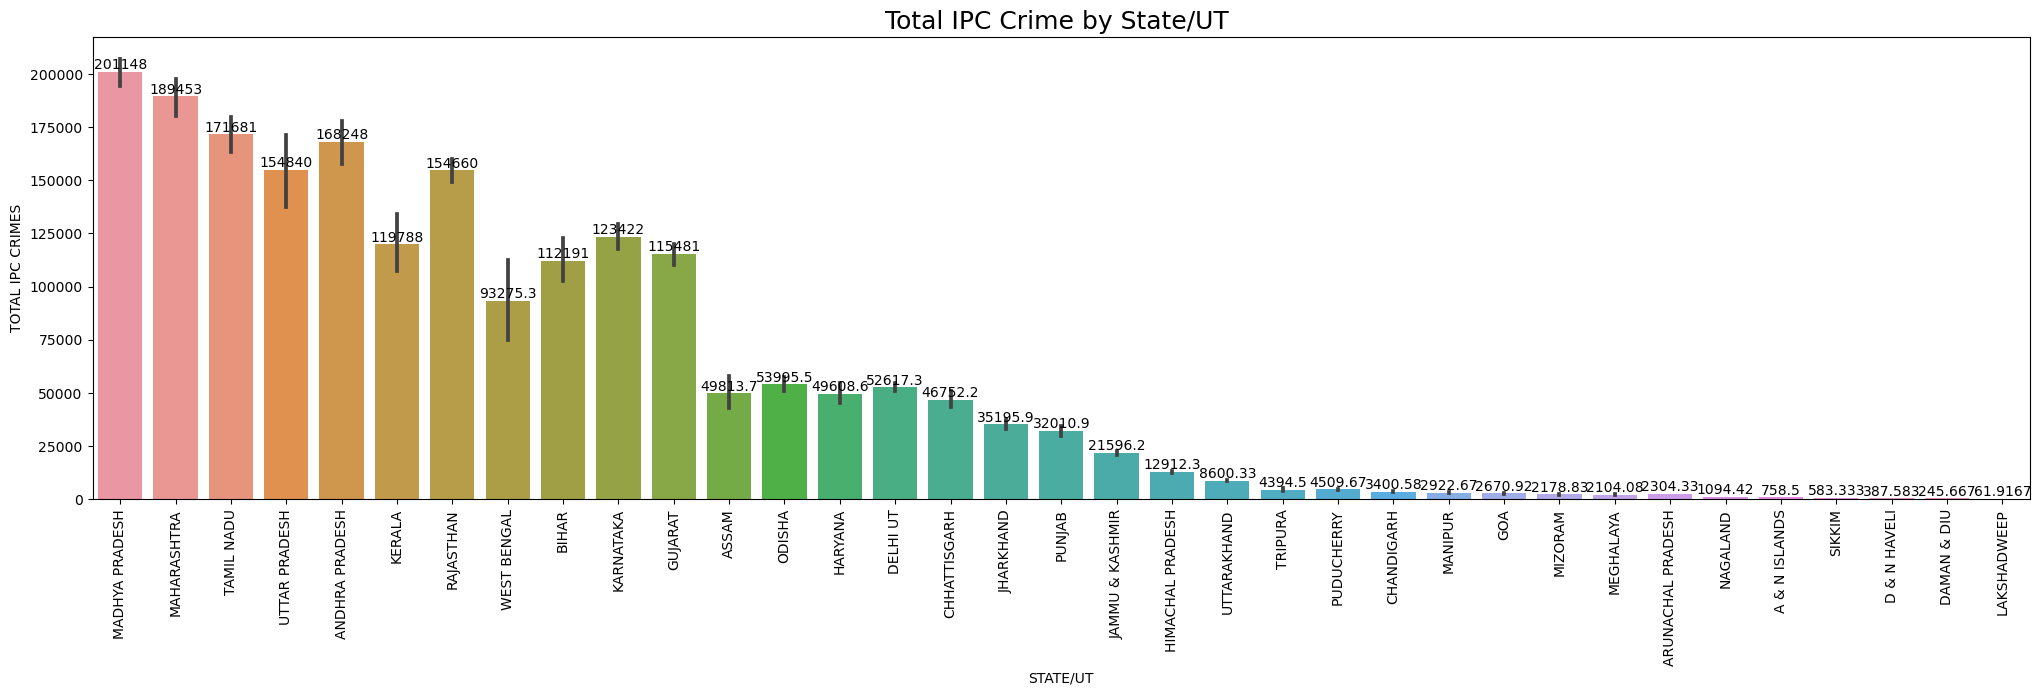

In [170]:
sort_icp=df.sort_values(by='TOTAL IPC CRIMES', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total IPC Crime by State/UT ', fontsize=18)
plt.show()

From above graph we can observed that
- Highest IPC Crime Rate: Madhya Pradesh has the highest total IPC crime rate, with over 200,000 reported cases.
- Lowest IPC Crime Rate: Lakshadweep has the lowest total IPC crime rate, with fewer than 100 reported cases.
- General Observation: There is a wide range in the number of IPC crimes reported across different states and UTs, with some states like Maharashtra and Tamil Nadu also showing high crime rates, while several UTs like Lakshadweep and Daman & Diu show very low crime rates..

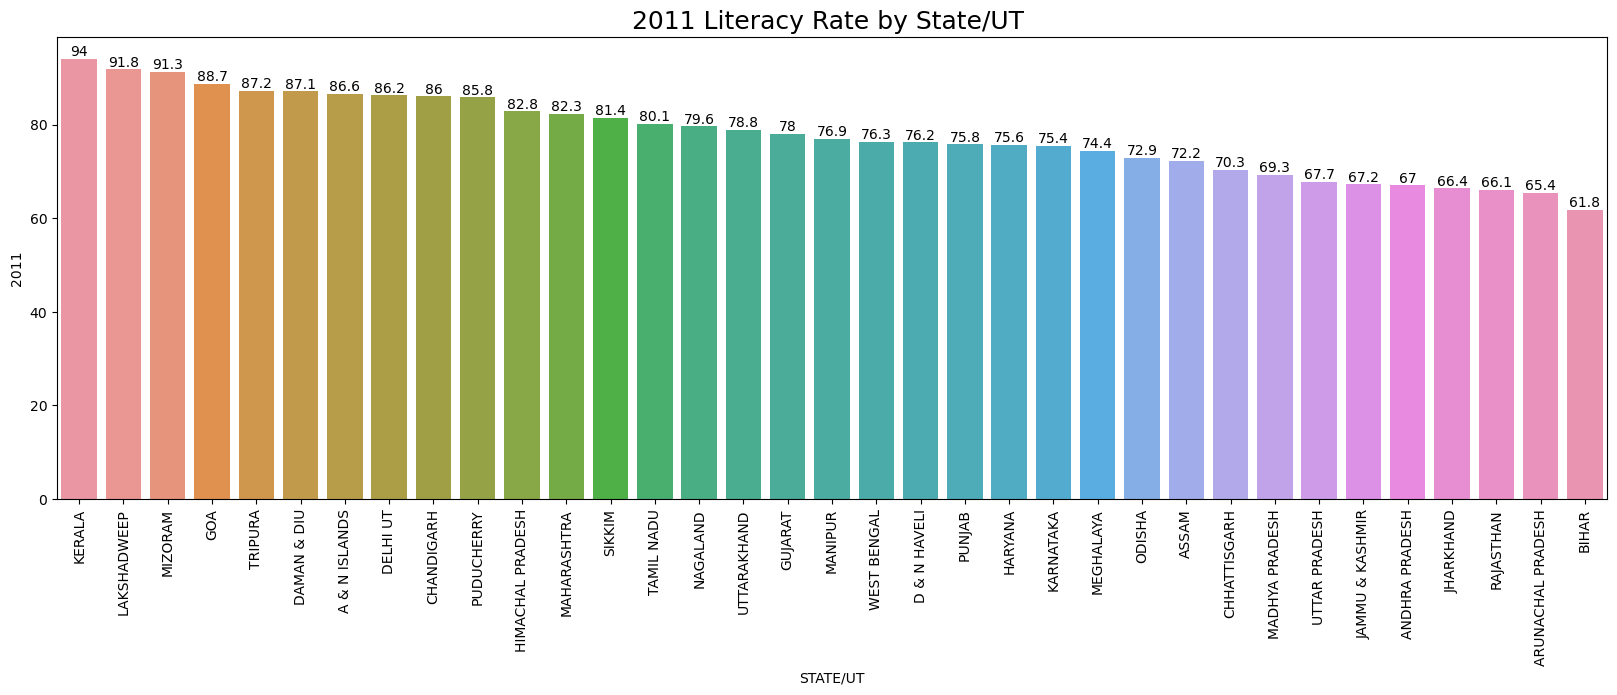

In [209]:
# Sort the data in descending order
lite_surv_df_descending =df.sort_values(by='2011', ascending=False)

plt.figure(figsize=(20, 6))
ax = sns.barplot(data=lite_surv_df_descending, x='STATE/UT', y='2011')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2011 Literacy Rate by State/UT ', fontsize=18)
plt.show()

From above graph wee can observed that 
- Highest Literacy Rate: Kerala has the highest literacy rate at 94%, followed by Lakshadweep and Mizoram.
- Lowest Literacy Rate: Bihar has the lowest literacy rate at 61.8%.
- General Observation: Literacy rates vary significantly across states and UTs, with many states achieving literacy rates above 75%.

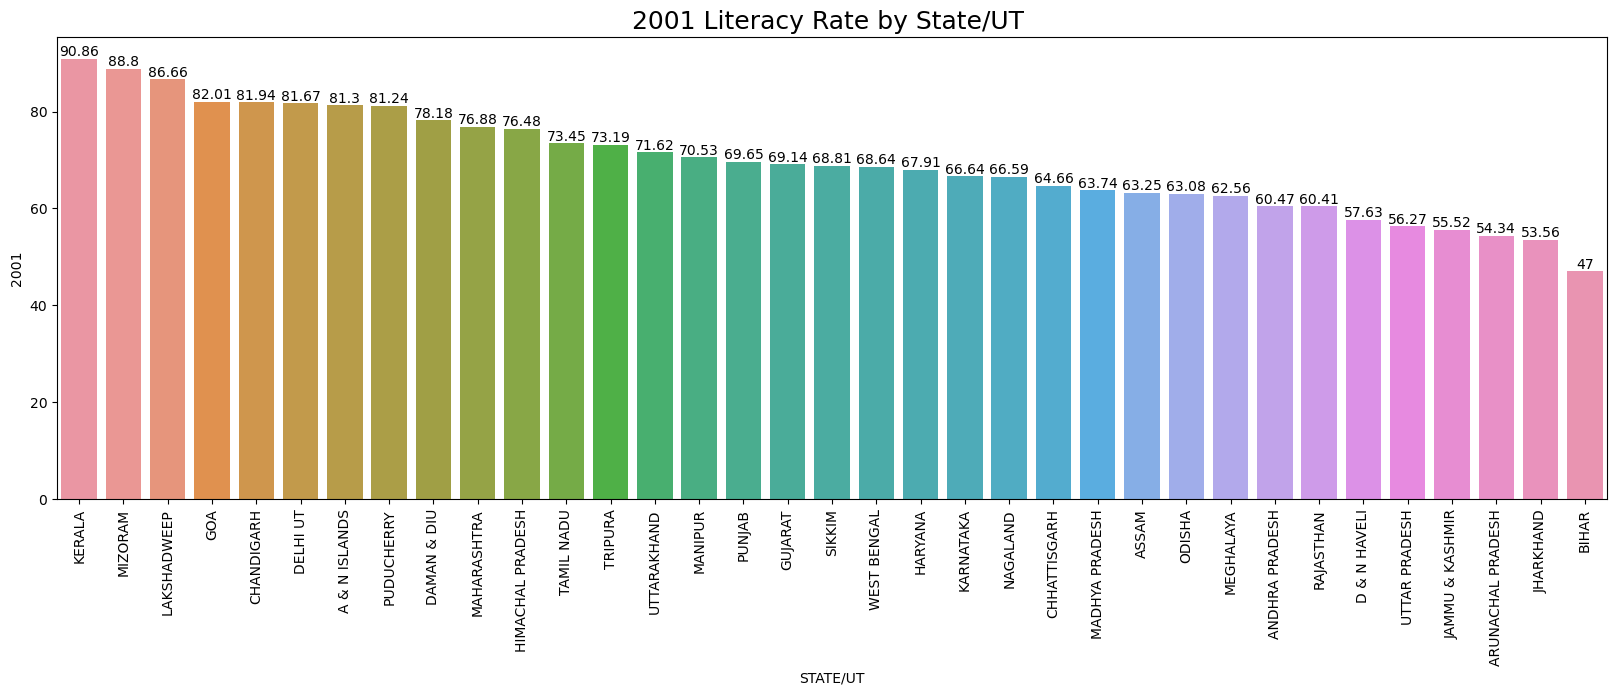

In [210]:
# Sort the data in descending order
lite_surv_df_descending =df.sort_values(by='2001', ascending=False)

plt.figure(figsize=(20, 6))
ax = sns.barplot(data=lite_surv_df_descending, x='STATE/UT', y='2001')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2001 Literacy Rate by State/UT ', fontsize=18)
plt.show()

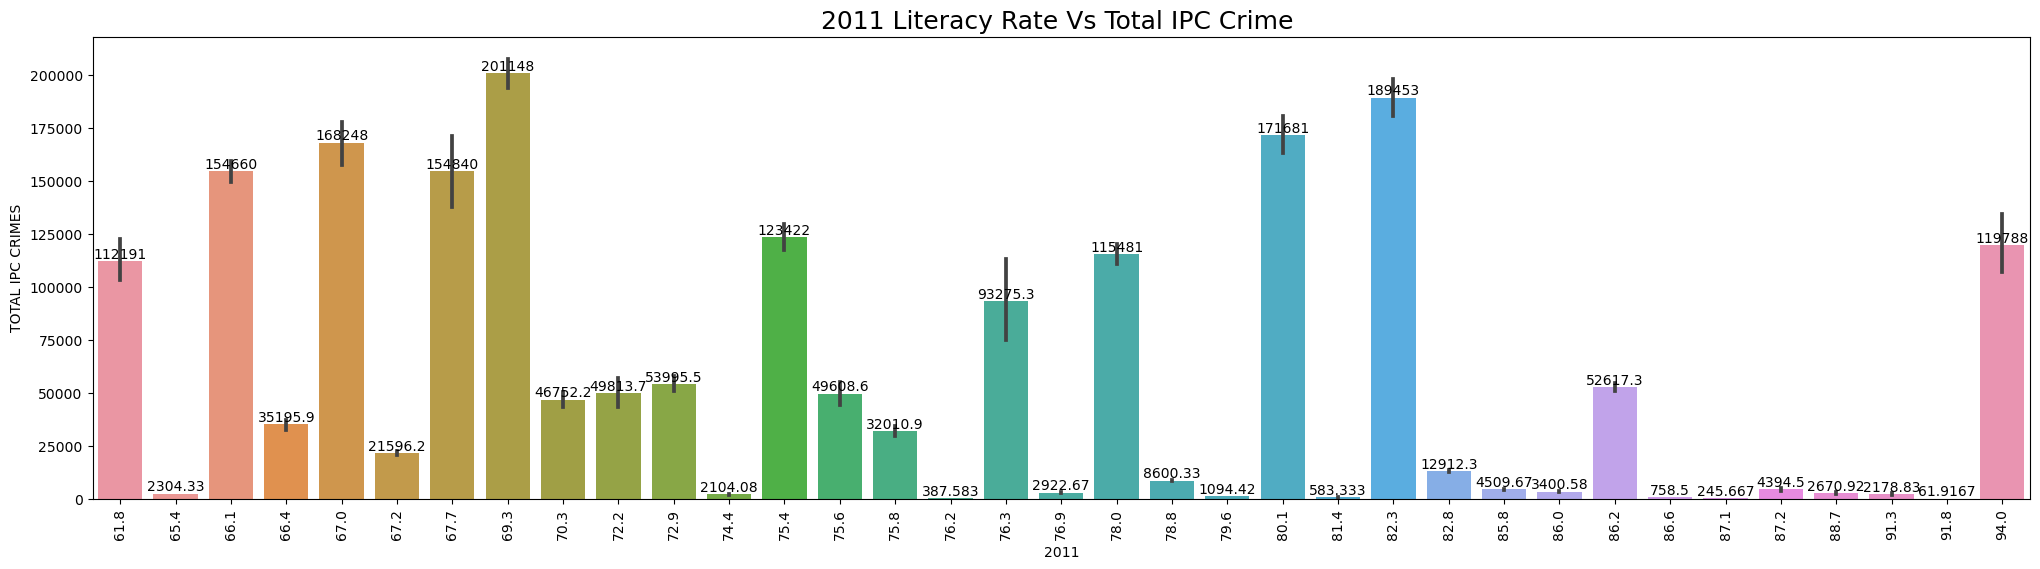

In [172]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=df, x='2011',y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2011 Literacy Rate Vs Total IPC Crime ', fontsize=18)
plt.show()

From above graph we can observed that 
- Madhya Pradesh, with the highest IPC crime rate, has a relatively low literacy rate of 69.3%.
- Kerala, with the highest literacy rate, has a moderate IPC crime rate.
- Lakshadweep, with the lowest IPC crime rate, has the second highest literacy rate at 91.8%.

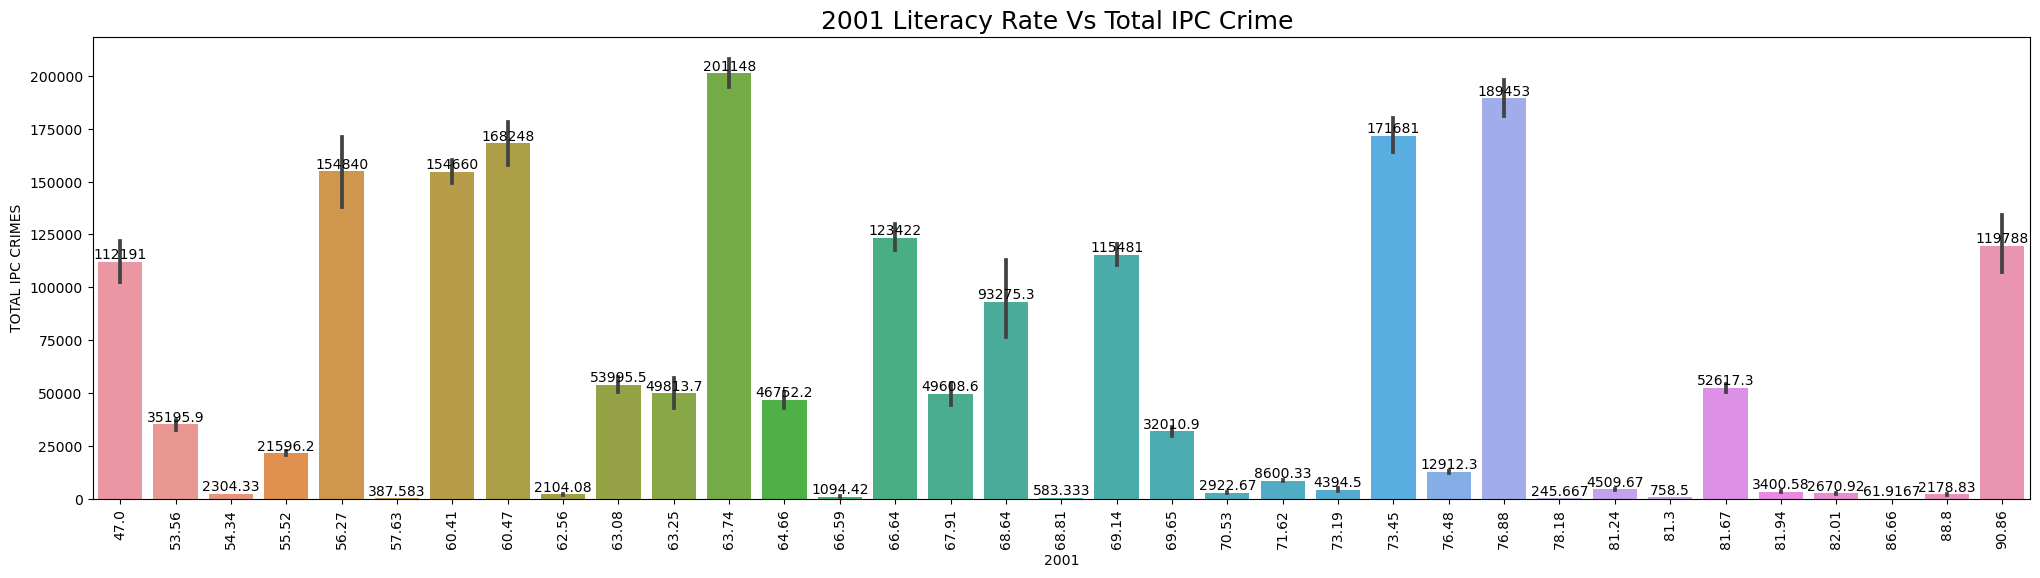

In [208]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=df, x='2001',y='TOTAL IPC CRIMES')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2001 Literacy Rate Vs Total IPC Crime ', fontsize=18)
plt.show()

- Top Performers: Kerala (90.86%) has the highest literacy rate, followed by Mizoram (88.8%) and Lakshadweep (86.66%).
- Low Performers: Bihar (47%) has the lowest literacy rate, significantly below other states/UTs.
- Mid-Range Performers: States like Maharashtra (76.88%) and Tamil Nadu (73.45%) are in the mid to high range.
- Clustered Ranges: Most states/UTs have literacy rates clustered between 60% to 80%.

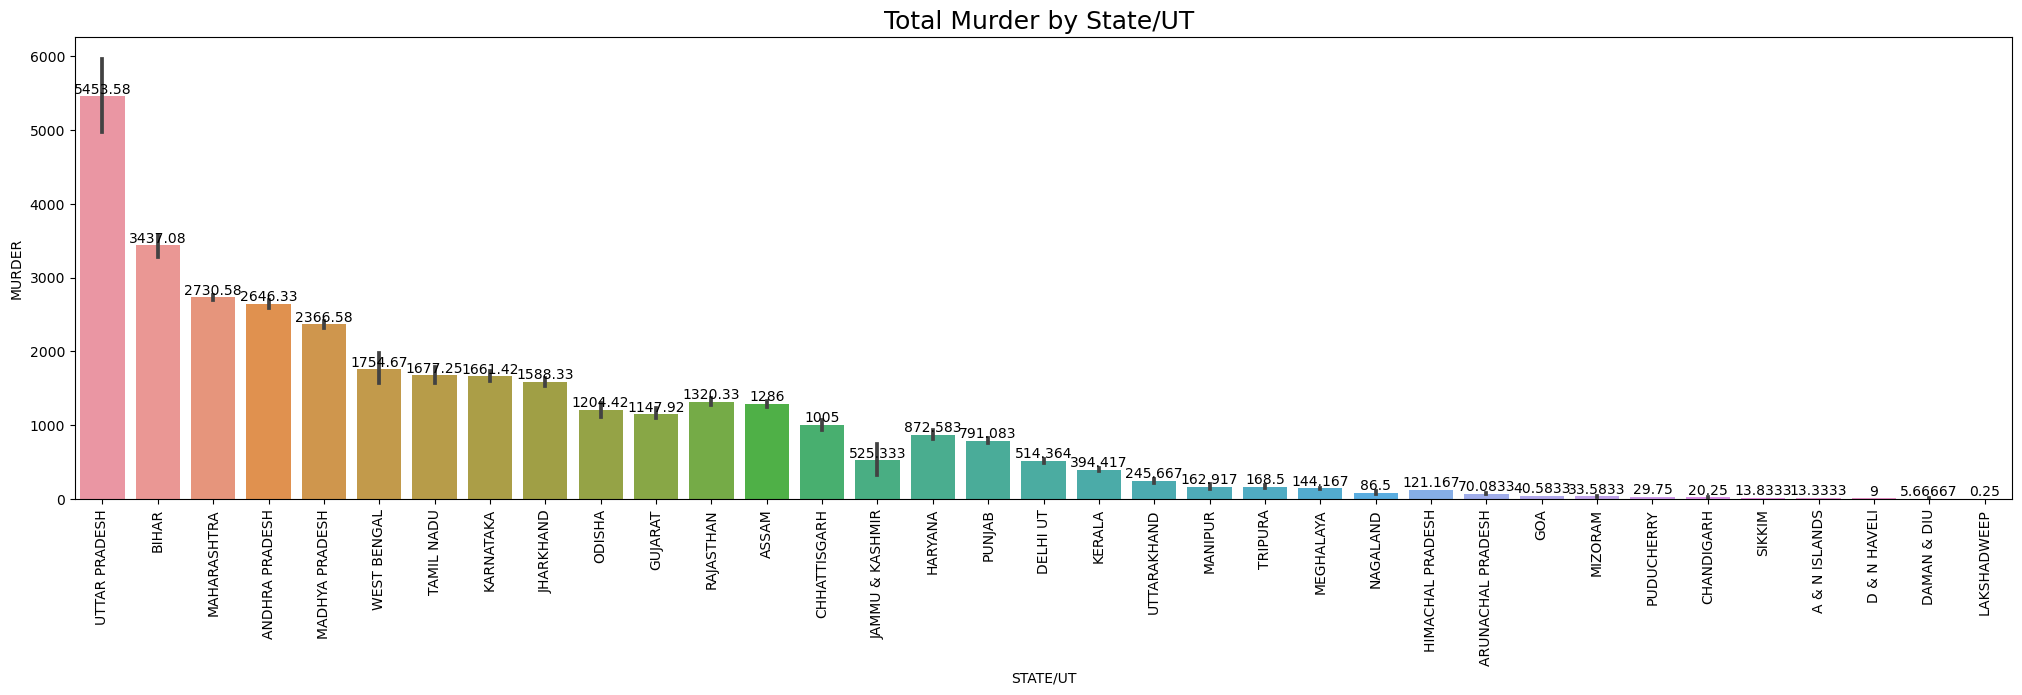

In [173]:
sort_icp=df.sort_values(by='MURDER', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='MURDER')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Murder by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has the highest number of murder cases reported compared to any other state, with over 5,458 cases.

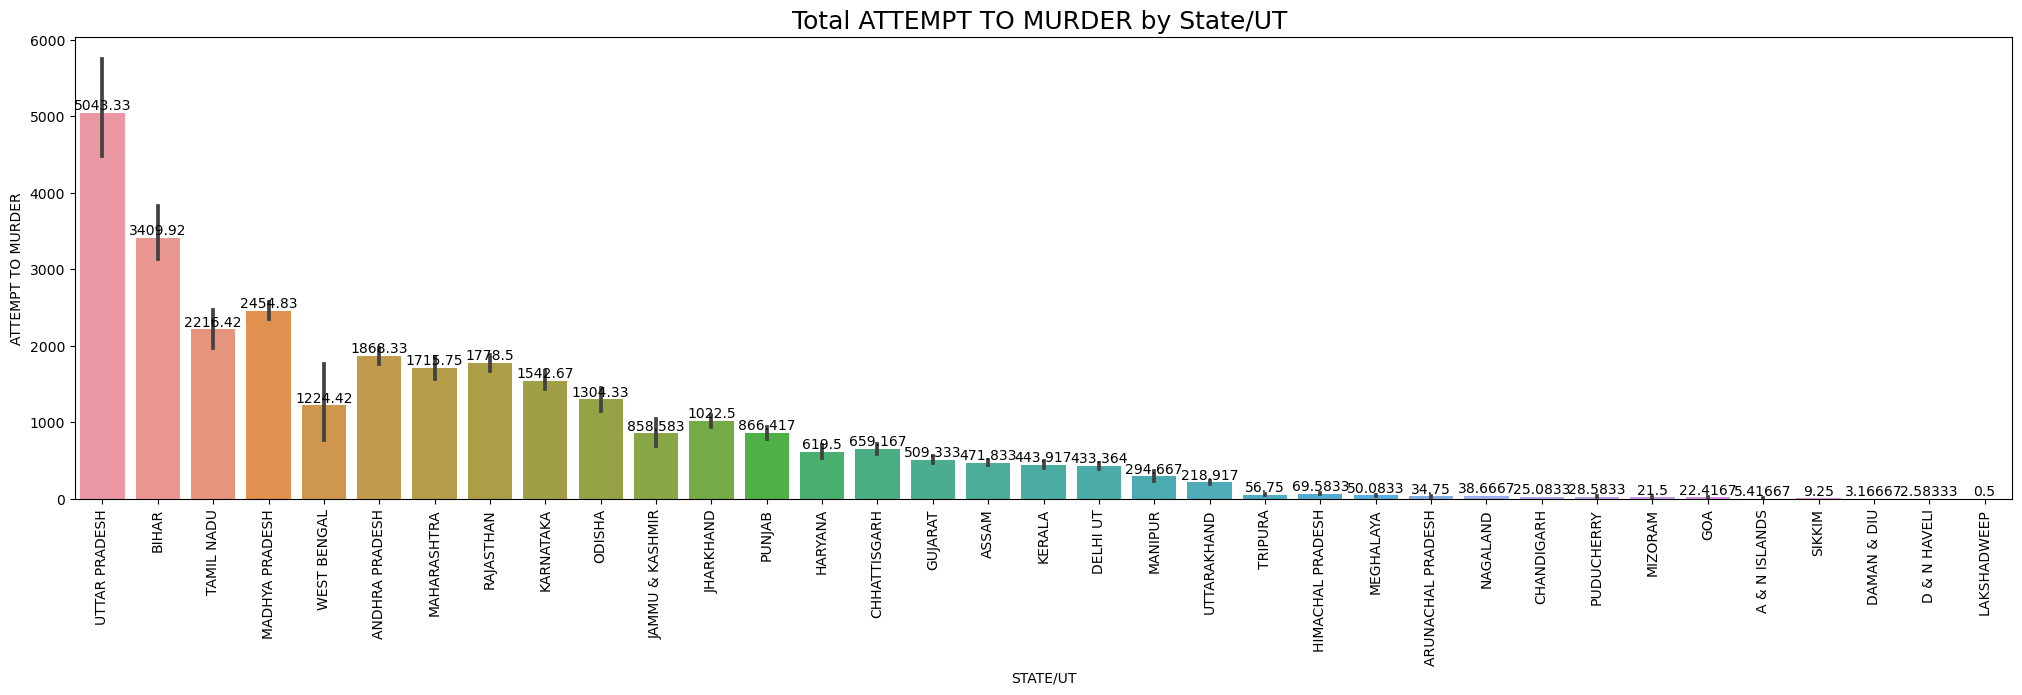

In [174]:
sort_icp=df.sort_values(by='ATTEMPT TO MURDER', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='ATTEMPT TO MURDER')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total ATTEMPT TO MURDER by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has the highest number of  attempt to murder cases reported compared to any other state, with over 5,048.33 cases

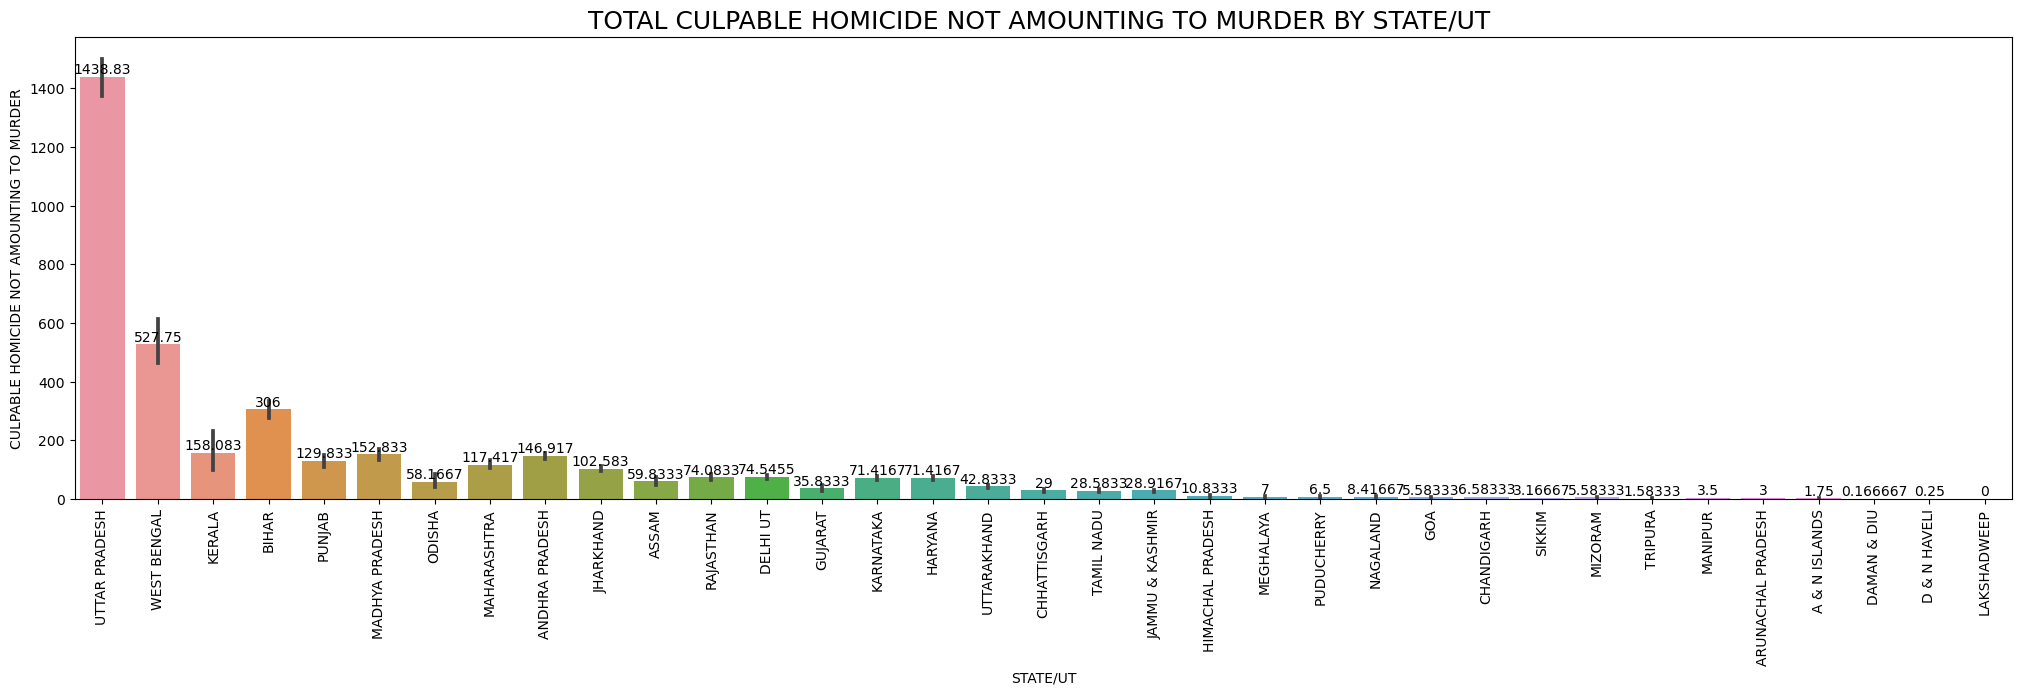

In [199]:
sort_icp=df.sort_values(by='CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='CULPABLE HOMICIDE NOT AMOUNTING TO MURDER')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL CULPABLE HOMICIDE NOT AMOUNTING TO MURDER BY STATE/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of other culpable homicide not amounting of murder crime as compare to any other state

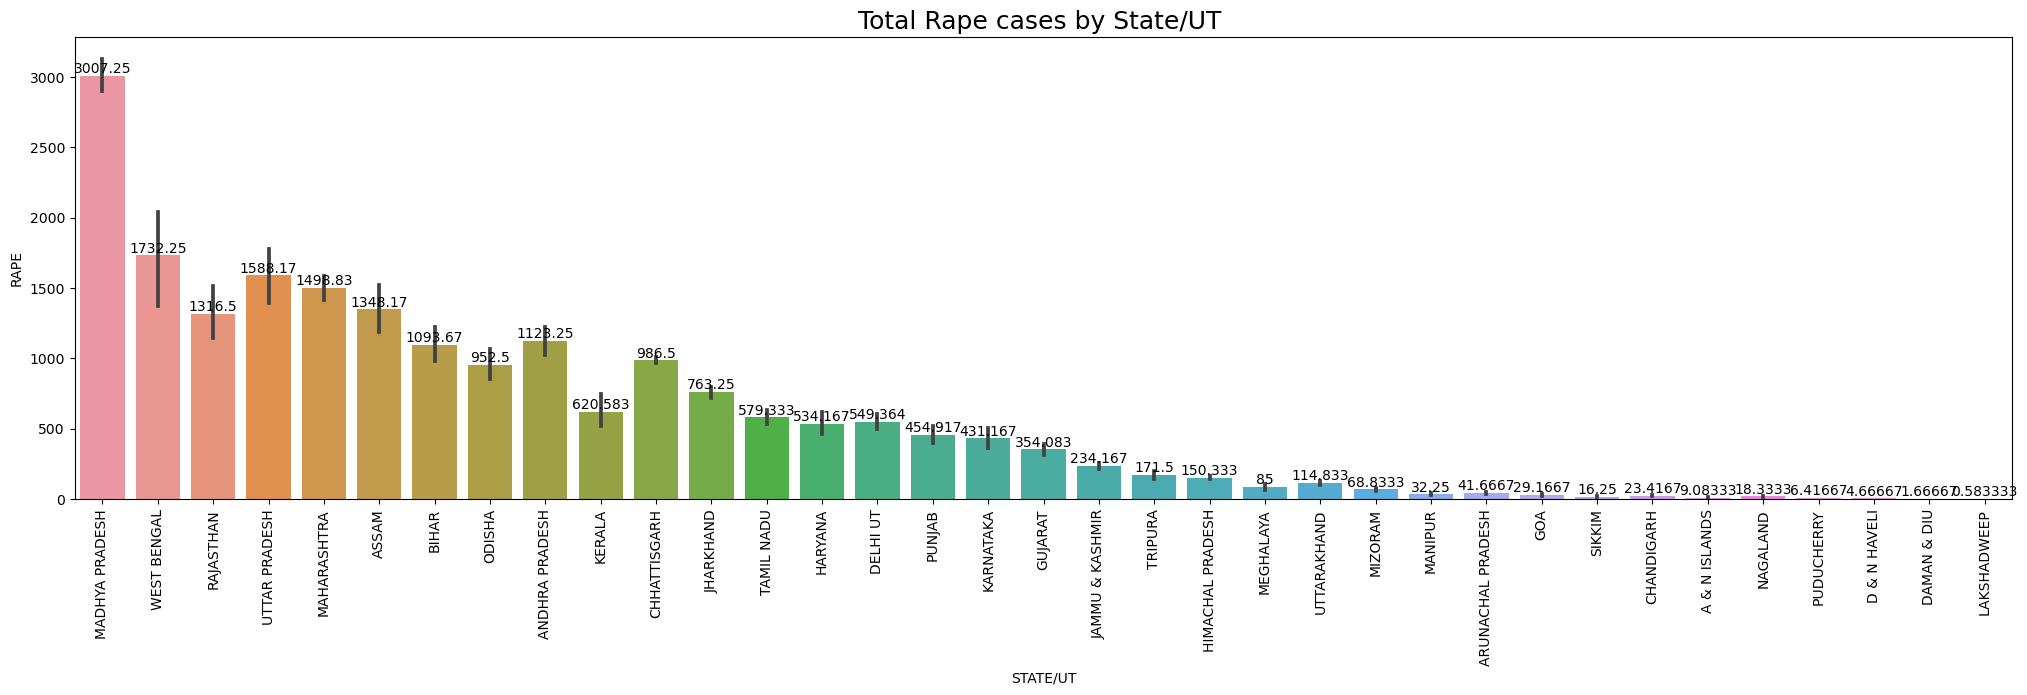

In [176]:
sort_icp=df.sort_values(by='RAPE', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='RAPE')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Rape cases by State/UT ', fontsize=18)
plt.show()

Madhy Pradesh has the highest number of Rape cases reported compared to any other state, with over 3,007.25 cases

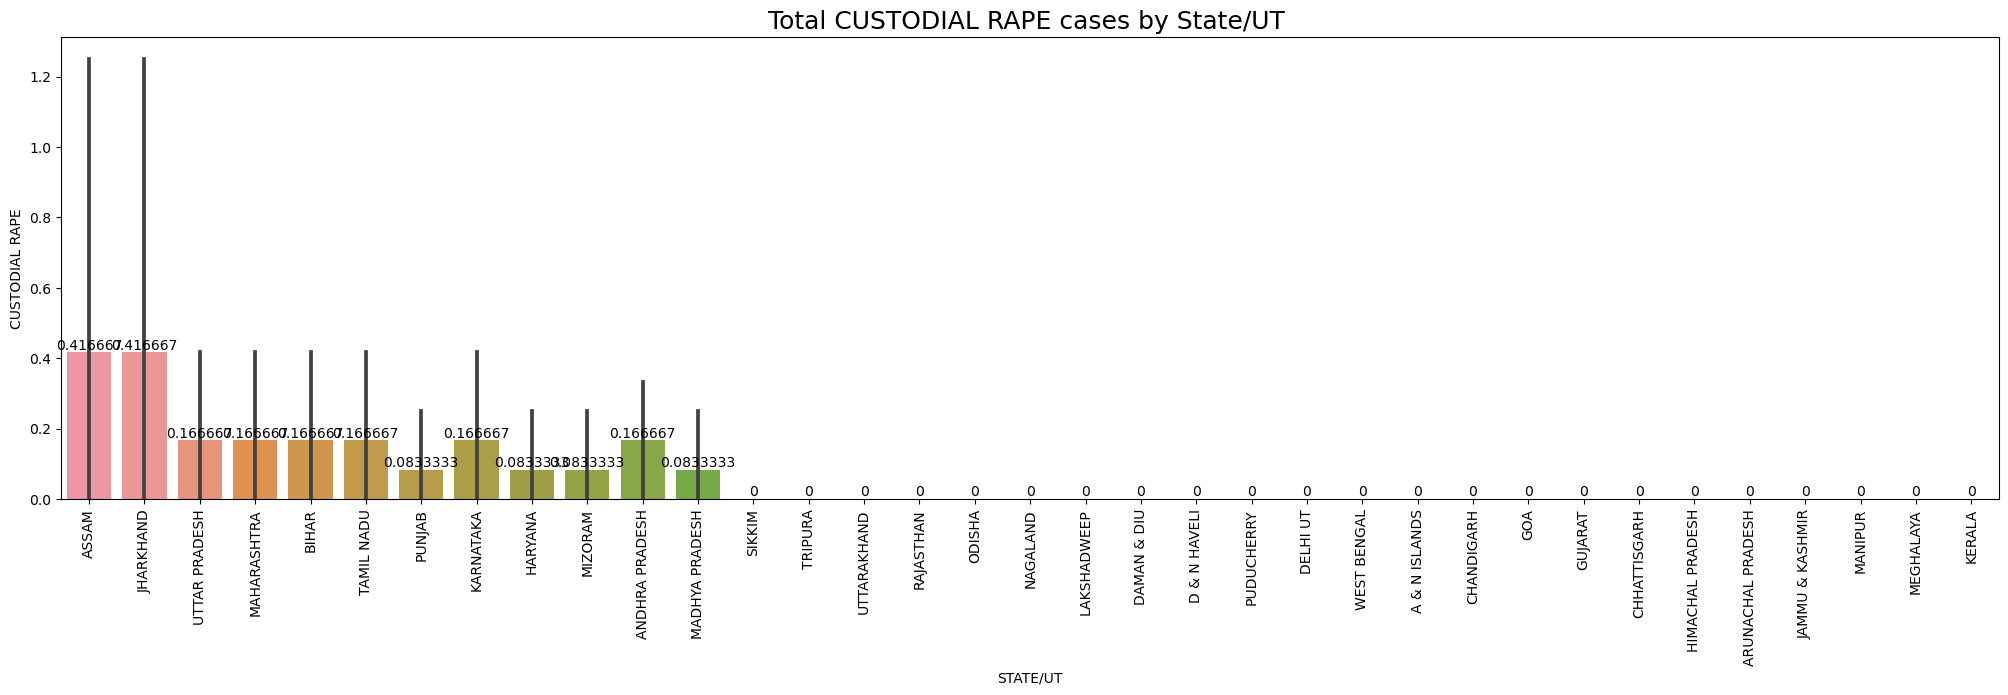

In [182]:
sort_icp=df.sort_values(by='CUSTODIAL RAPE', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='CUSTODIAL RAPE')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total CUSTODIAL RAPE cases by State/UT ', fontsize=18)
plt.show()

Asam and Jharkhand has the highest number of  custodial Rape cases reported compared to any other state.

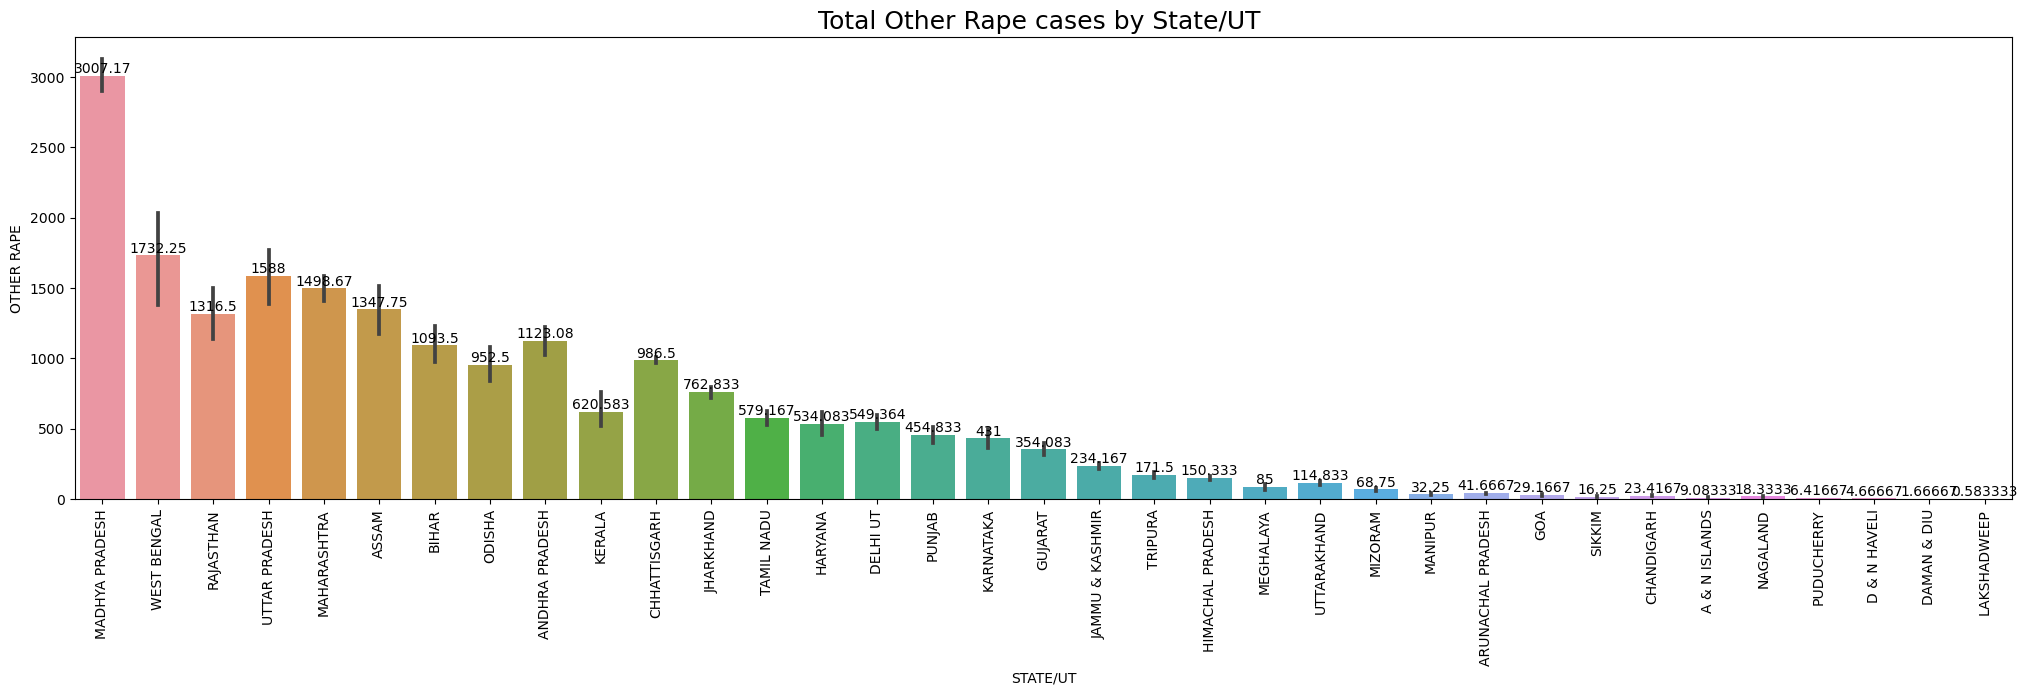

In [184]:
sort_icp=df.sort_values(by='OTHER RAPE', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='OTHER RAPE')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Other Rape cases by State/UT ', fontsize=18)
plt.show()

- Madhy Pradesh has the highest number of other Rape cases reported compared to any other state, with over 3,007.17 cases
- Following West Bengal ranks second, followed by Rajasthan , Uttar pradesh and maharastra in terms of reported cases.

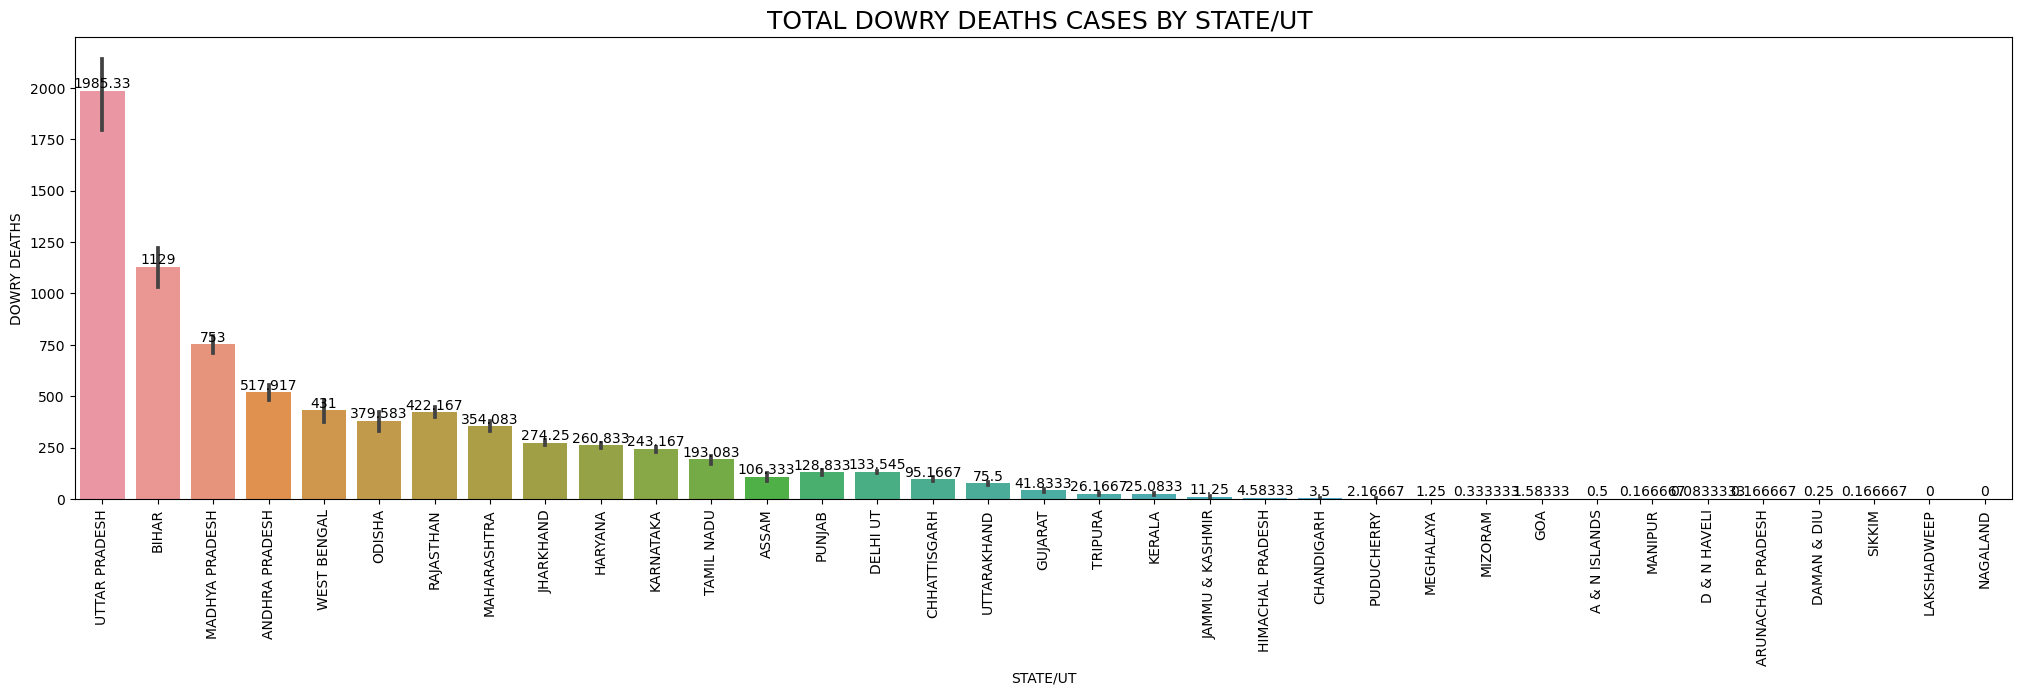

In [186]:
sort_icp=df.sort_values(by='DOWRY DEATHS', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='DOWRY DEATHS')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL DOWRY DEATHS CASES BY STATE/UT ', fontsize=18)
plt.show()

- Uttar Pradesh has reported the highest number of cases of Dowry Deaths, with over 1985 cases.
- Following Bihar ranks second, followed by Madhya Pradesh, Andhra Pradesh, and West Bengal in terms of reported cases.

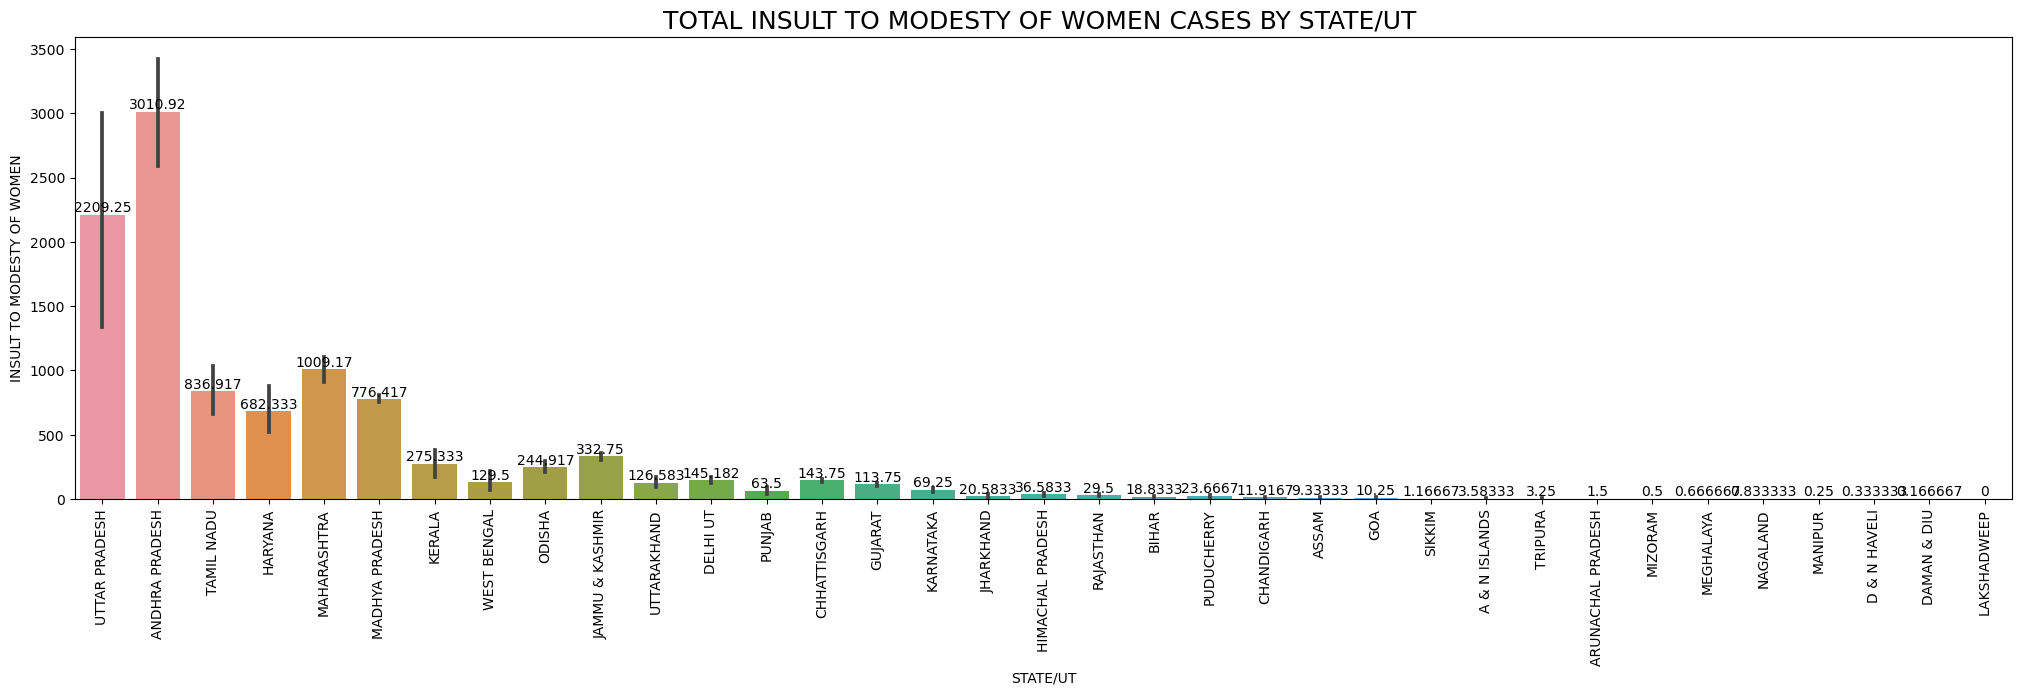

In [187]:
sort_icp=df.sort_values(by='INSULT TO MODESTY OF WOMEN', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='INSULT TO MODESTY OF WOMEN')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL INSULT TO MODESTY OF WOMEN CASES BY STATE/UT ', fontsize=18)
plt.show()

- Andhra Pradesh has reported the highest number of cases of Insult to modestry of women, with over 3010 cases.
- Following Uttar Praddesh ranks second, followed by Tamil Nadu, Haryana, Maharastra and Madhya Pradesh in terms of reported cases.

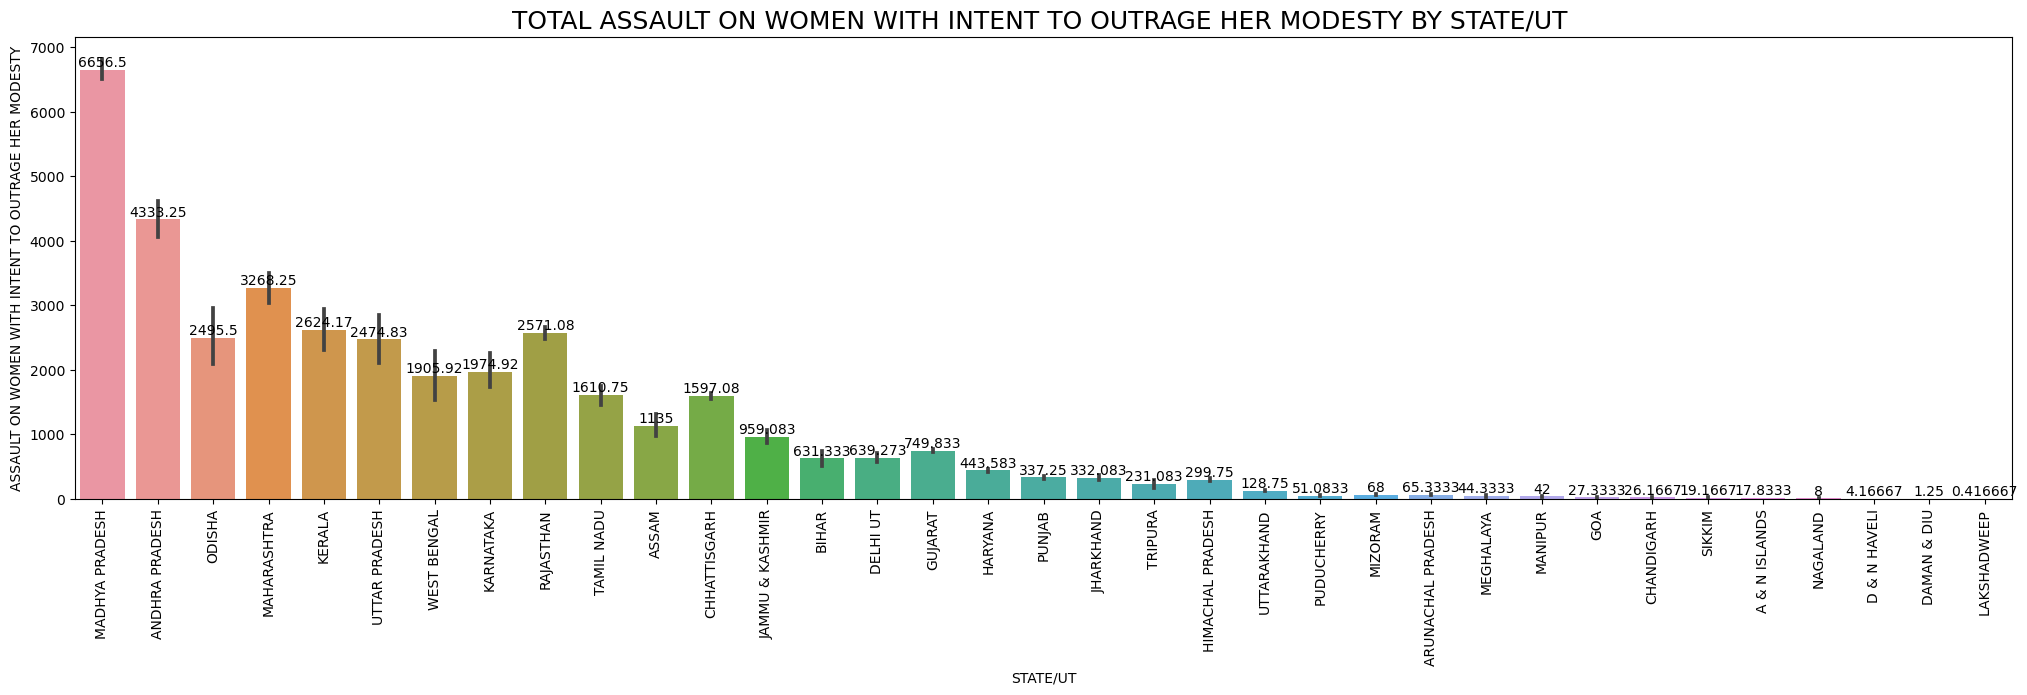

In [195]:
sort_icp=df.sort_values(by='ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY BY STATE/UT ', fontsize=18)
plt.show()

Madhay Pradesh has highest number of Assault on women with intent of outrage her modestry crime as compare to any other state

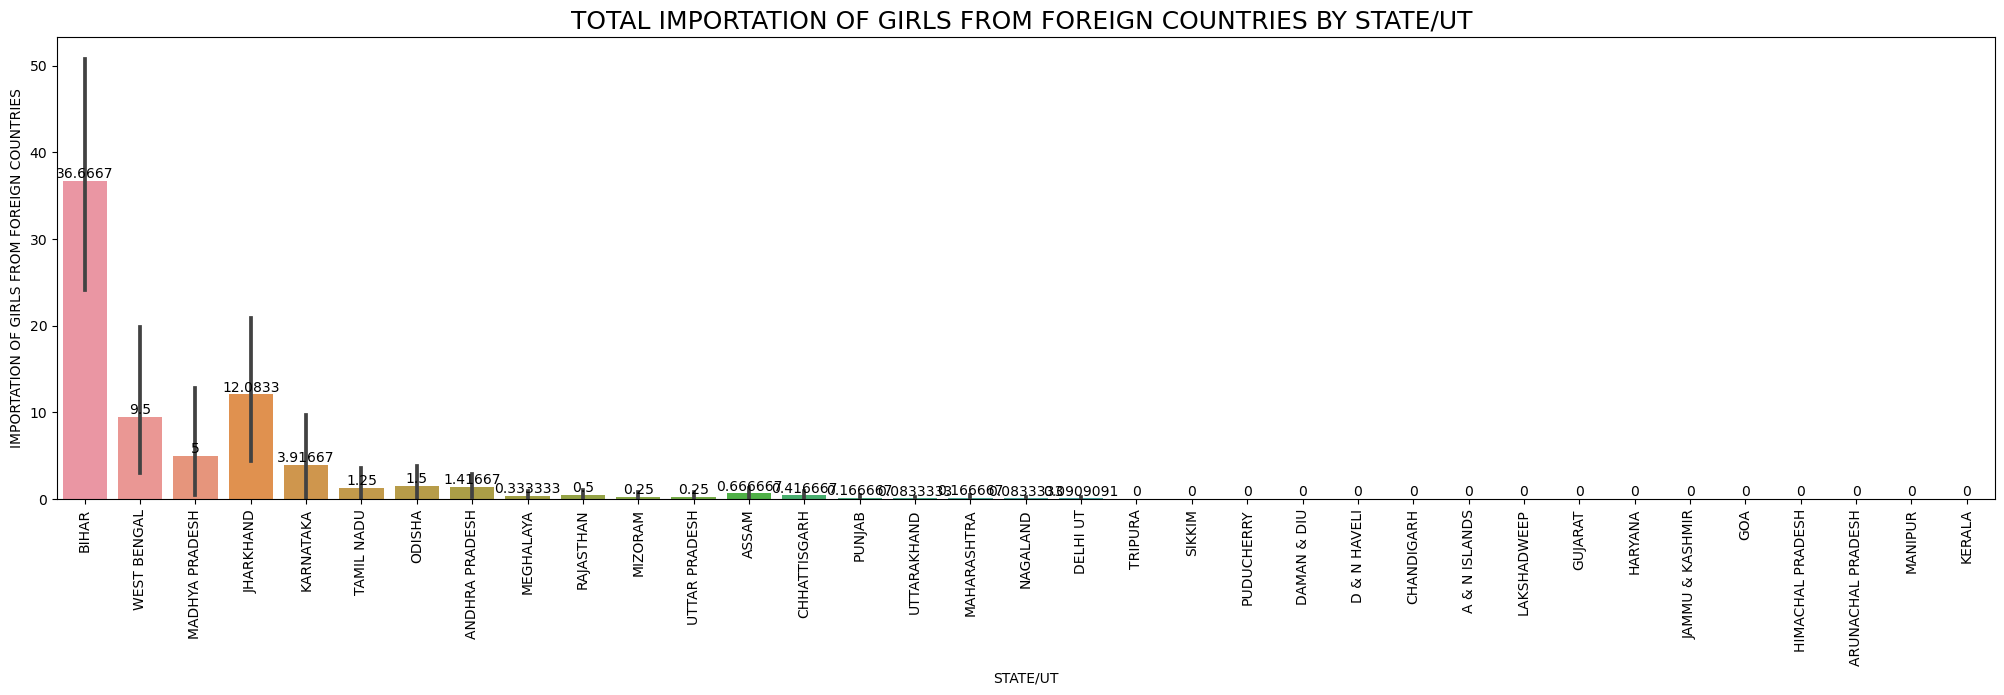

In [189]:
sort_icp=df.sort_values(by='IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES BY STATE/UT ', fontsize=18)
plt.show()

Bihar has reported the highest number of importation of girls from forgeign countries

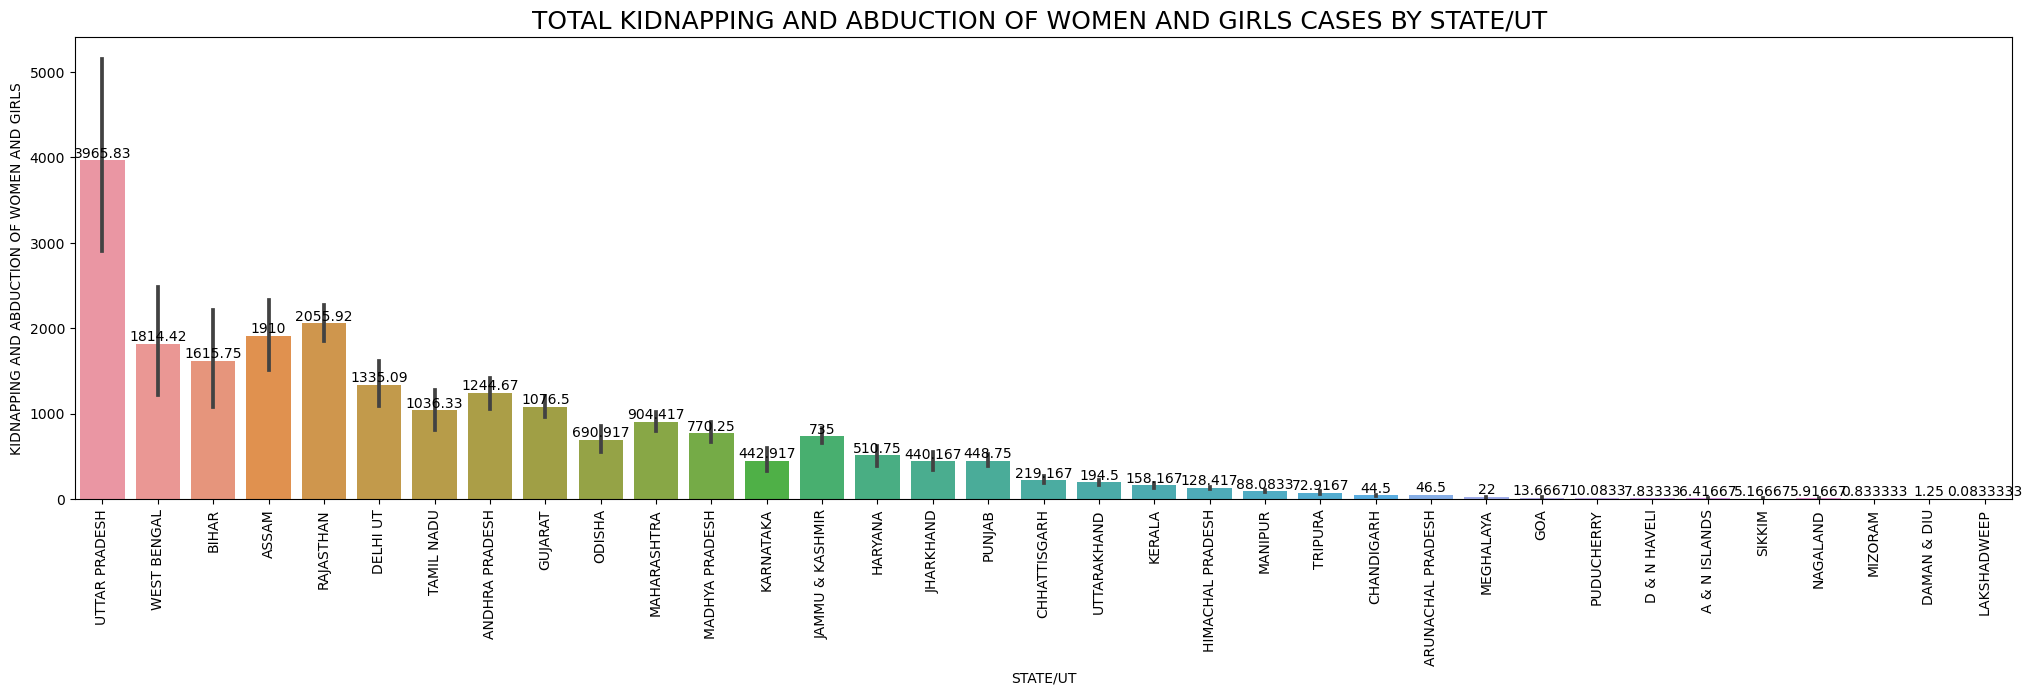

In [200]:
sort_icp=df.sort_values(by='KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS CASES BY STATE/UT ', fontsize=18)
plt.show()

- Uttar Pradesh has reported the highest number of cases of kidnapping and abduction of women and girls, with over 3,965.83 cases.
- Following West Bengal ranks second, followed by Bihar, Assam, and Rajasthan in terms of reported cases.

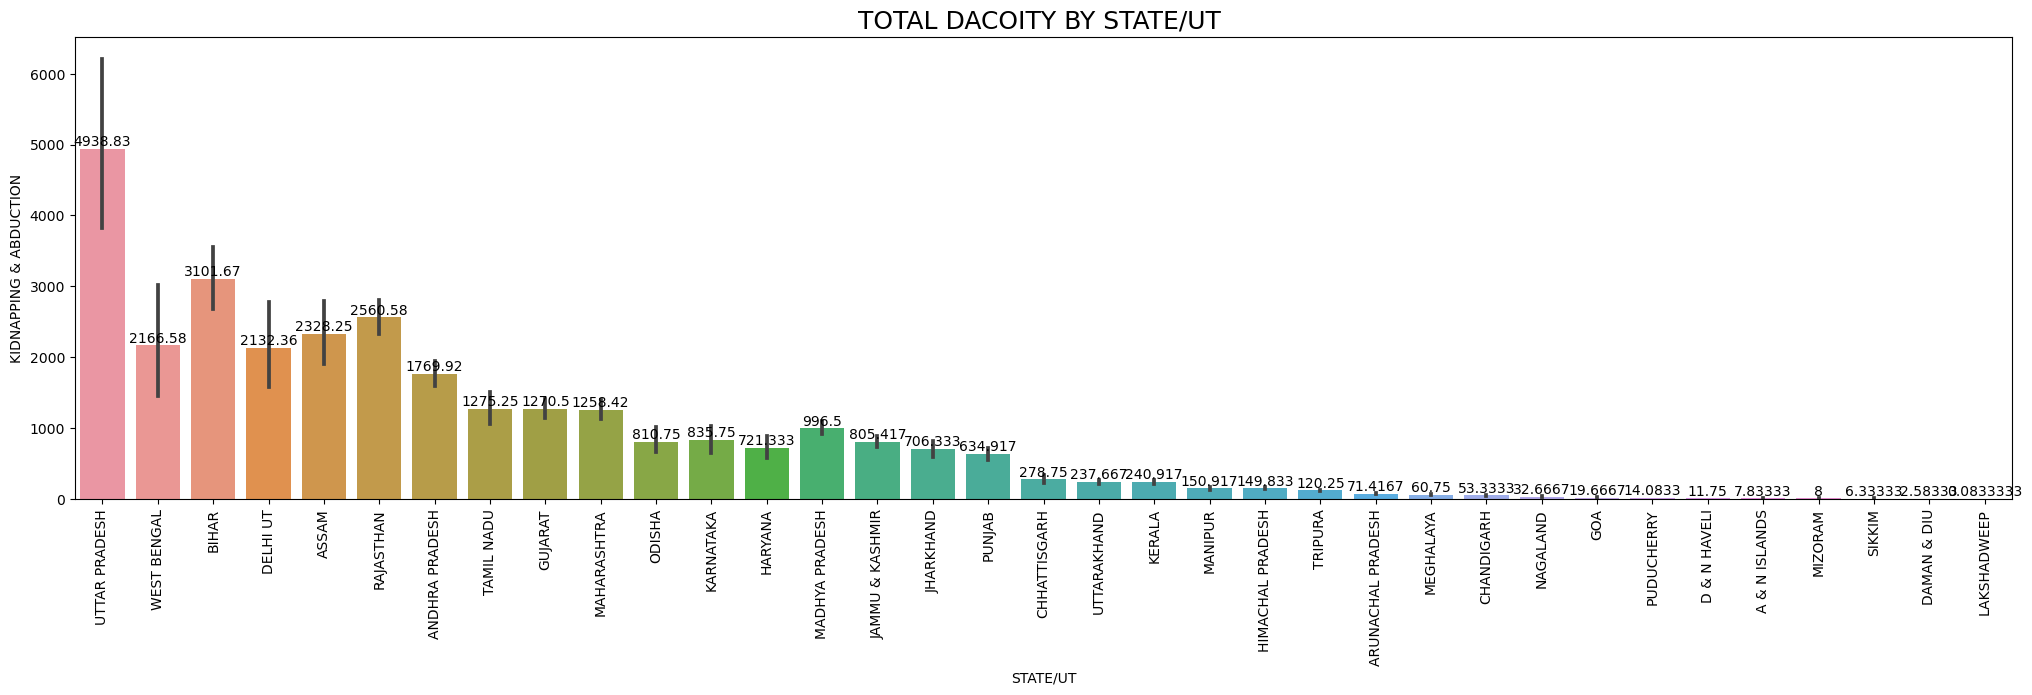

In [203]:
sort_icp=df.sort_values(by='KIDNAPPING & ABDUCTION', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='KIDNAPPING & ABDUCTION')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL DACOITY BY STATE/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of kidnapping & abduction crime as compare to any other state

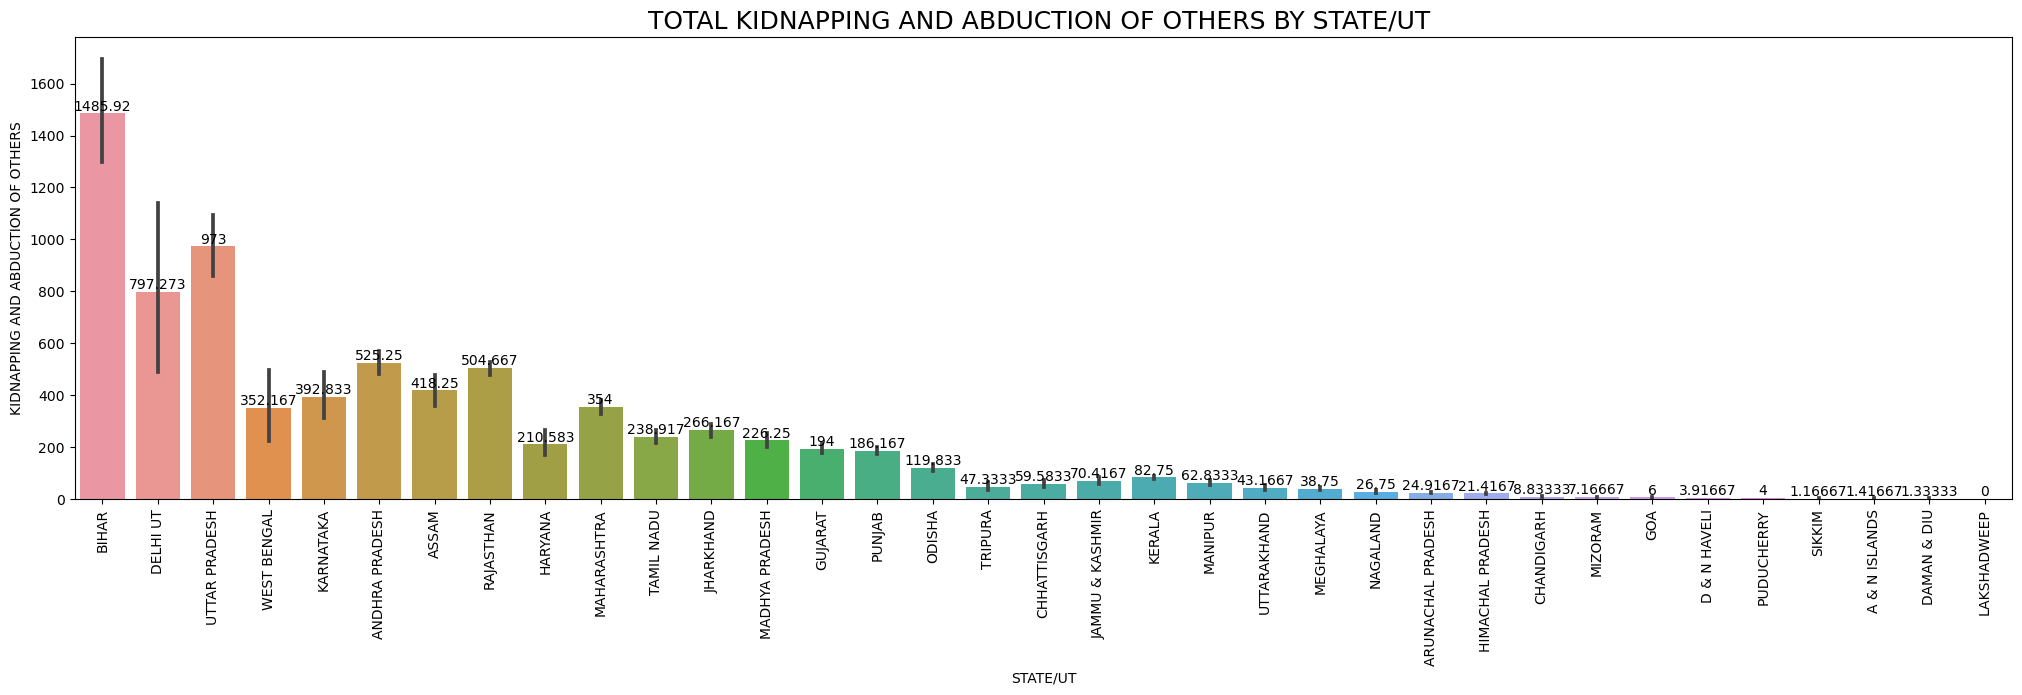

In [205]:
sort_icp=df.sort_values(by='KIDNAPPING AND ABDUCTION OF OTHERS', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='KIDNAPPING AND ABDUCTION OF OTHERS')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL KIDNAPPING AND ABDUCTION OF OTHERS BY STATE/UT ', fontsize=18)
plt.show()

Bihar has highest number of kidnapping & abduction crime as compare to any other state

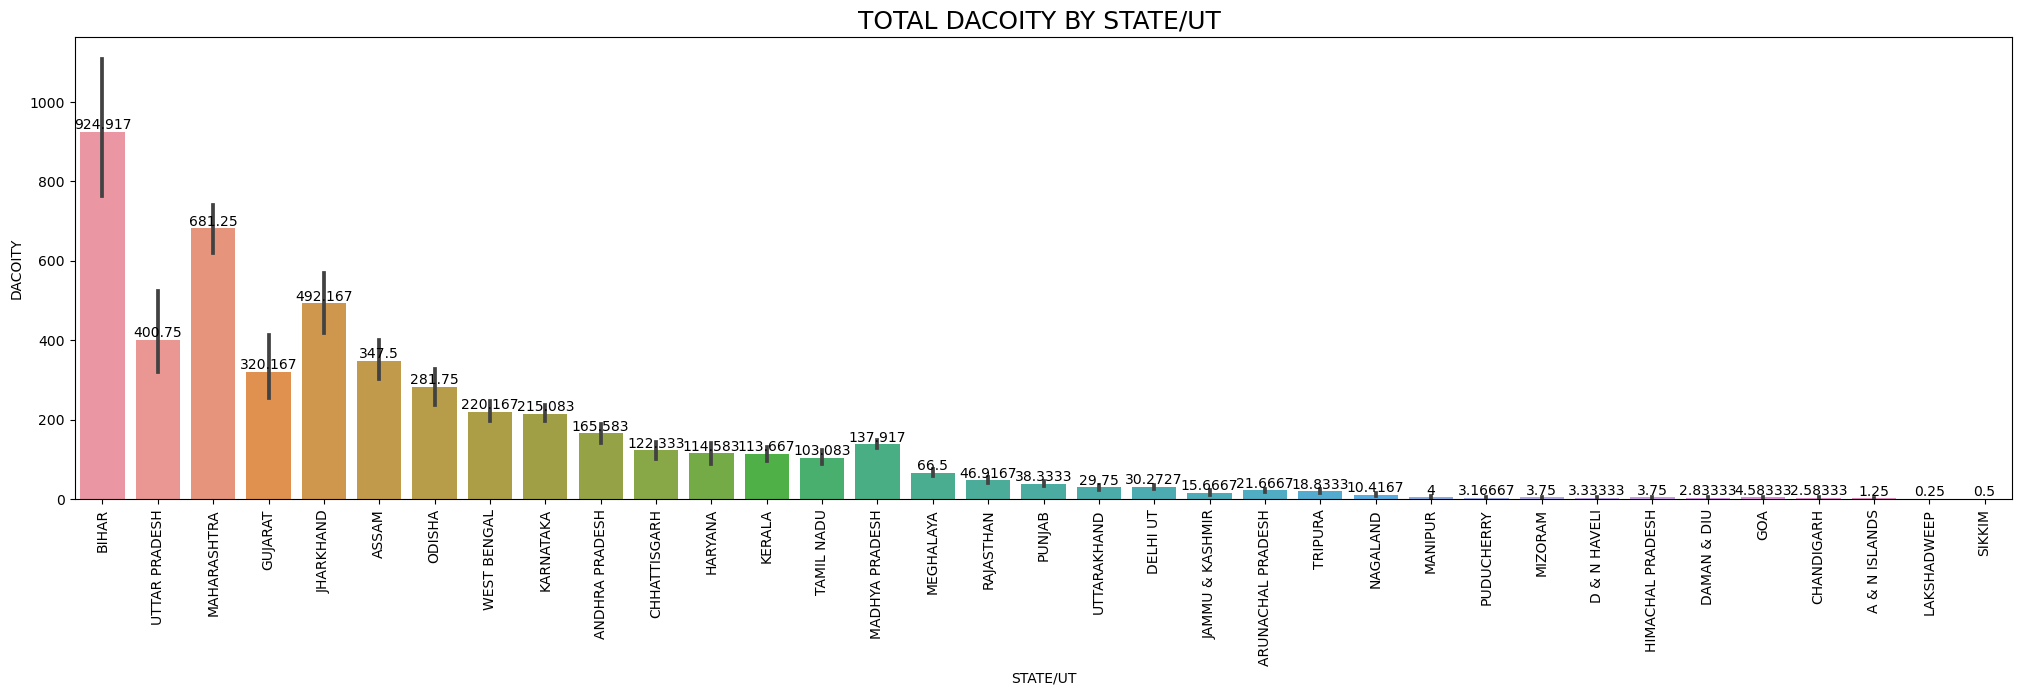

In [190]:
sort_icp=df.sort_values(by='DACOITY', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='DACOITY')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL DACOITY BY STATE/UT ', fontsize=18)
plt.show()

Bihar has reported the highest number of Dacoity

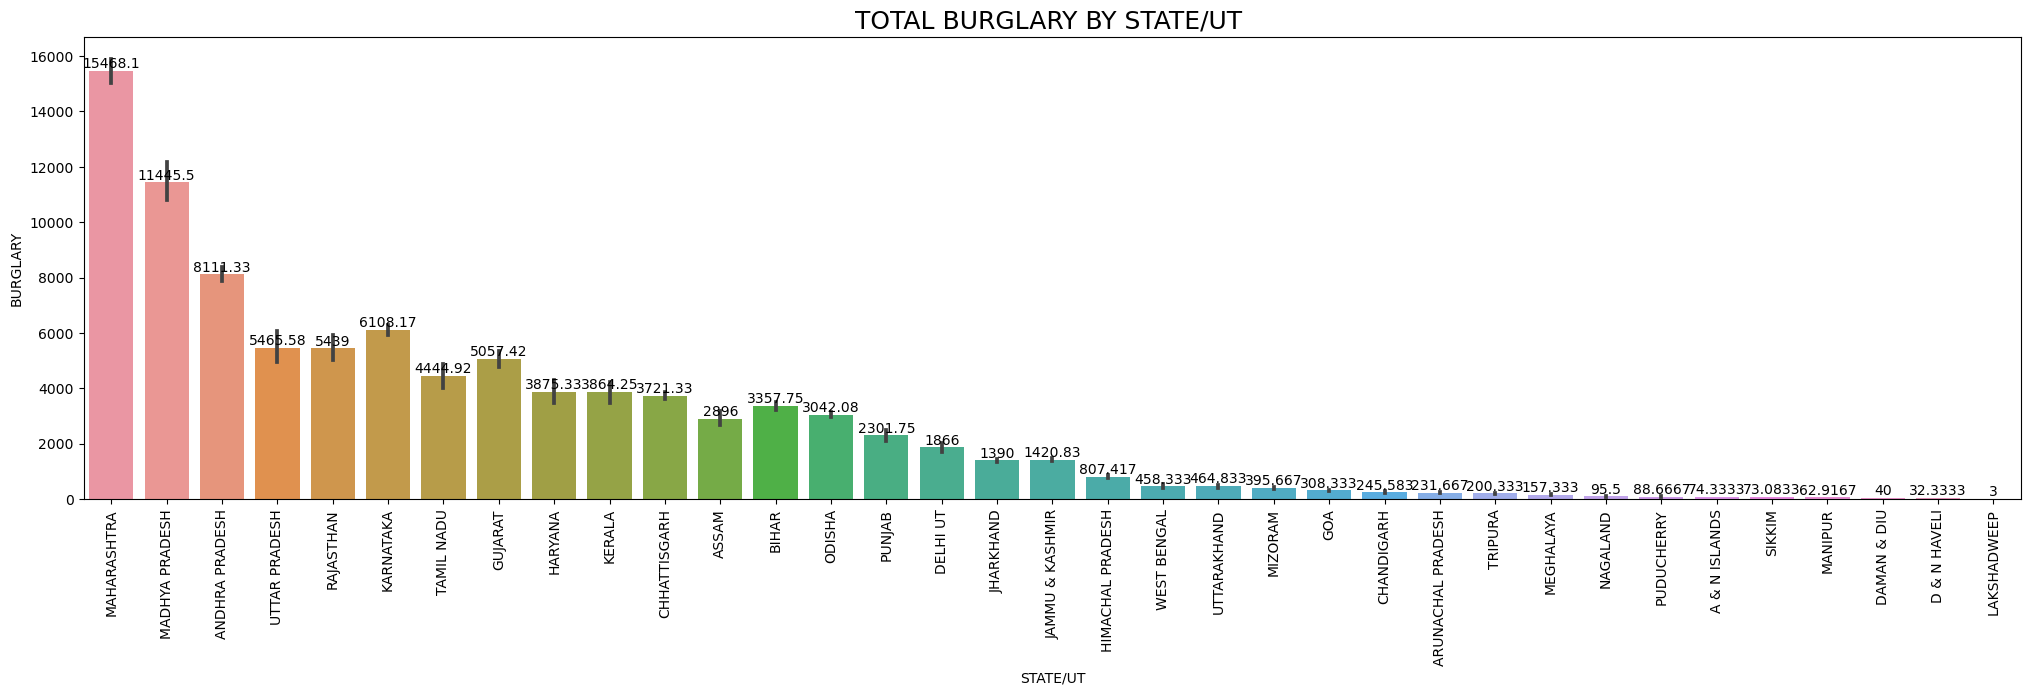

In [191]:
sort_icp=df.sort_values(by='BURGLARY', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='BURGLARY')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL BURGLARY BY STATE/UT ', fontsize=18)
plt.show()

Maharastra has highest number of burglary crime as compare to any other state

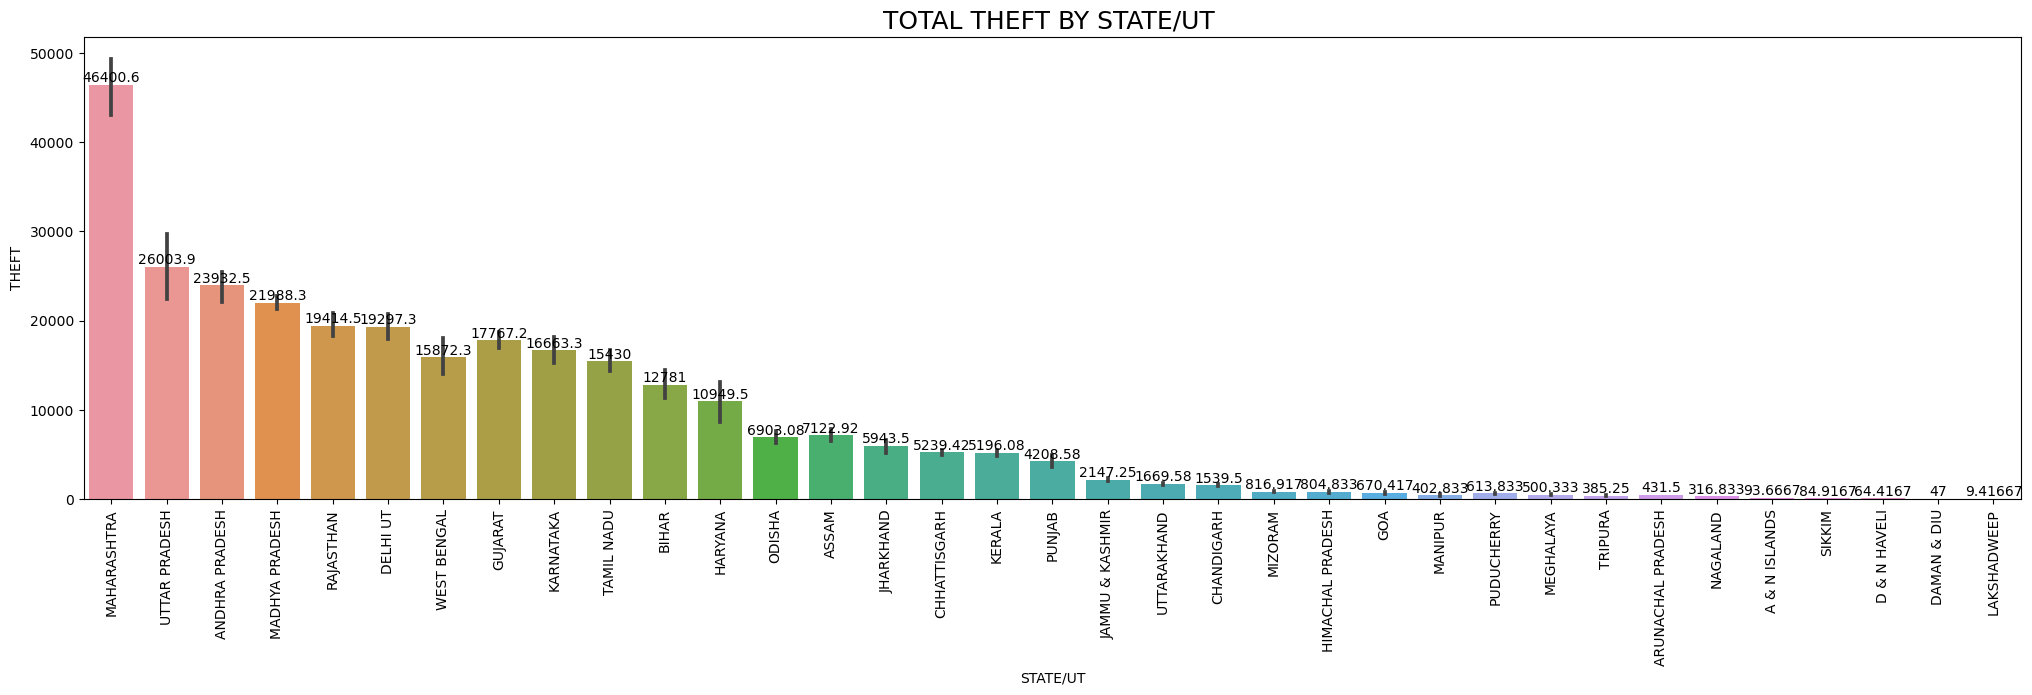

In [194]:
sort_icp=df.sort_values(by='THEFT', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='THEFT')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL THEFT BY STATE/UT ', fontsize=18)
plt.show()

Maharastra has highest number of theft crime as compare to any other state

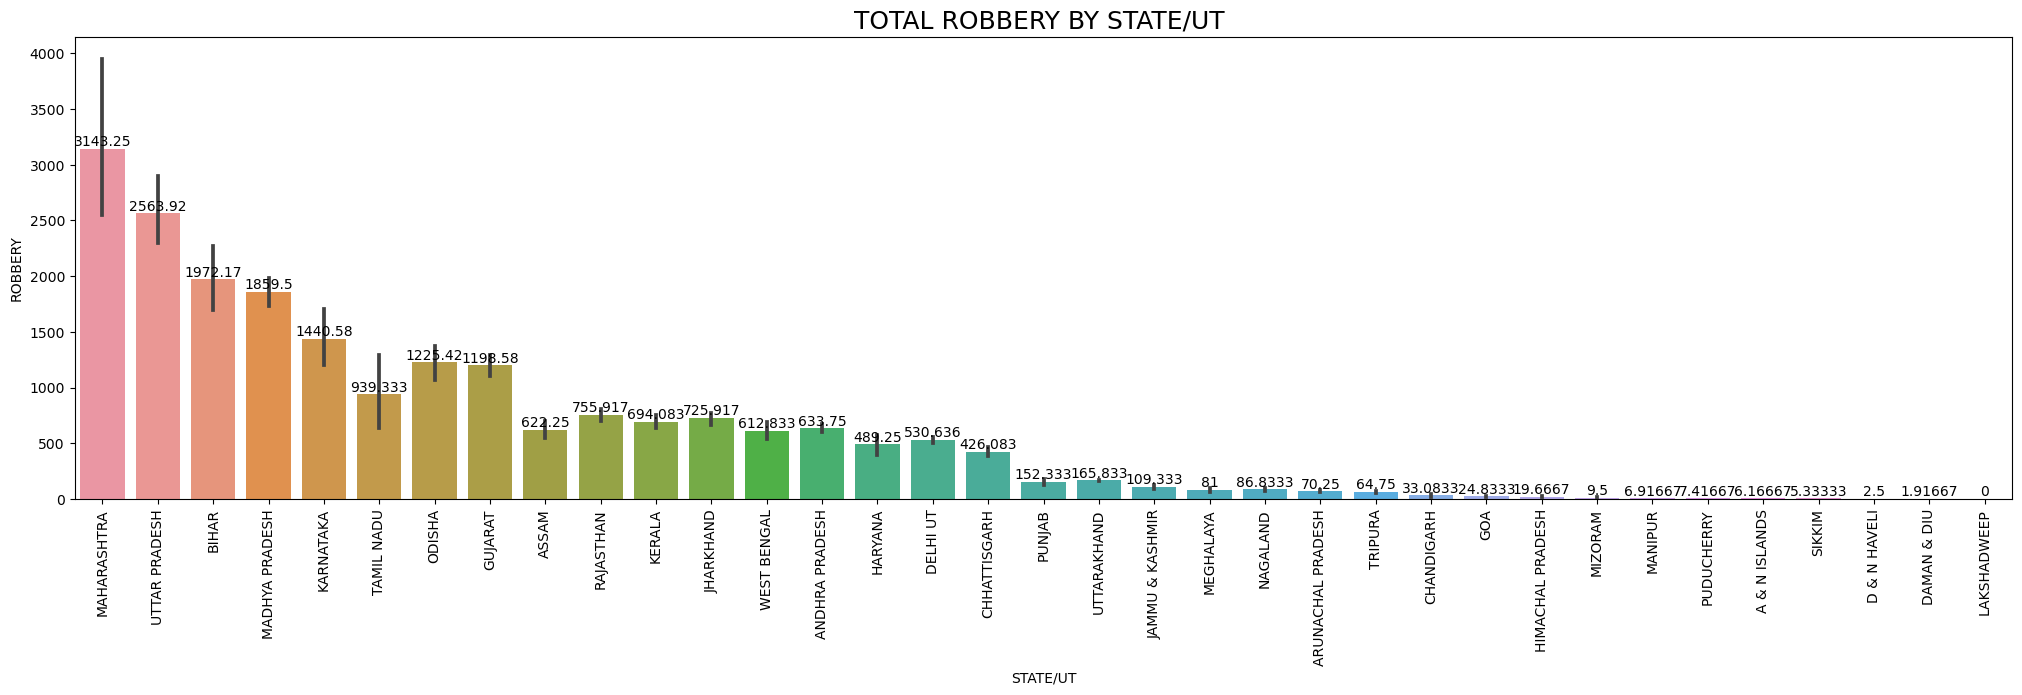

In [193]:
sort_icp=df.sort_values(by='ROBBERY', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='ROBBERY')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL ROBBERY BY STATE/UT ', fontsize=18)
plt.show()

Maharastra has highest number of robbery crime as compare to any other state

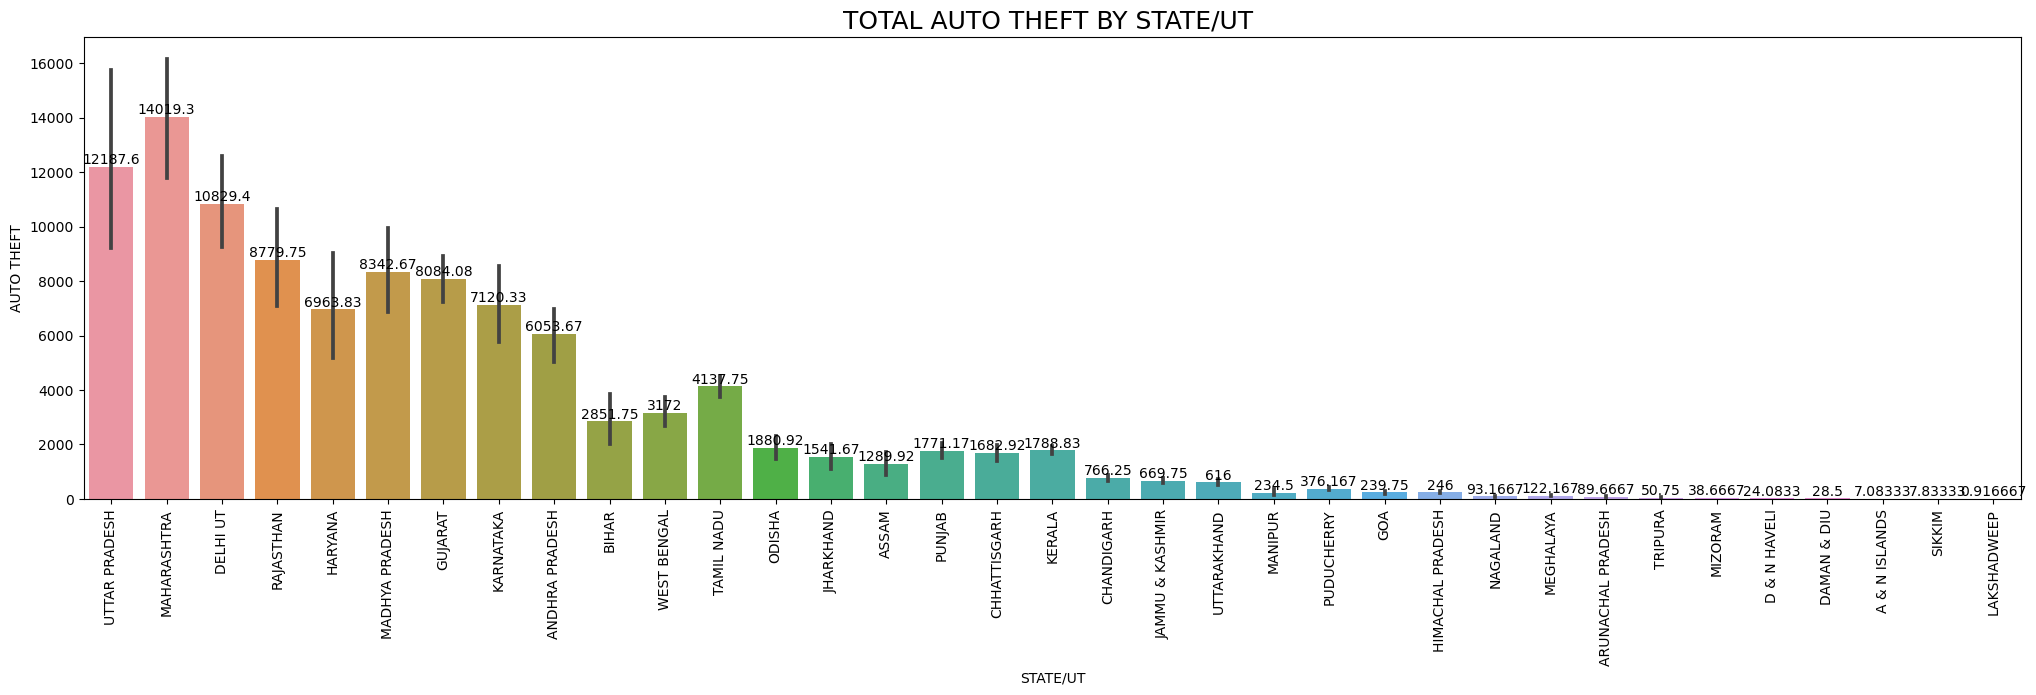

In [196]:
sort_icp=df.sort_values(by='AUTO THEFT', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='AUTO THEFT')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL AUTO THEFT BY STATE/UT ', fontsize=18)
plt.show()

Maharastra has highest number of auto theft crime as compare to any other state

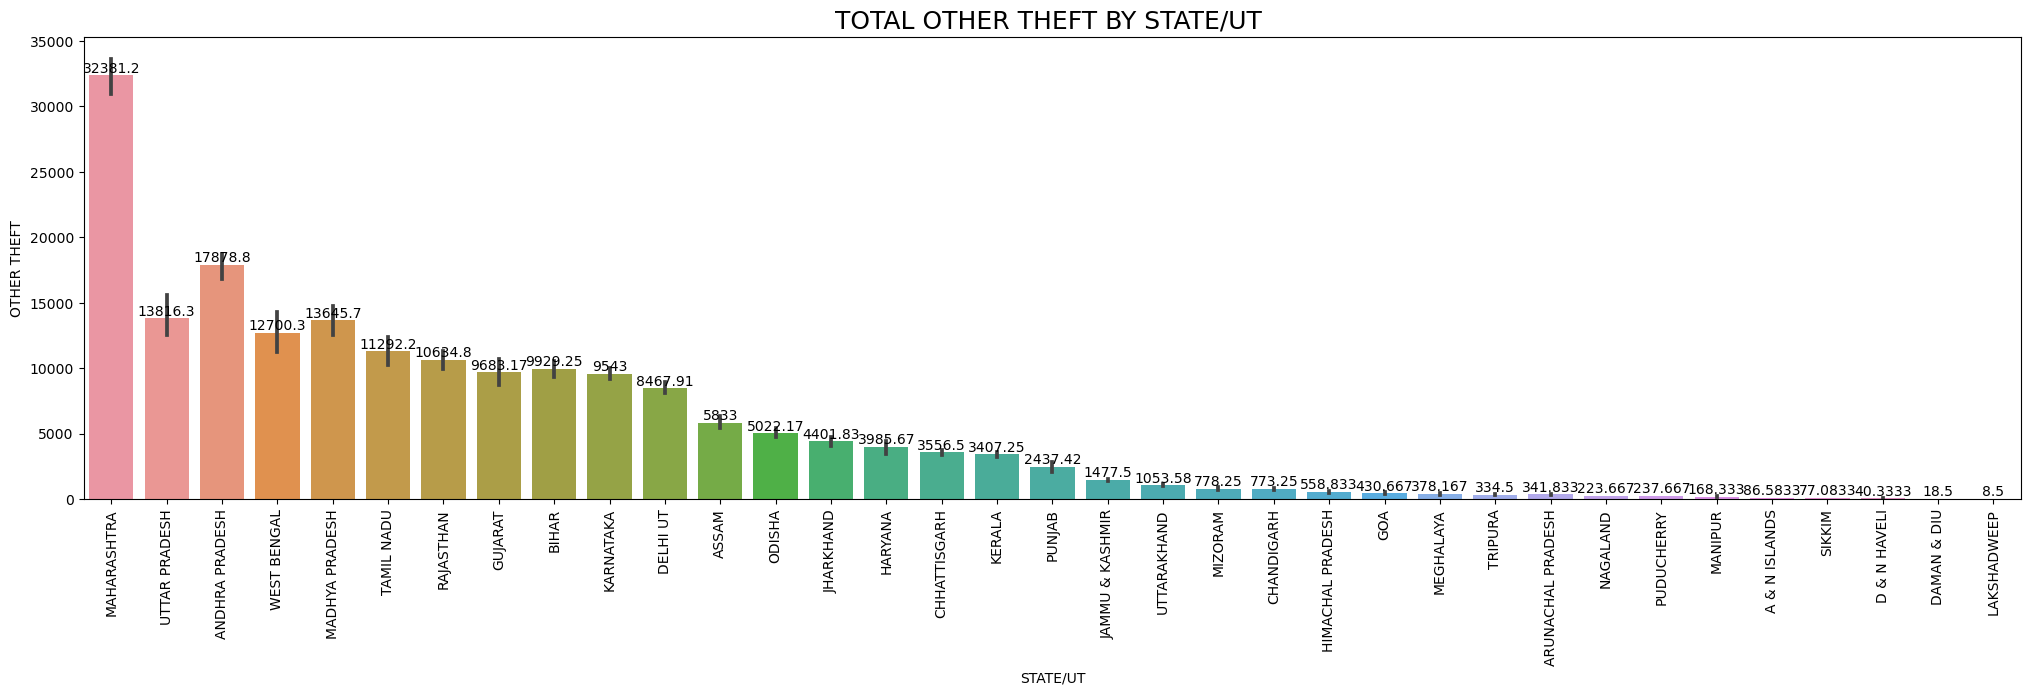

In [197]:
sort_icp=df.sort_values(by='OTHER THEFT', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_icp, x='STATE/UT', y='OTHER THEFT')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('TOTAL OTHER THEFT BY STATE/UT ', fontsize=18)
plt.show()

Maharastra has highest number of other theft crime as compare to any other state

### Overall Insights

From the IPC crime data of 2001 to 2011, we can observe several key points:

**Deep Analysis**
- **Murder-related Crime:** Uttar Pradesh has the highest number of murder-related crimes.
- **Rape-related Crime:** Madhya Pradesh reports the highest number of rape-related crimes.
- **Crimes Against Girls and Women:** The highest rates are observed in Madhya Pradesh, West Bengal, Uttar Pradesh, Rajasthan, and Maharashtra.
- **Kidnapping-related Crime:** Uttar Pradesh also leads in kidnapping-related crimes.
- **Robbery and Theft:** Maharashtra has the highest number of robbery and theft cases.
- **Highest IPC Crime Rate:** Madhya Pradesh has the highest total IPC crime rate, with over 200,000 reported cases.
- **Lowest IPC Crime Rate:** Lakshadweep has the lowest total IPC crime rate, with fewer than 100 reported cases.
- **General Observation on Crime:** There is significant variation in IPC crimes across states and UTs. States like Maharashtra and Tamil Nadu show high crime rates, while UTs like Lakshadweep and Daman & Diu report very low crime rates.

**Literacy Rate Insights**
- **Highest Literacy Rate:** Kerala has the highest literacy rate at 90.86%, followed by Lakshadweep (88.8%) and Mizoram (86.66%).
- **Lowest Literacy Rate:** Bihar has the lowest literacy rate at 47%.
- **General Observation on Literacy:** Literacy rates vary significantly across states and UTs. Many states achieve literacy rates above 75%, indicating a general trend towards higher literacy, although there are exceptions like Bihar with much lower rates.

**Summarized Insights**
- There is no direct correlation between literacy rates and IPC crimes; states with both high and low literacy rates experience varying crime levels.
- States with mid-range literacy rates (60%-70%) tend to show higher IPC crimes, suggesting that other socioeconomic and cultural factors significantly influence crime rates.
- States like Uttar Pradesh and Madhya Pradesh are prominent in specific crime categories, while Kerala and Bihar represent the extremes of literacy rates. This indicates the complexity and multifaceted nature of crime and literacy in India.

#### We will analysing SC crime data

In [6]:
sc_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv',encoding='latin1')

In [7]:
sc_crime_df.head()

STATE/UT       DISTRICT  Year  Murder  Rape  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     4   
2  ANDHRA PRADESH       CHITTOOR  2001       3     3   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     3   
4  ANDHRA PRADESH  EAST GODAVARI  2001       1     3   

   Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                         4        0        0      0     3   
1                         0        0        0      0    49   
2                         0        0        0      0    38   
3                         0        0        0      0    20   
4                         0        0        0      0     3   

   Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                   0                                    15   
1                                  21                                     0   
2                                  36                                     0   
3                                  52                                     0   
4                                  12                                    63   

   Other Crimes Against SCs  
0                        32  
1                        53  
2                        34  
3                        25  
4                         7

In [8]:
sc_crime_df.shape

(9018, 13)

In [9]:
for i in sc_crime_df.columns:
    print(i,sc_crime_df[i].unique(),'\n')

STATE/UT ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY'] 

DISTRICT ['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM'
 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE'
 'NIZAMABAD' 'PRAKASHAM' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'TOTAL' 'CHANGLANG'
 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE'
 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UPPER

From above we observed that there is 'Total' value present in District columns
We will seletect data only for state/ut wise

In [10]:
sc_total= sc_crime_df[sc_crime_df['DISTRICT']=='TOTAL']
sc_total.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
28      ANDHRA PRADESH    TOTAL  2001      45    69                        22   
42   ARUNACHAL PRADESH    TOTAL  2001       0     0                         0   
70               ASSAM    TOTAL  2001       0     0                         0   
115              BIHAR    TOTAL  2001      28    35                         8   
134       CHHATTISGARH    TOTAL  2001       8    52                         8   

     Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
28         3        2      6   518                                 950   
42         0        0      0     0                                   0   
70         0        1      1     4                                   0   
115        2        1     17   378                                 513   
134        0        1      0   101                                 164   

     Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
28                                    312                      1006  
42                                      0                         0  
70                                      0                         0  
115                                    81                       240  
134                                     1                       166

We will merge two dataset literacy rate and ipc crime

In [11]:
df2=pd.merge(sc_total,lite_surv_df,on='STATE/UT',how='inner')

In [12]:
df2.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH    TOTAL  2001      45    69                        22   
1  ANDHRA PRADESH    TOTAL  2002      60    98                        18   
2  ANDHRA PRADESH    TOTAL  2003      33    79                        27   
3  ANDHRA PRADESH    TOTAL  2004      39    66                        28   
4  ANDHRA PRADESH    TOTAL  2005      37    74                        21   

   Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
0        3        2      6   518                                 950   
1        0        4     12   568                                 830   
2        1       15      4   615                                1234   
3        0        7     20   474                                1319   
4        0        0      9   459                                1244   

   Protection of Civil Rights (PCR) Act  Other Crimes Against SCs   2001  2011  
0                                   312                      1006  60.47  67.0  
1                                   459                      1336  60.47  67.0  
2                                   165                      1386  60.47  67.0  
3                                    68                      1234  60.47  67.0  
4                                    61                      1212  60.47  67.0

Creating new columns Total SC crimes

In [13]:
# Add a new column 'Total' with the sum of all row values
# Select only integer columns
int_columns = df2.select_dtypes(include='int')
df2['Total SC Crimes'] = int_columns.sum(axis=1)

In [14]:
df2.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH    TOTAL  2001      45    69                        22   
1  ANDHRA PRADESH    TOTAL  2002      60    98                        18   
2  ANDHRA PRADESH    TOTAL  2003      33    79                        27   
3  ANDHRA PRADESH    TOTAL  2004      39    66                        28   
4  ANDHRA PRADESH    TOTAL  2005      37    74                        21   

   Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
0        3        2      6   518                                 950   
1        0        4     12   568                                 830   
2        1       15      4   615                                1234   
3        0        7     20   474                                1319   
4        0        0      9   459                                1244   

   Protection of Civil Rights (PCR) Act  Other Crimes Against SCs   2001  \
0                                   312                      1006  60.47   
1                                   459                      1336  60.47   
2                                   165                      1386  60.47   
3                                    68                      1234  60.47   
4                                    61                      1212  60.47   

   2011  Total SC Crimes  
0  67.0             4934  
1  67.0             5387  
2  67.0             5562  
3  67.0             5259  
4  67.0             5122

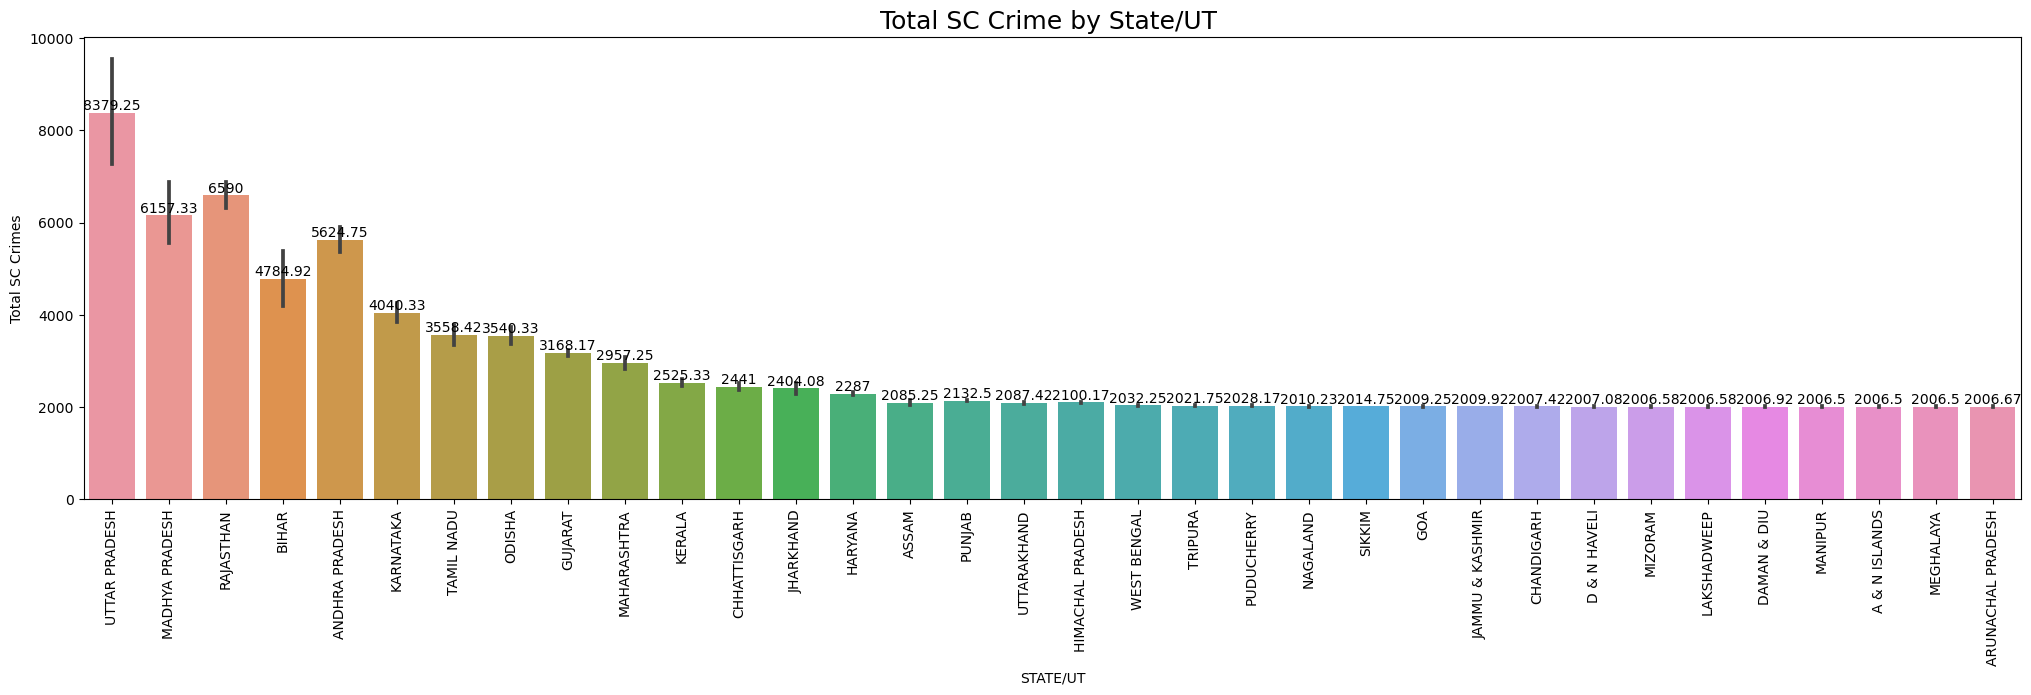

In [15]:
sort_sc=df2.sort_values(by='Total SC Crimes', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Total SC Crimes')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total SC Crime by State/UT ', fontsize=18)
plt.show()

From above graph we can observed
- Uttar Pradesh has the highest total SC crimes (8378.25), followed by Madhya Pradesh (6153.33) and Rajasthan (6580).
- Several states/UTs have relatively similar low SC crime rates (around 2006.5), indicating some states have managed to keep the SC crimes low.
- The distribution of SC crimes varies widely across different states. Uttar Pradesh, Madhya Pradesh, and Rajasthan report the highest SC crimes. The state-specific policies, social dynamics, and law enforcement efficiency could be major contributing factors.

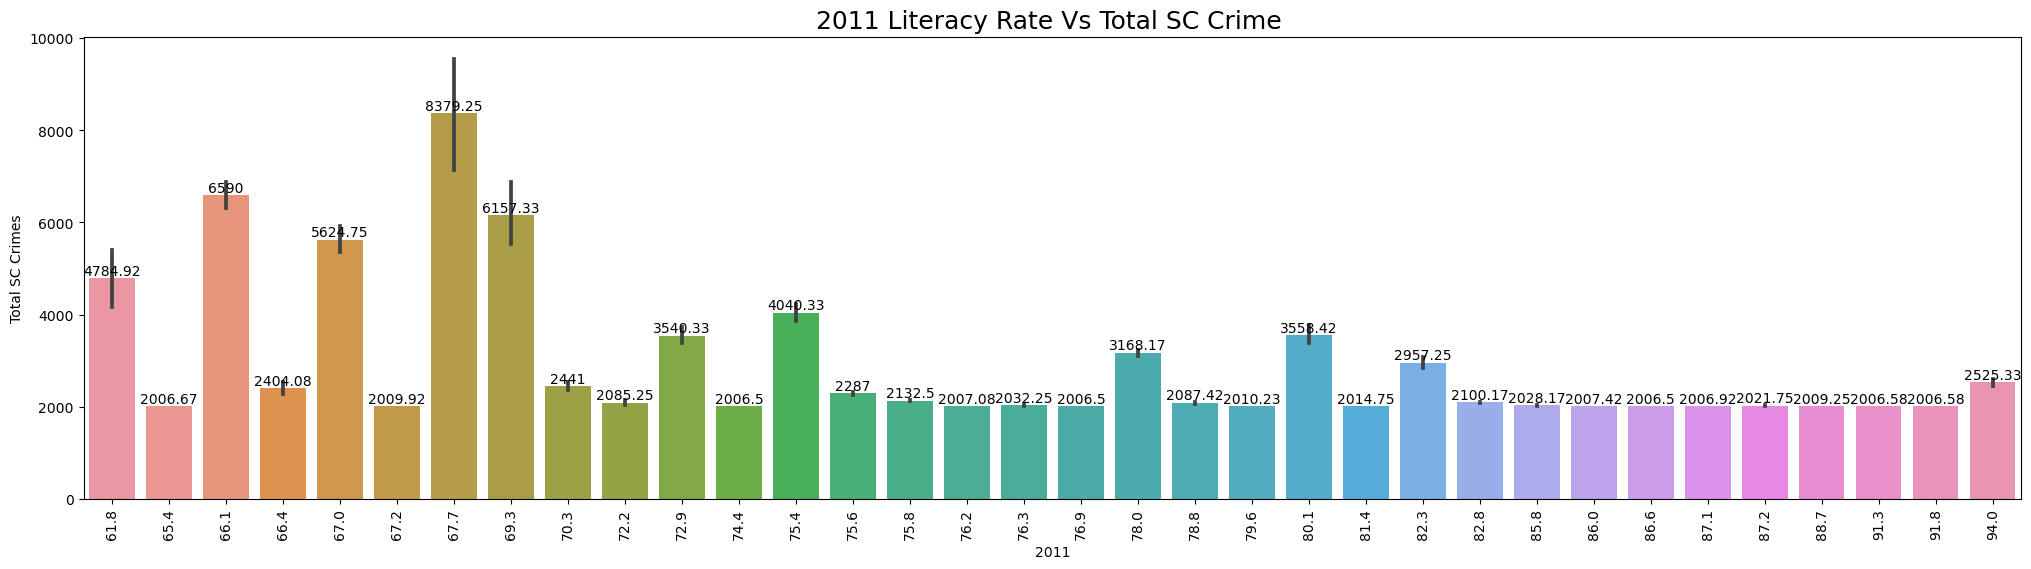

In [221]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=df2, x='2011',y='Total SC Crimes')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2011 Literacy Rate Vs Total SC Crime ', fontsize=18)
plt.show()

From above graph we can observed
- states with literacy rates around 72.9% and 74.4% have very high crime rates, whereas states with literacy rates around 91.8% and 94.0% have much lower crime rates.
- The highest crime rate (8378.25) UTTAR PRADESH is associated with a literacy rate of 67.2%.
- The lowest crime rate (2006.67) ARUNACHAL PRADESH appears at a literacy rate of 61.8%.

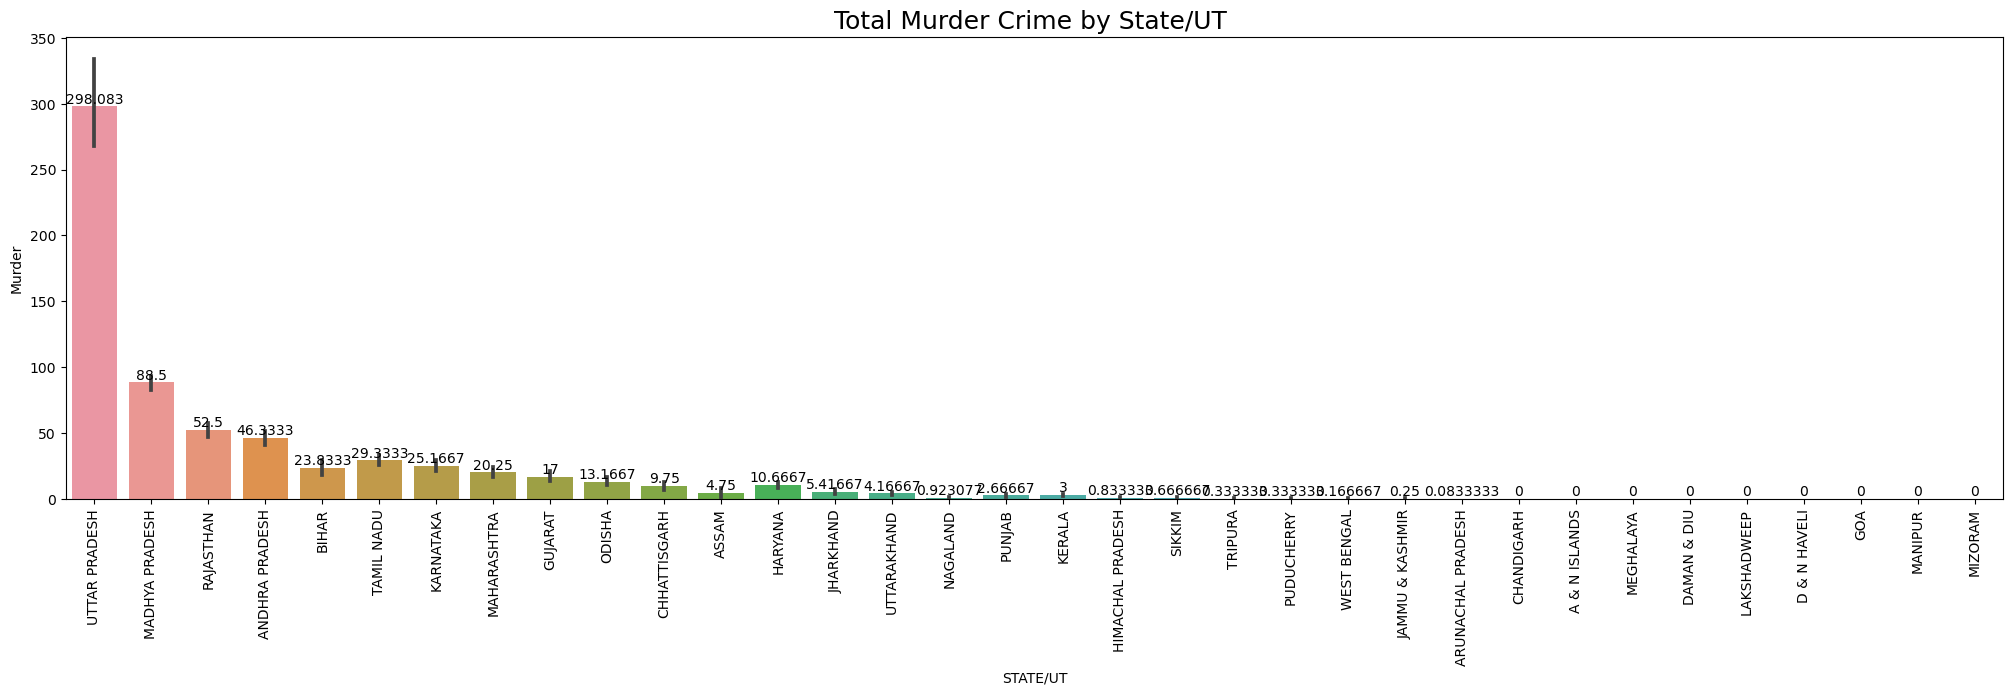

In [223]:
sort_sc=df2.sort_values(by='Murder', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Murder')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Murder Crime by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of murder crime as compare to any other state

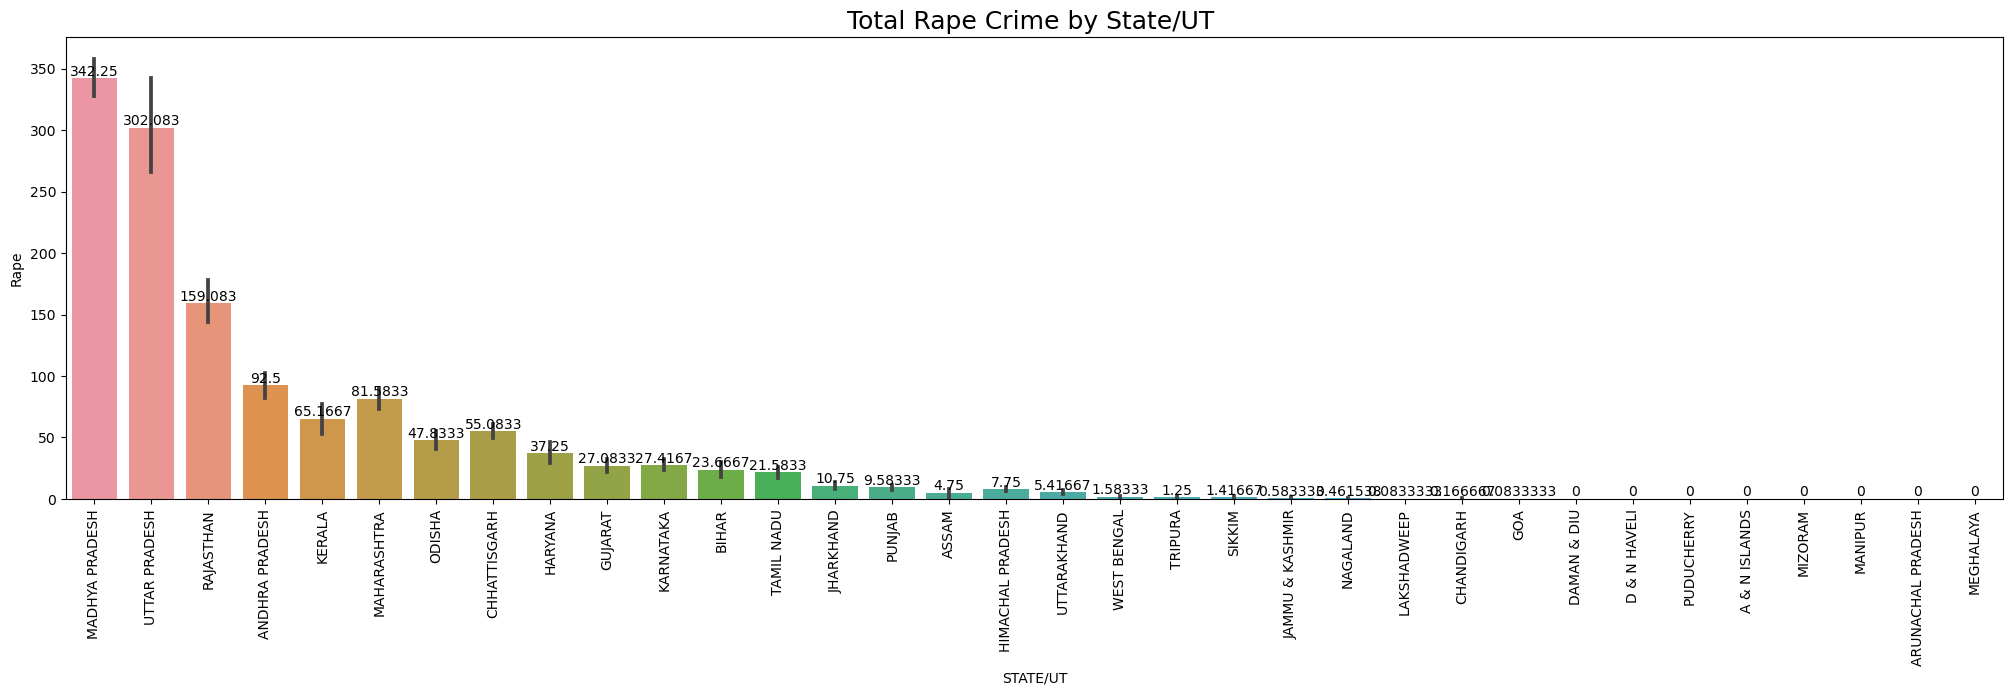

In [16]:
sort_sc=df2.sort_values(by='Rape', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Rape')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Rape Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of rape crime as compare to any other state

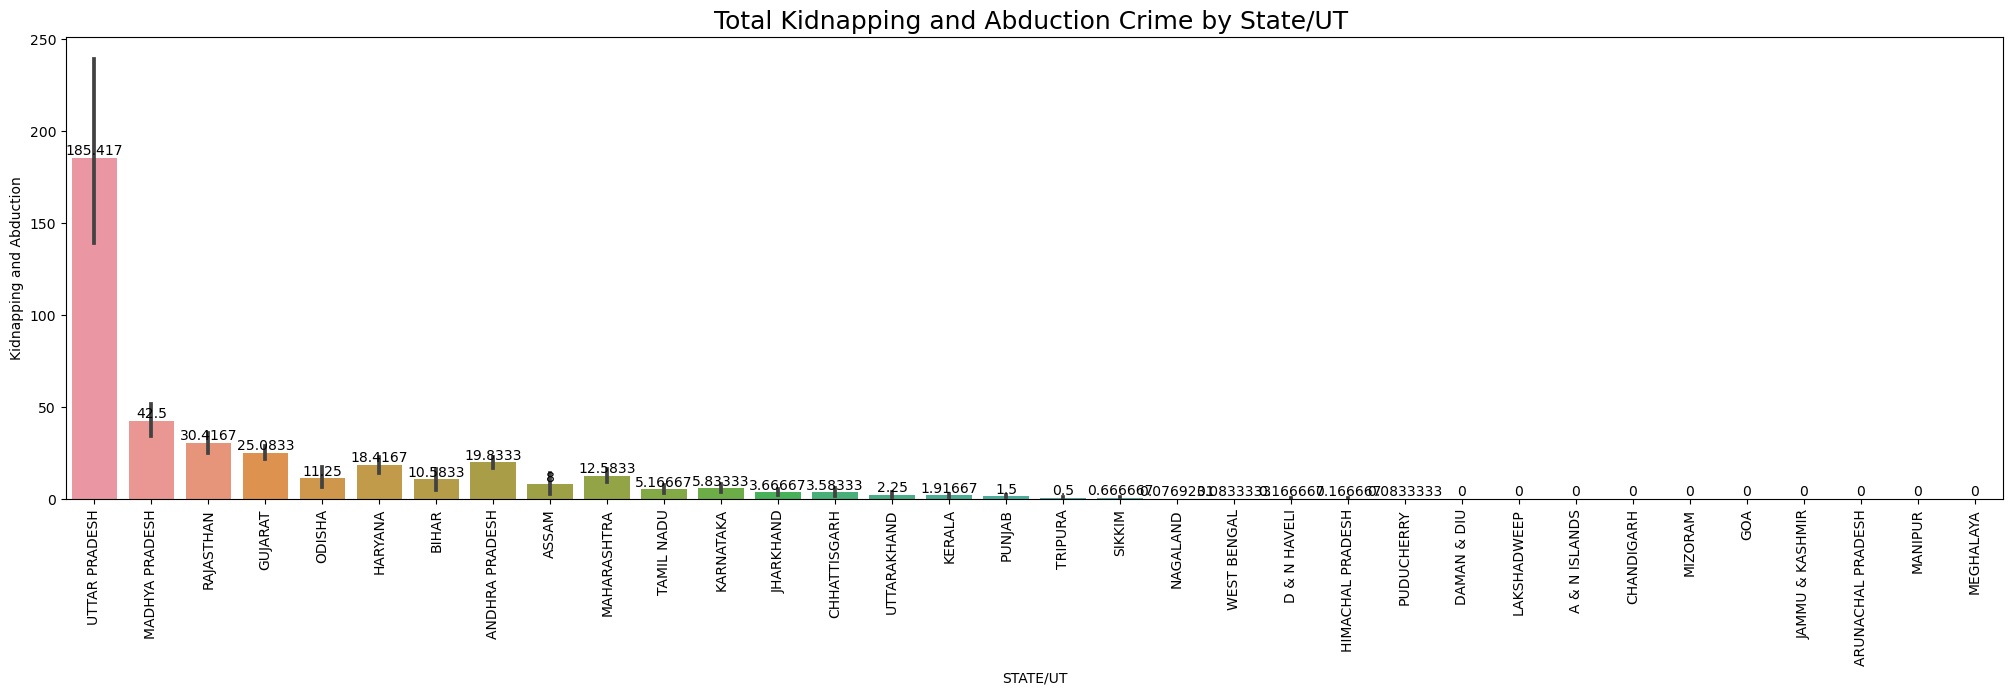

In [18]:
sort_sc=df2.sort_values(by='Kidnapping and Abduction', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Kidnapping and Abduction')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Kidnapping and Abduction Crime by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of Kidnapping and Abduction crime as compare to any other state

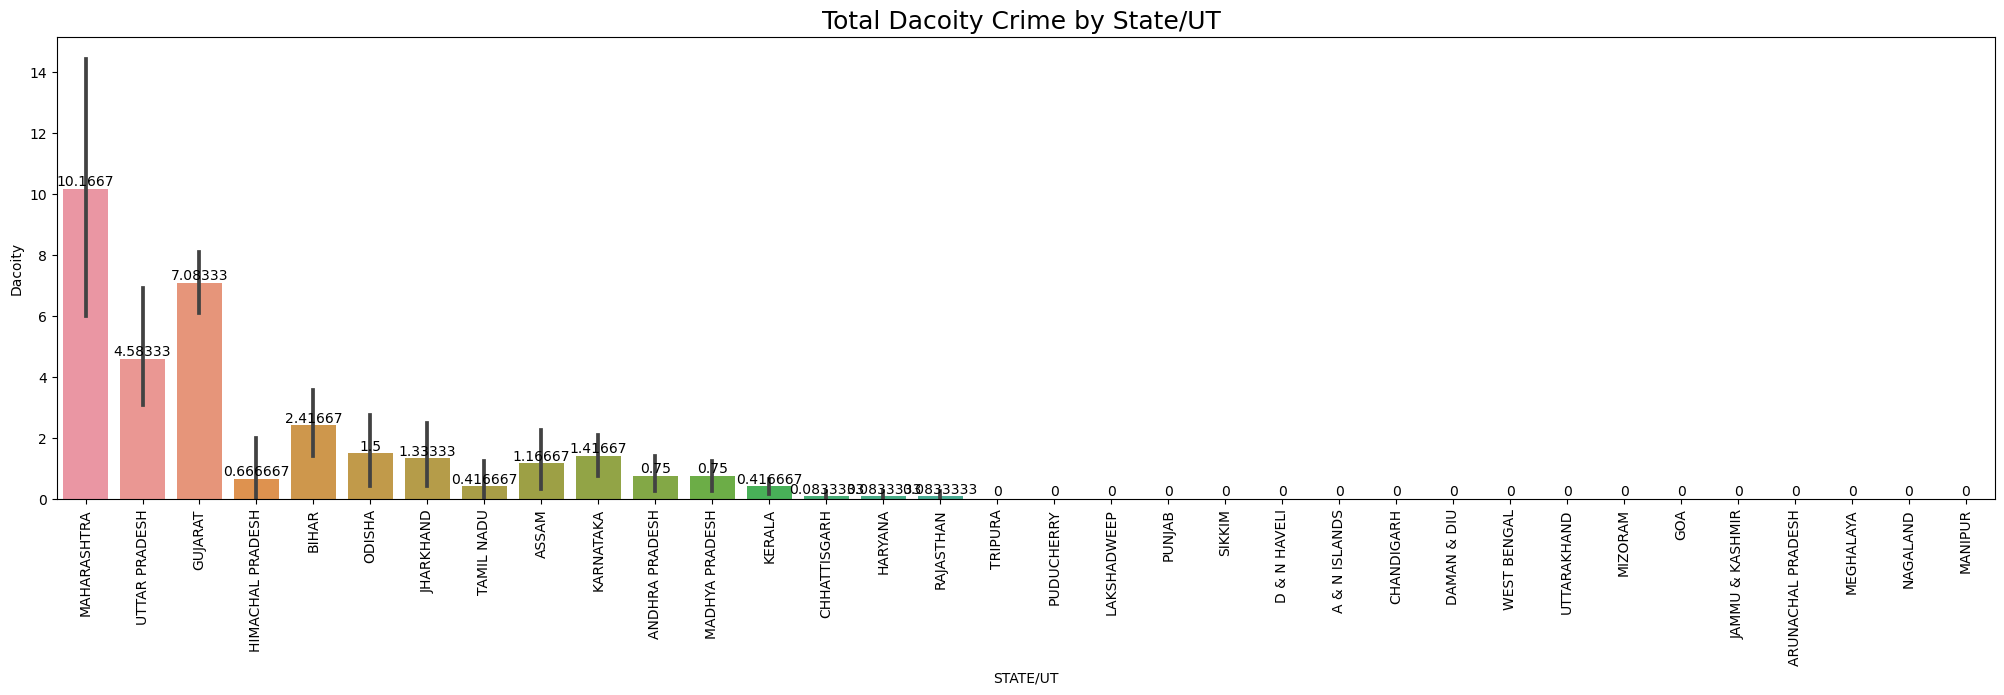

In [19]:
sort_sc=df2.sort_values(by='Dacoity', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Dacoity')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Dacoity Crime by State/UT ', fontsize=18)
plt.show()

Maharashtra has highest number of dacoity crime as compare to any other state

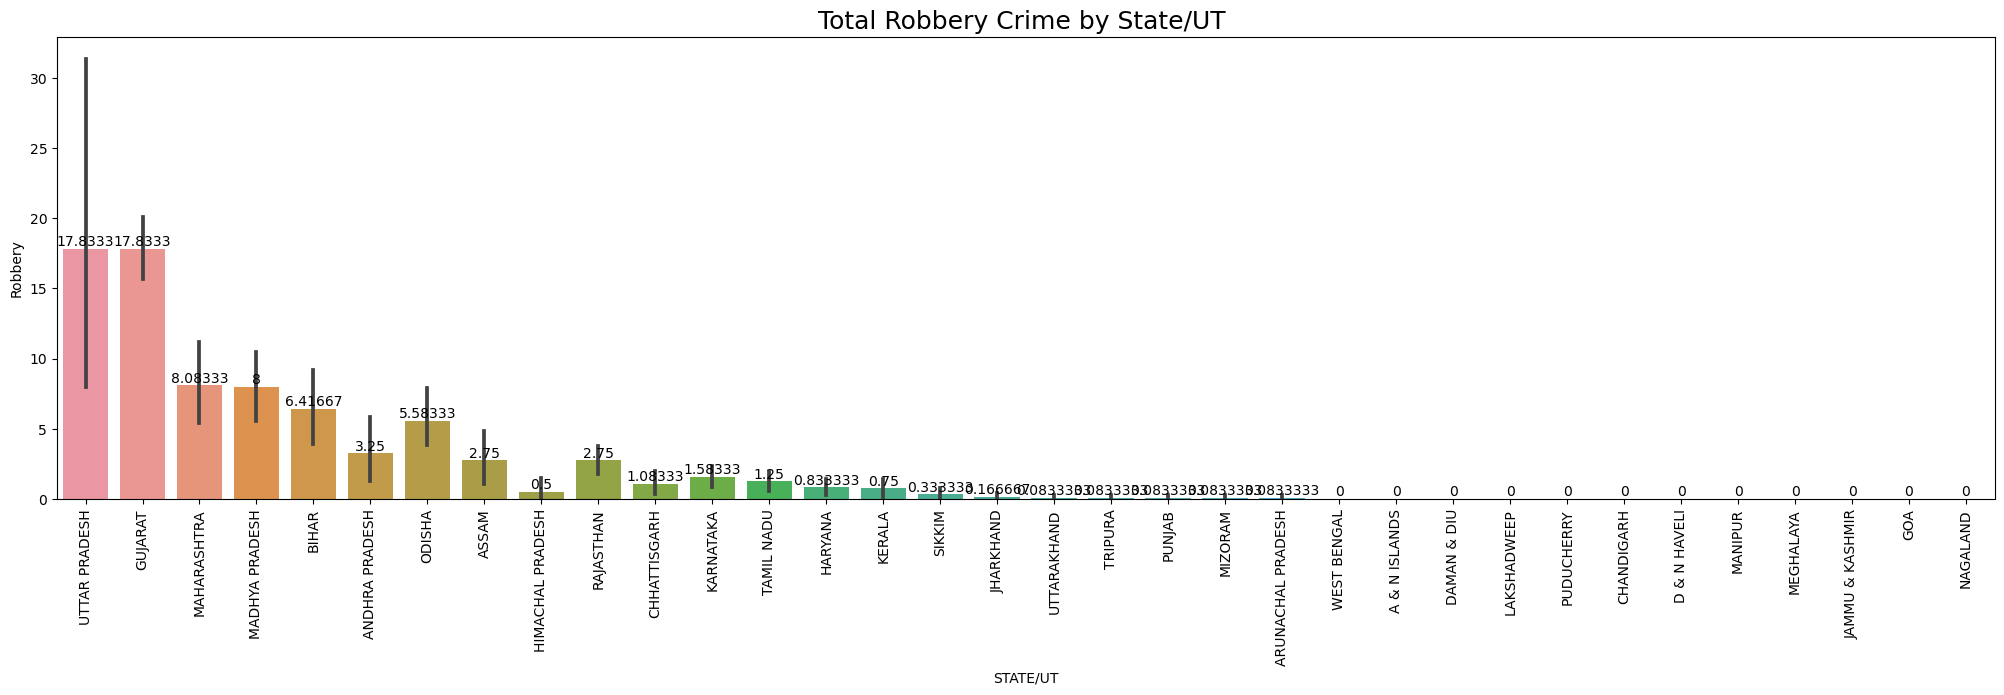

In [20]:
sort_sc=df2.sort_values(by='Robbery', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Robbery')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Robbery Crime by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of robbery crime as compare to any other state

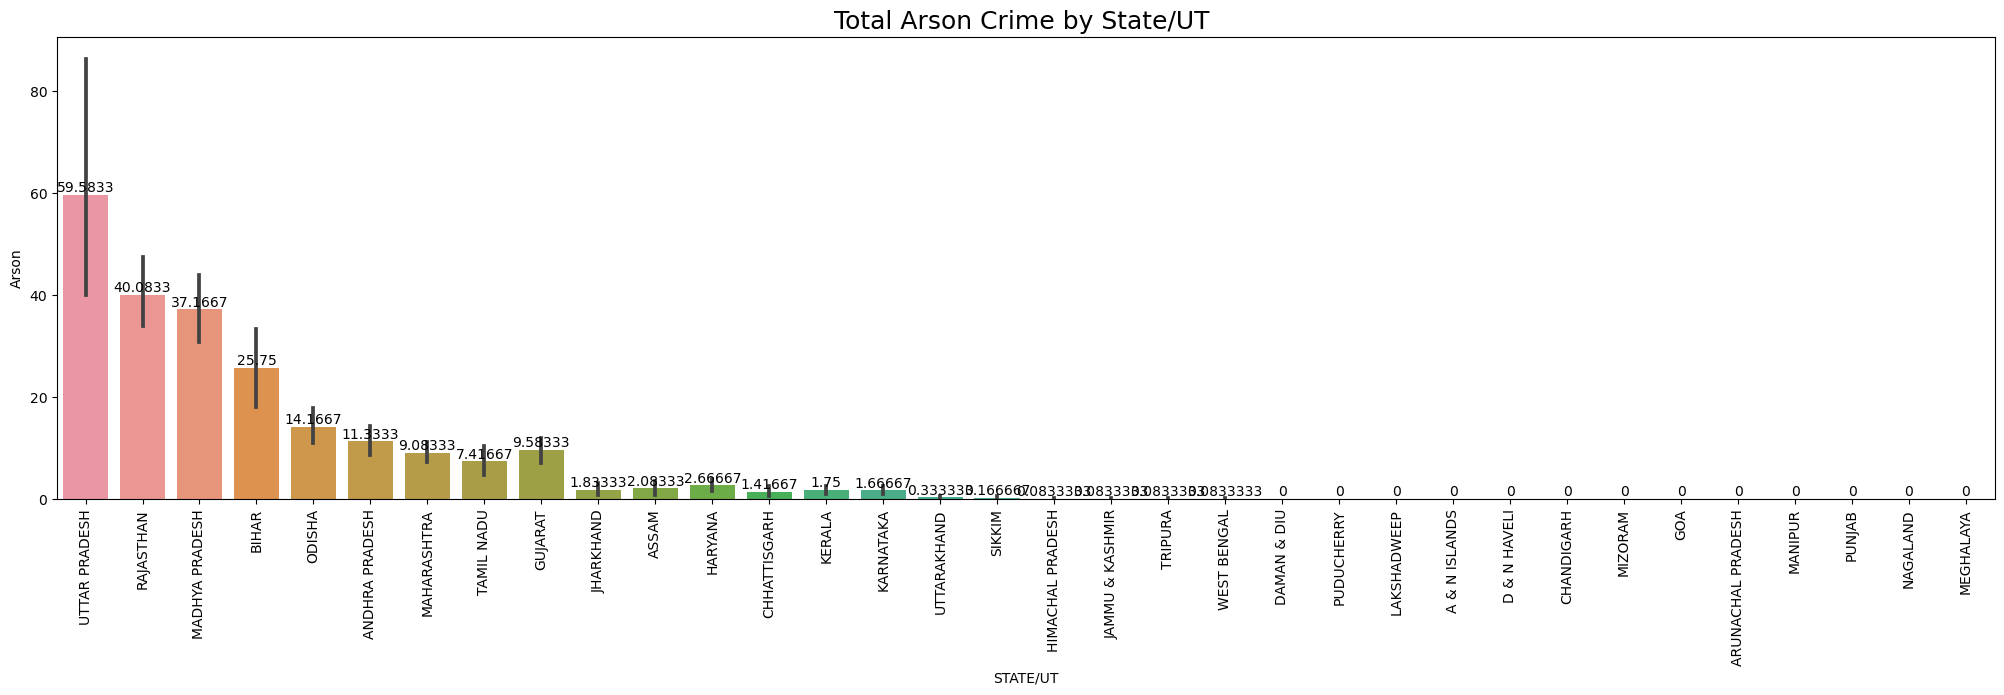

In [21]:
sort_sc=df2.sort_values(by='Arson', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Arson')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Arson Crime by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of arson crime as compare to any other state

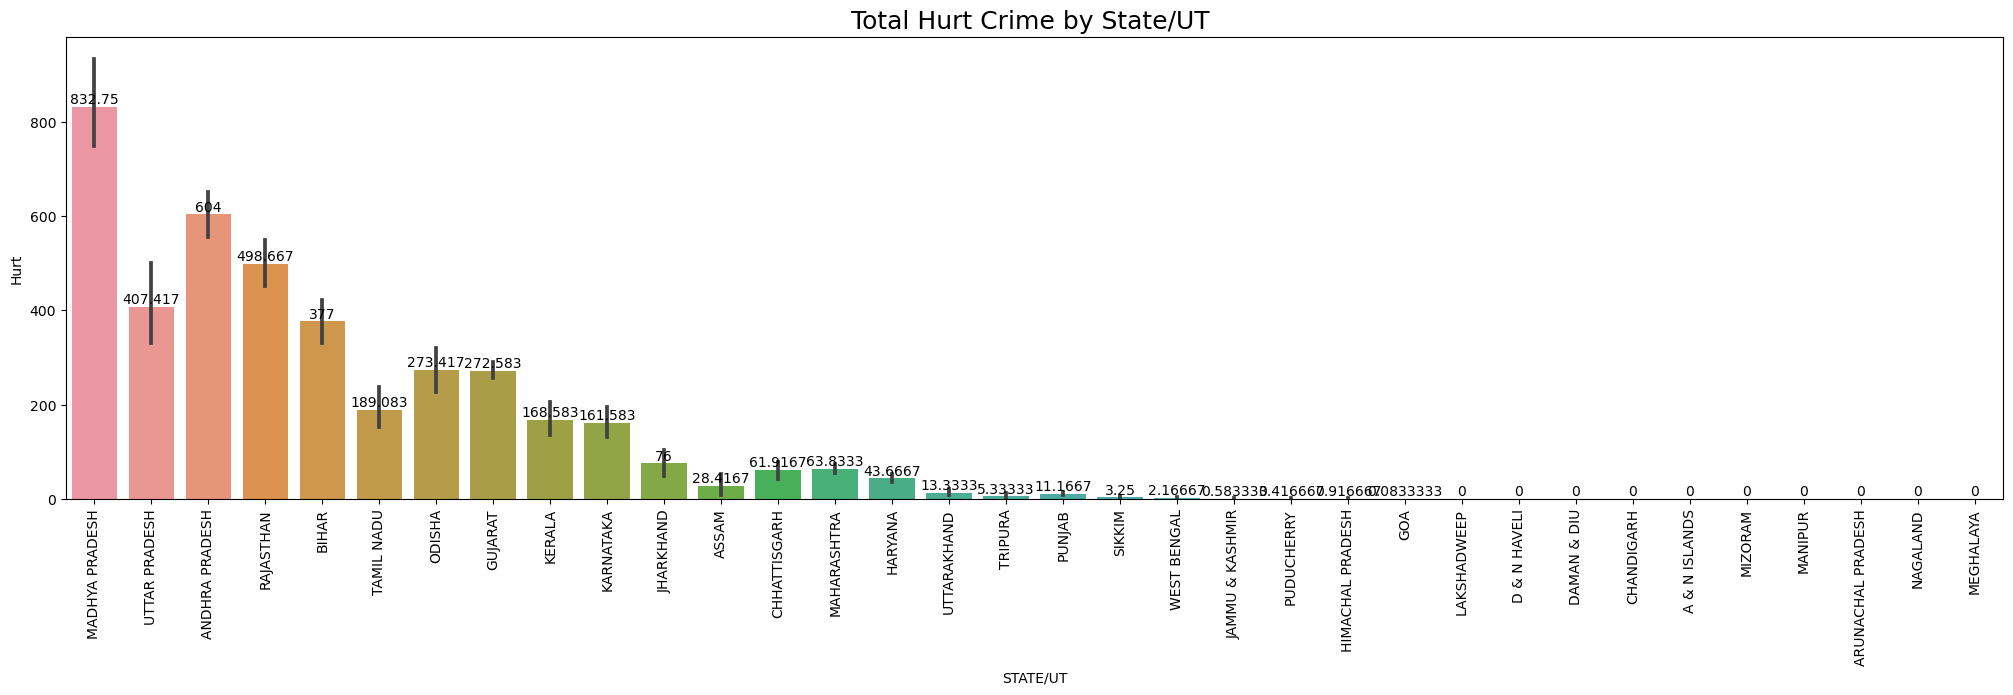

In [22]:
sort_sc=df2.sort_values(by='Hurt', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Hurt')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Hurt Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of hurt crime as compare to any other state

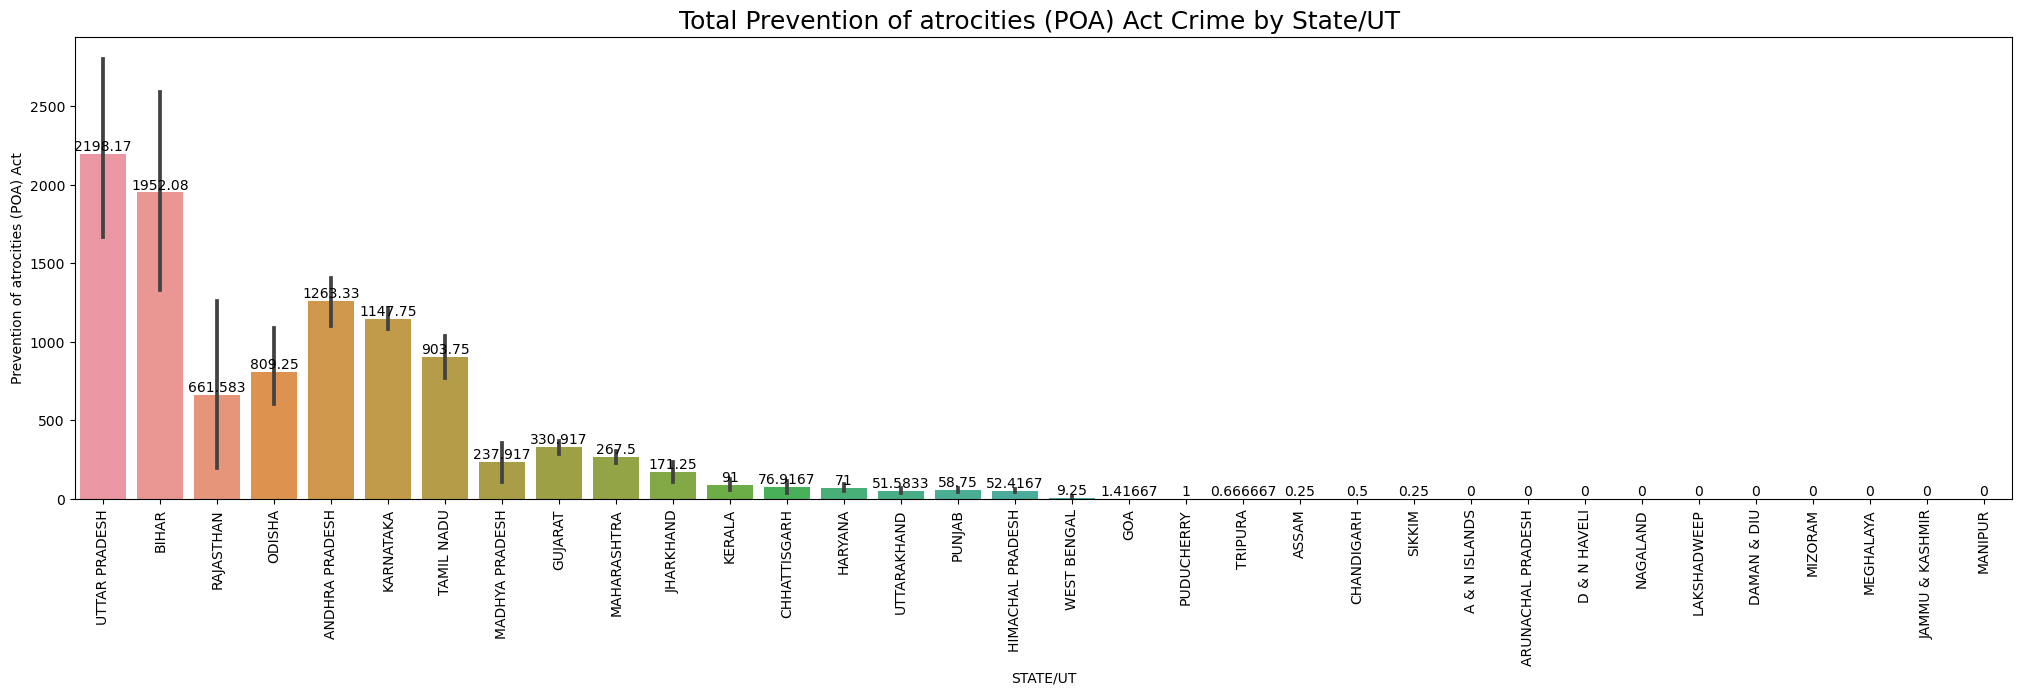

In [23]:
sort_sc=df2.sort_values(by='Prevention of atrocities (POA) Act', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Prevention of atrocities (POA) Act')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Prevention of atrocities (POA) Act Crime by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of POA crime as compare to any other state

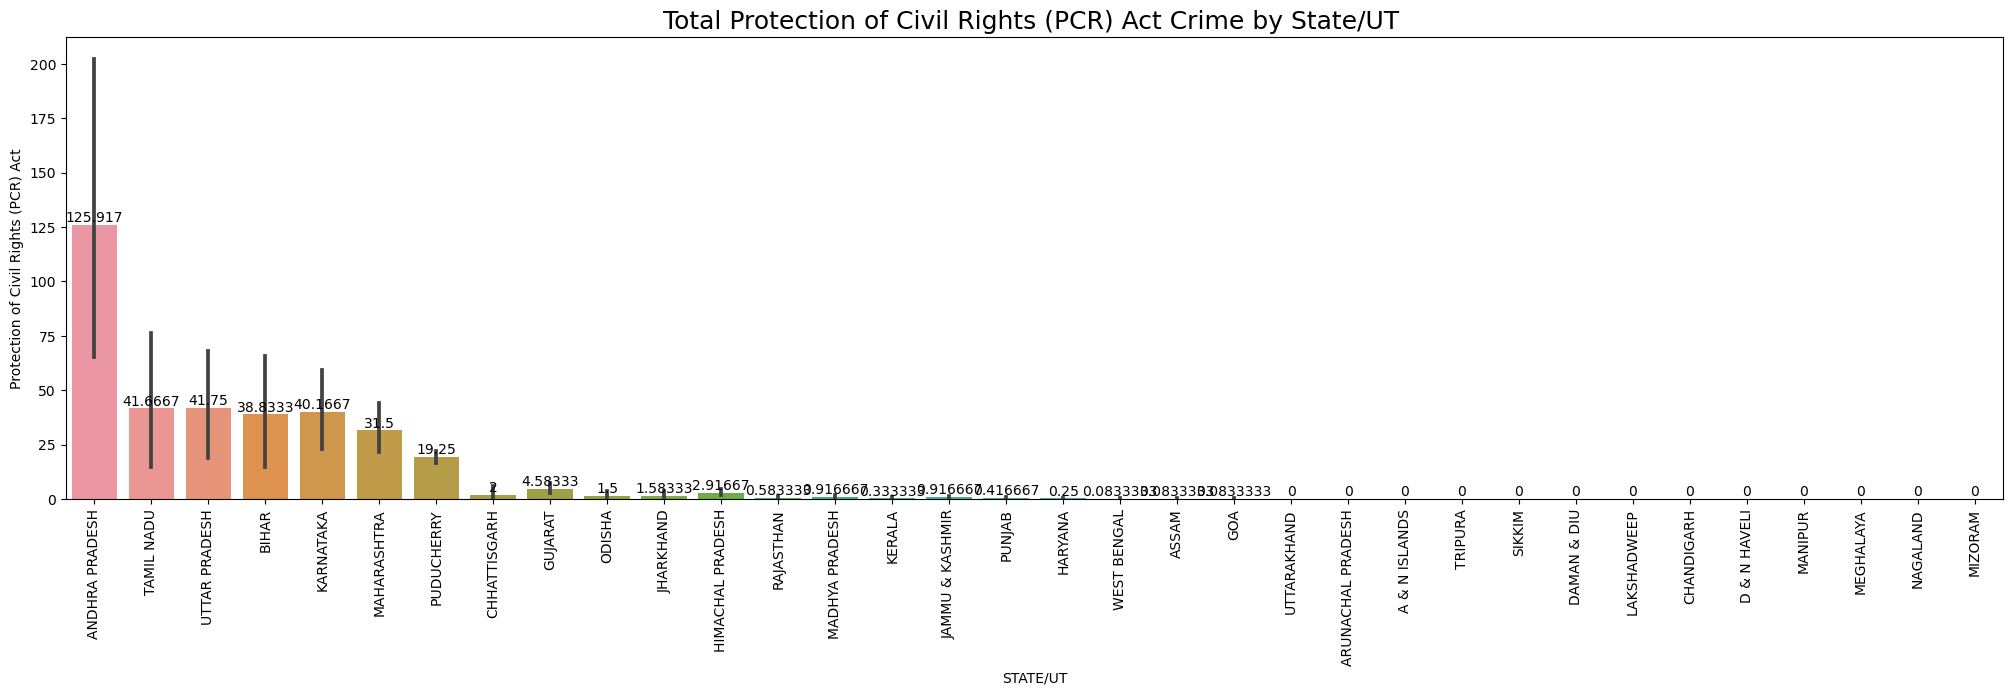

In [24]:
sort_sc=df2.sort_values(by='Protection of Civil Rights (PCR) Act', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Protection of Civil Rights (PCR) Act')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Protection of Civil Rights (PCR) Act Crime by State/UT ', fontsize=18)
plt.show()

Andhra Pradesh has highest number of PCR act crime as compare to any other state

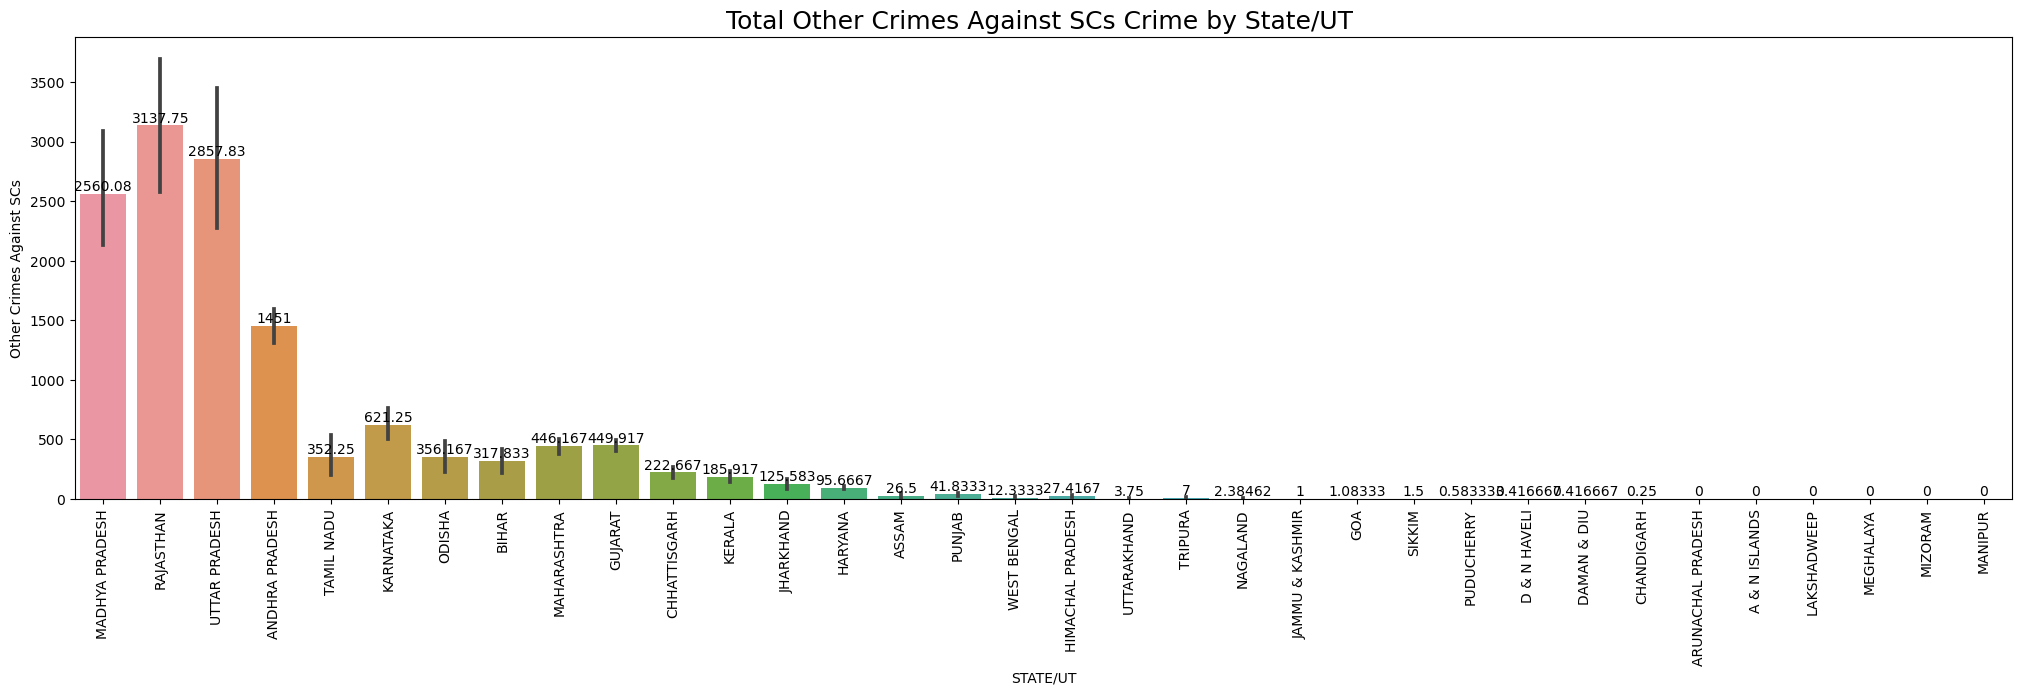

In [25]:
sort_sc=df2.sort_values(by='Other Crimes Against SCs', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_sc, x='STATE/UT', y='Other Crimes Against SCs')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Other Crimes Against SCs Crime by State/UT ', fontsize=18)
plt.show()

Rajasthan has highest number of Other Crimes against SCs as compare to any other state

## Summary Report on Crime Data Analysis in Indian States

### Overview

This report analyzes crime data from various Indian states, highlighting Uttar Pradesh and Madhya Pradesh as the states with the highest crime rates in several categories. Additionally, the report examines the correlation between literacy rates and crime rates across different states.

### Crime Analysis

1. **Murder**: 
   - **Highest**: Uttar Pradesh
   - **Second Highest**: Madhya Pradesh

2. **Rape**: 
   - **Highest**: Madhya Pradesh
   - **Second Highest**: Uttar Pradesh

3. **Kidnapping**: 
   - **Highest**: Uttar Pradesh
   - **Second Highest**: Madhya Pradesh

4. **Dacoity**: 
   - **Highest**: Maharashtra
   - **Second Highest**: Uttar Pradesh

5. **Robbery**: 
   - **Highest**: Uttar Pradesh
   - **Second Highest**: Gujarat

6. **Arson**: 
   - **Highest**: Uttar Pradesh
   - **Second Highest**: Rajasthan

7. **Hurt**: 
   - **Highest**: Madhya Pradesh
   - **Second Highest**: Uttar Pradesh

### Literacy Rates and Crime Rates

- States with literacy rates around 72.9% to 74.4% show very high crime rates.
- States with higher literacy rates, around 91.8% to 94.0%, exhibit much lower crime rates.
- Uttar Pradesh, with the highest crime rate of 8378.25, has a literacy rate of 67.2%.
- Arunachal Pradesh, with the lowest crime rate of 2006.67, has a literacy rate of 61.8%.

### Conclusion

The data indicates a significant correlation between literacy rates and crime rates. States with lower literacy rates tend to have higher crime rates, suggesting that improving literacy could be a crucial factor in crime reduction. Uttar Pradesh and Madhya Pradesh, in particular, require focused efforts to address both their high crime rates and relatively low literacy rates.


### We will analysing ST crime data

In [6]:
st_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\02_District_wise_crimes_committed_against_ST_2001_2012.csv',encoding='latin1')

In [7]:
st_crime_df.head()

STATE/UT       DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
0  ANDHRA PRADESH       ADILABAD  2001       0     1                     2   
1  ANDHRA PRADESH      ANANTAPUR  2001       0     0                     0   
2  ANDHRA PRADESH       CHITTOOR  2001       0     0                     0   
3  ANDHRA PRADESH       CUDDAPAH  2001       0     0                     0   
4  ANDHRA PRADESH  EAST GODAVARI  2001       0     0                     0   

   Dacoity  Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
0        0        0      0     2                                     0   
1        0        0      0     7                                     0   
2        0        0      0     2                                     0   
3        0        0      0     2                                     0   
4        0        0      0     0                                     0   

   Prevention of atrocities (POA) Act  Other Crimes Against STs  
0                                   0                        13  
1                                   1                         6  
2                                   0                         0  
3                                   2                         0  
4                                   0                        14

In [8]:
st_crime_df.shape

(9018, 13)

In [9]:
for i in st_crime_df.columns:
    print(i,st_crime_df[i].unique(),'\n')

STATE/UT ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY'] 

DISTRICT ['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM'
 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE'
 'NIZAMABAD' 'PRAKASHAM' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'TOTAL' 'CHANGLANG'
 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE'
 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UPPER

From above we observed that there is 'Total' value present in District columns so We will seletect data only for state/ut wise

In [10]:
st_total= st_crime_df[st_crime_df['DISTRICT']=='TOTAL']
st_total.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping Abduction  \
28      ANDHRA PRADESH    TOTAL  2001       4    21                     5   
42   ARUNACHAL PRADESH    TOTAL  2001       4     5                     7   
70               ASSAM    TOTAL  2001       0     0                     0   
115              BIHAR    TOTAL  2001       1     4                     1   
134       CHHATTISGARH    TOTAL  2001      18    87                     5   

     Dacoity  Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
28         0        0      1   106                                    26   
42         0        0      1    18                                     0   
70         0        0      0     0                                     0   
115        0        0      0     5                                     8   
134        1        7      1    63                                     2   

     Prevention of atrocities (POA) Act  Other Crimes Against STs  
28                                  129                       220  
42                                    0                        37  
70                                    0                         0  
115                                  10                        18  
134                                   6                       296

We will merge two dataset literacy rate and sc crime

In [11]:
df3=pd.merge(st_total,lite_surv_df,on='STATE/UT',how='inner')

In [12]:
# Add a new column 'Total' with the sum of all row values
# Select only integer columns
int_columns = df3.select_dtypes(include='int')
df3['Total ST Crimes'] = int_columns.sum(axis=1)

In [13]:
df3.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping Abduction  Dacoity  \
0  ANDHRA PRADESH    TOTAL  2001       4    21                     5        0   
1  ANDHRA PRADESH    TOTAL  2002       2    24                     6        0   
2  ANDHRA PRADESH    TOTAL  2003       9    32                     3        0   
3  ANDHRA PRADESH    TOTAL  2004      10    34                     9        0   
4  ANDHRA PRADESH    TOTAL  2005      12    34                     2        0   

   Robbery  Arson  Hurt  Protection of Civil Rights (PCR) Act  \
0        0      1   106                                    26   
1        0      2    88                                    39   
2        1      2   134                                    21   
3        0      1    81                                     4   
4        1      1    70                                     0   

   Prevention of atrocities (POA) Act  Other Crimes Against STs   2001  2011  \
0                                 129                       220  60.47  67.0   
1                                 134                       230  60.47  67.0   
2                                 150                       219  60.47  67.0   
3                                 147                       280  60.47  67.0   
4                                 196                       199  60.47  67.0   

   Total ST Crimes  
0             2513  
1             2527  
2             2574  
3             2570  
4             2520

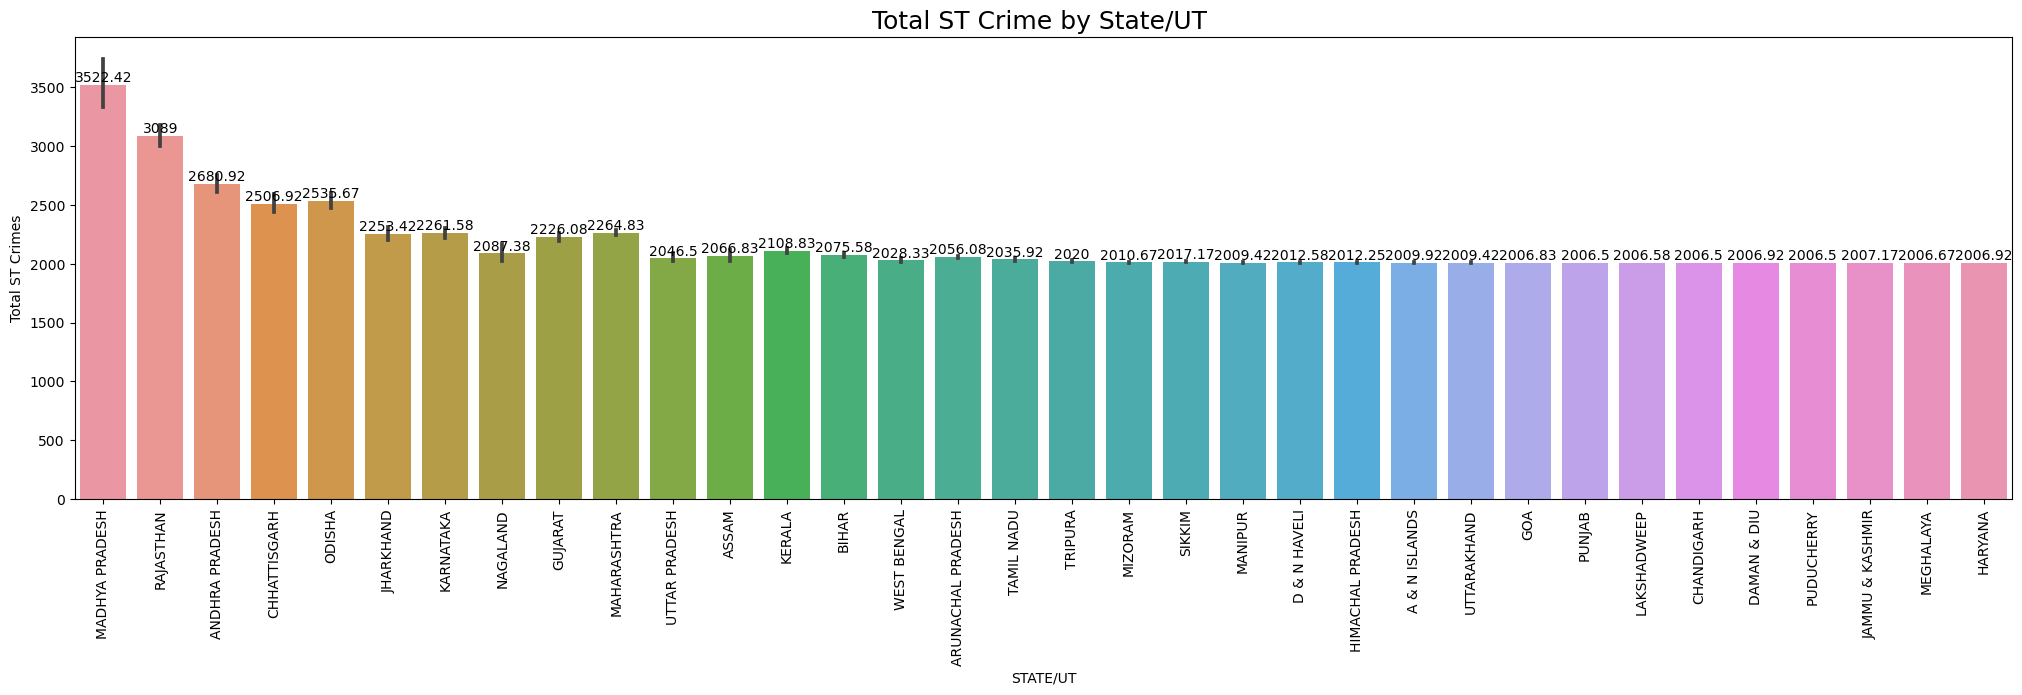

In [14]:
sort_st=df3.sort_values(by='Total ST Crimes', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Total ST Crimes')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total ST Crime by State/UT ', fontsize=18)
plt.show()

- Madhay Pradesh has the highest total ST crimes, followed by Rajasthan and  Andhra Pradesh.

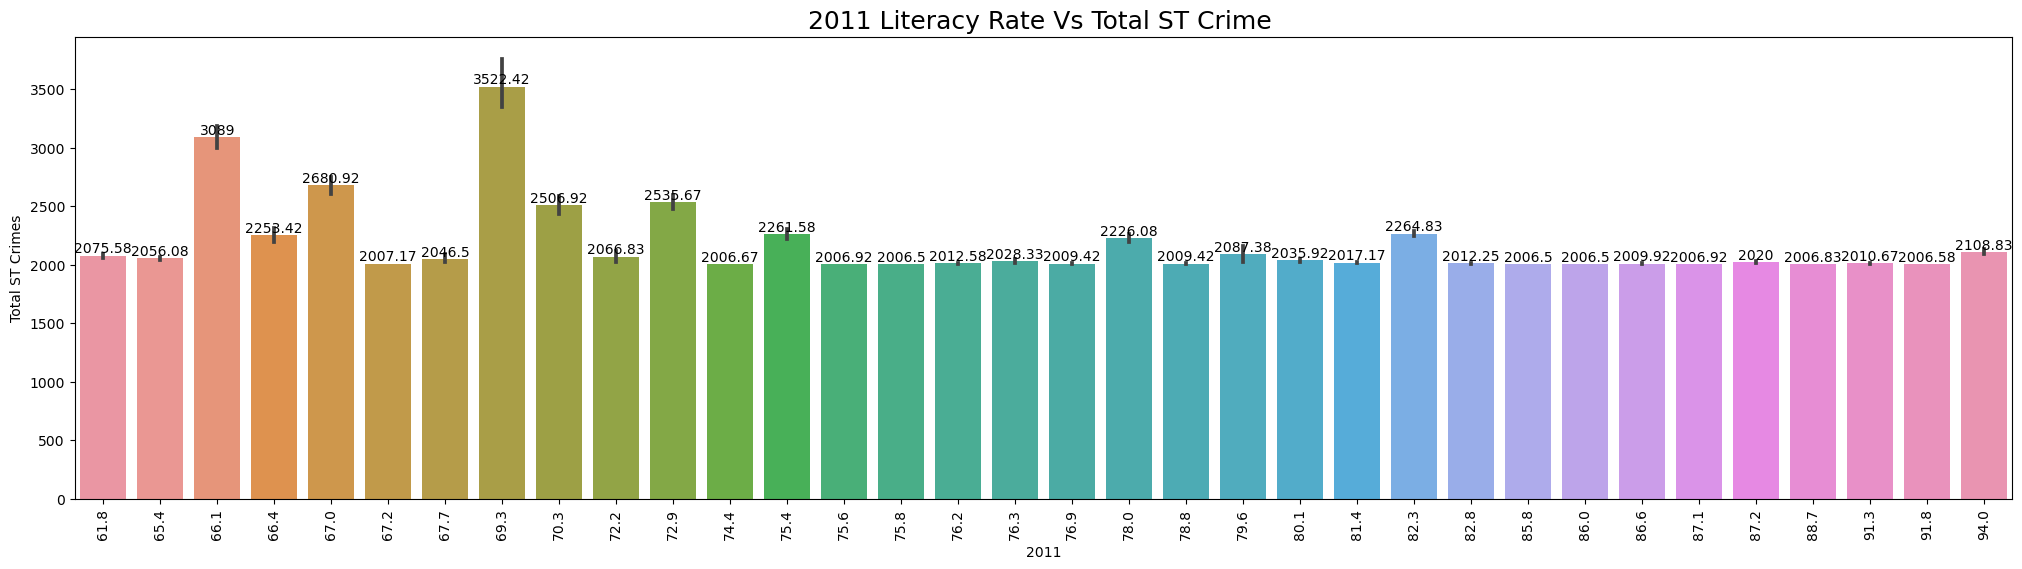

In [150]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=df3, x='2011',y='Total ST Crimes')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2011 Literacy Rate Vs Total ST Crime ', fontsize=18)
plt.show()

- States with literacy rates around 69.3% have the highest ST crime rate (3522.42).
- Other notable high crime rates include literacy rates at 66.1% (3089), 72.9% (2536.67), and 67.7% (2689.92).
- Several states with literacy rates around 61.8%, 75.4%, 76.2%, 86.0%, and 94.0% report the lowest ST crime rates (2006.67).

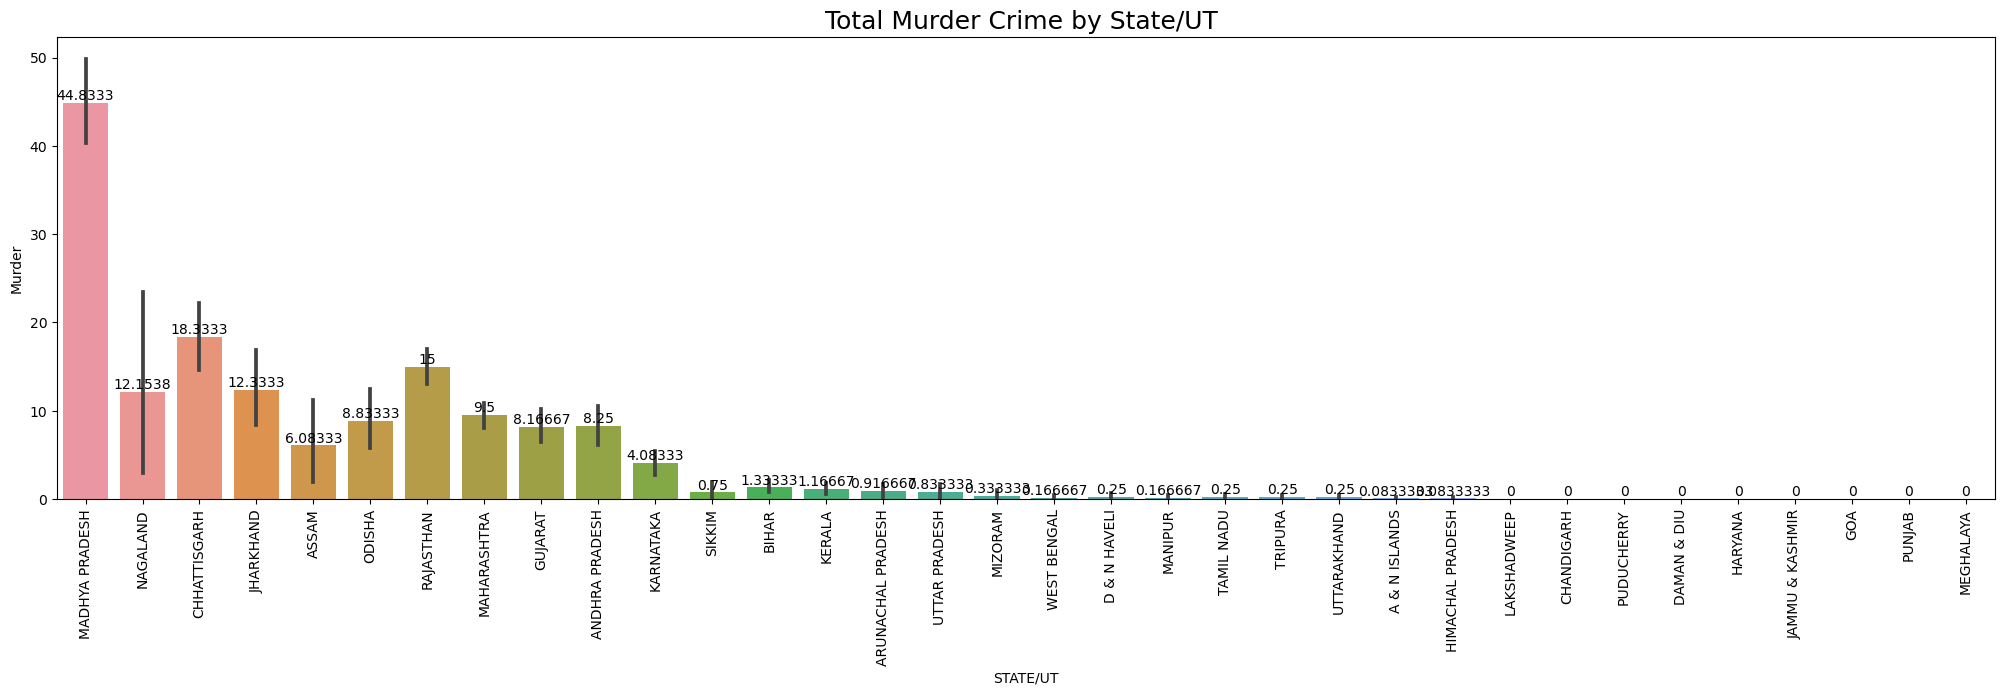

In [18]:
sort_st=df3.sort_values(by='Murder', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Murder')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Murder Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of murder crime as compare to any other state

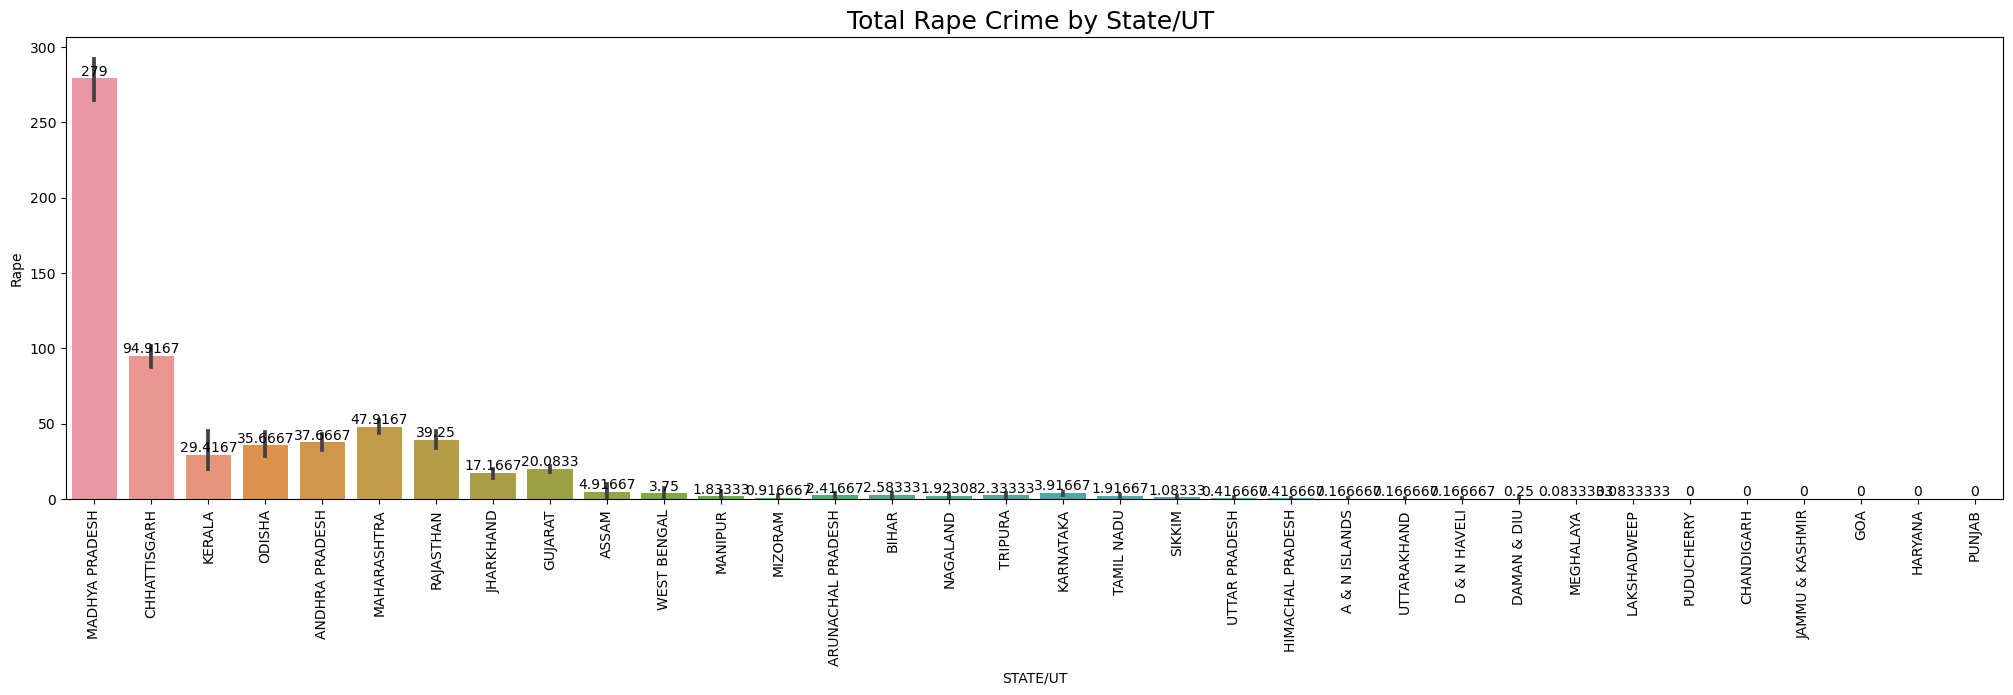

In [19]:
sort_st=df3.sort_values(by='Rape', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Rape')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Rape Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of rape crime as compare to any other state

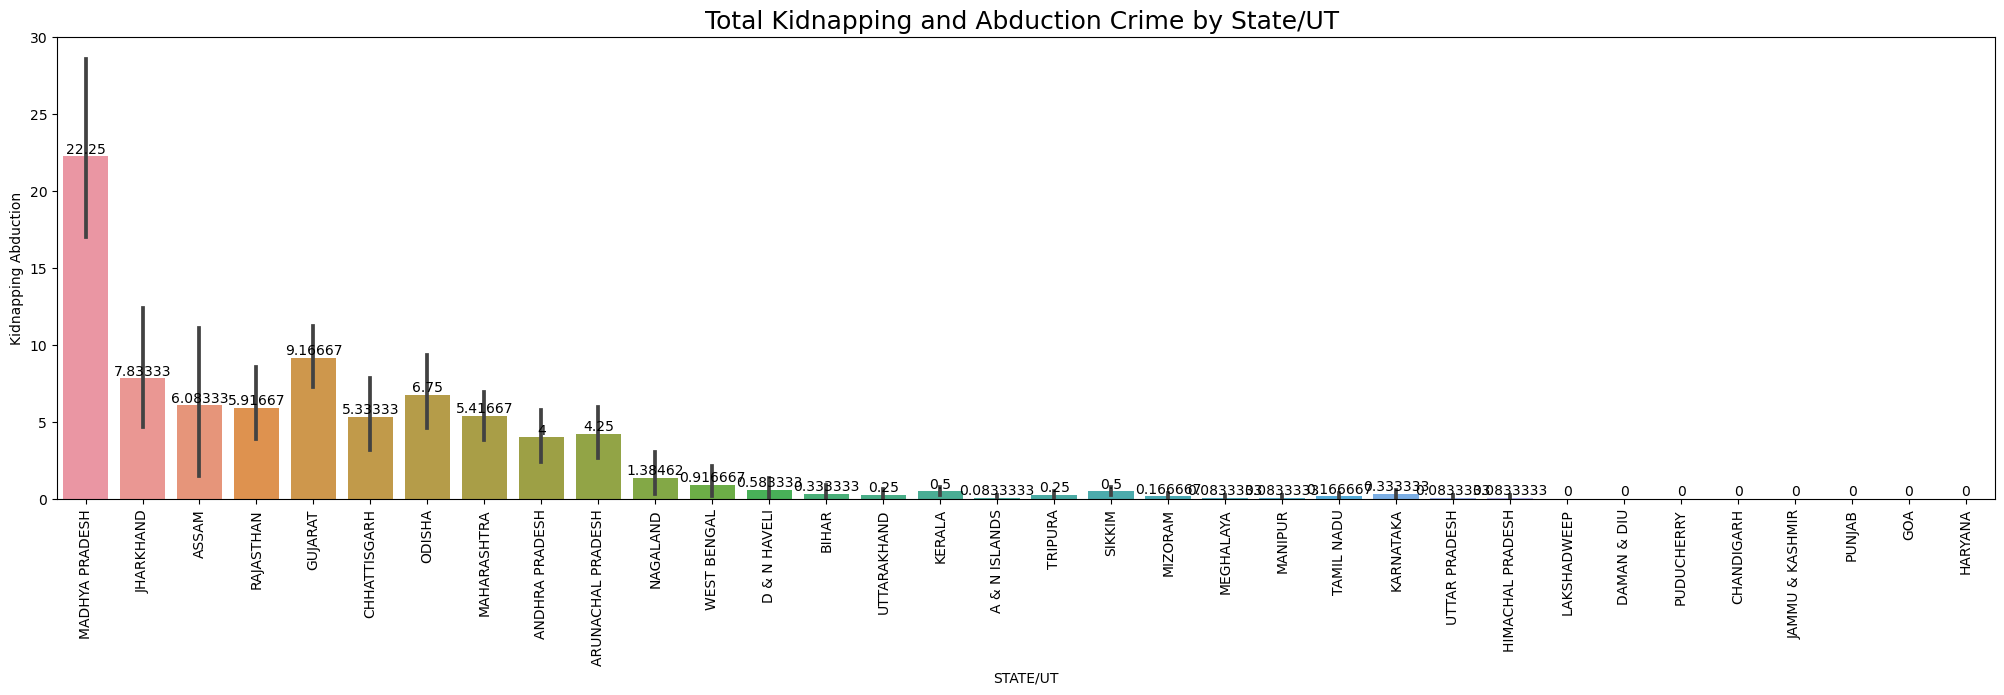

In [21]:
sort_st=df3.sort_values(by='Kidnapping Abduction', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Kidnapping Abduction')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Kidnapping and Abduction Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of Kidnapping and Abduction crime as compare to any other state

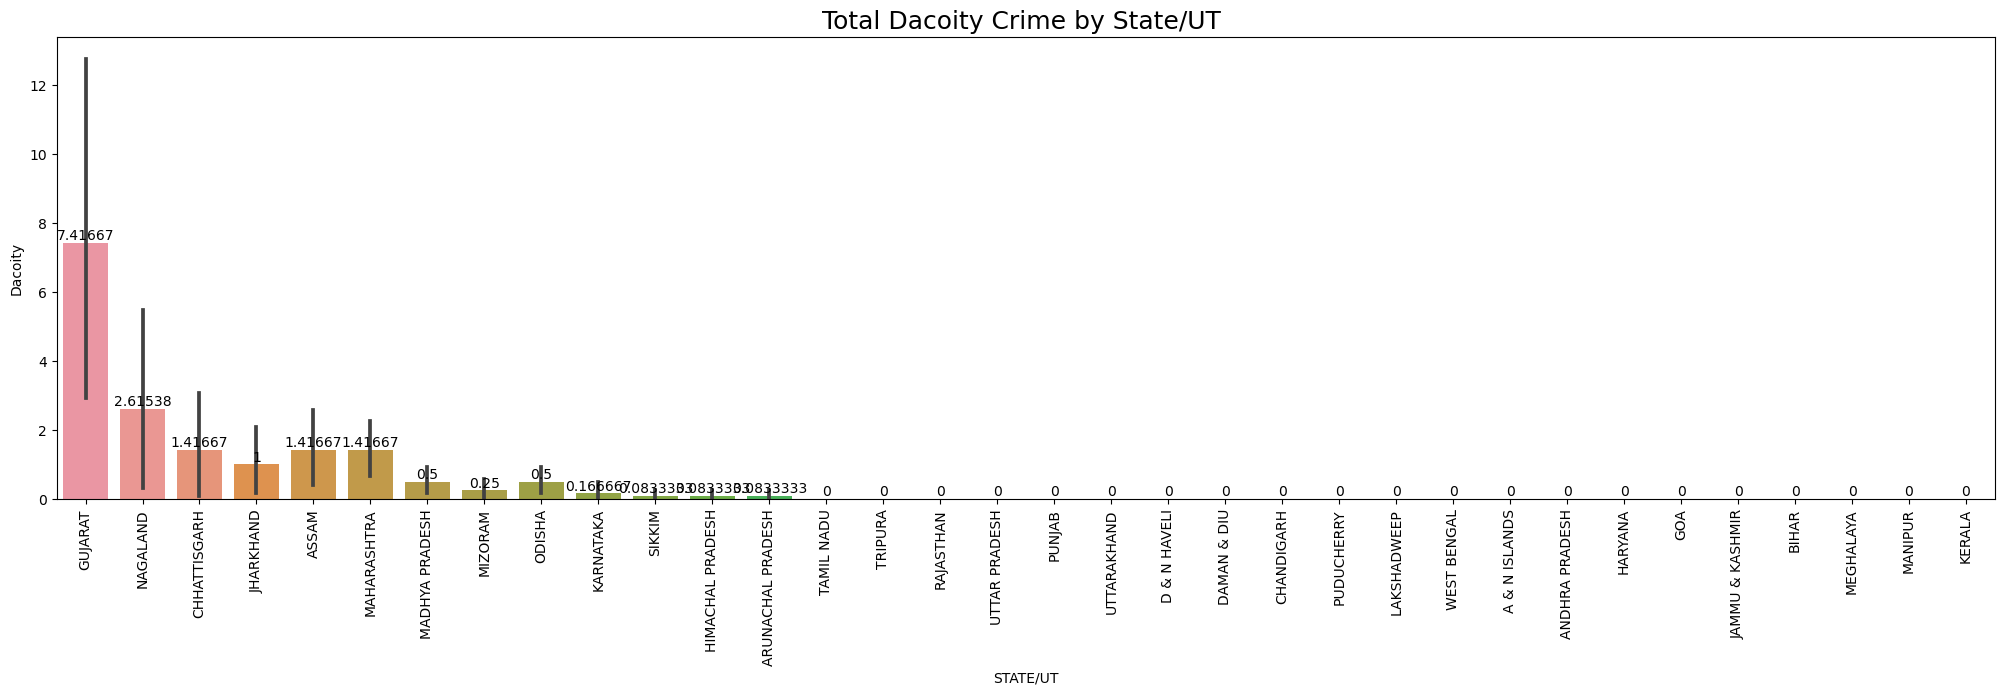

In [23]:
sort_st=df3.sort_values(by='Dacoity', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Dacoity')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Dacoity Crime by State/UT ', fontsize=18)
plt.show()

Gujrat has highest number of dacoity crime as compare to any other state

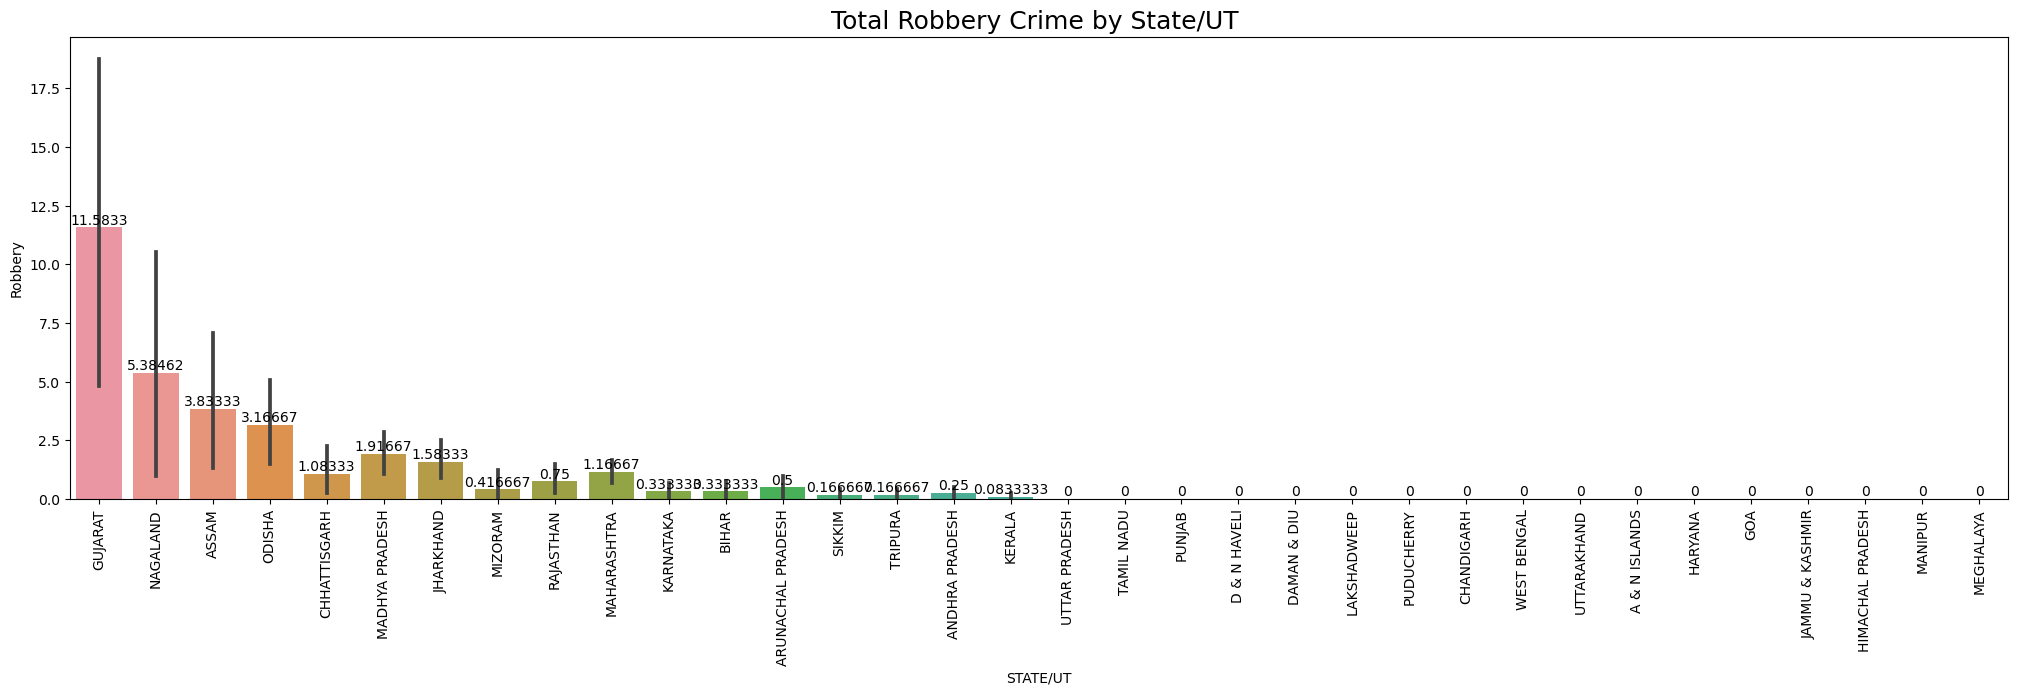

In [24]:
sort_st=df3.sort_values(by='Robbery', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Robbery')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Robbery Crime by State/UT ', fontsize=18)
plt.show()

Gujrat Pradesh has highest number of robbery crime as compare to any other state

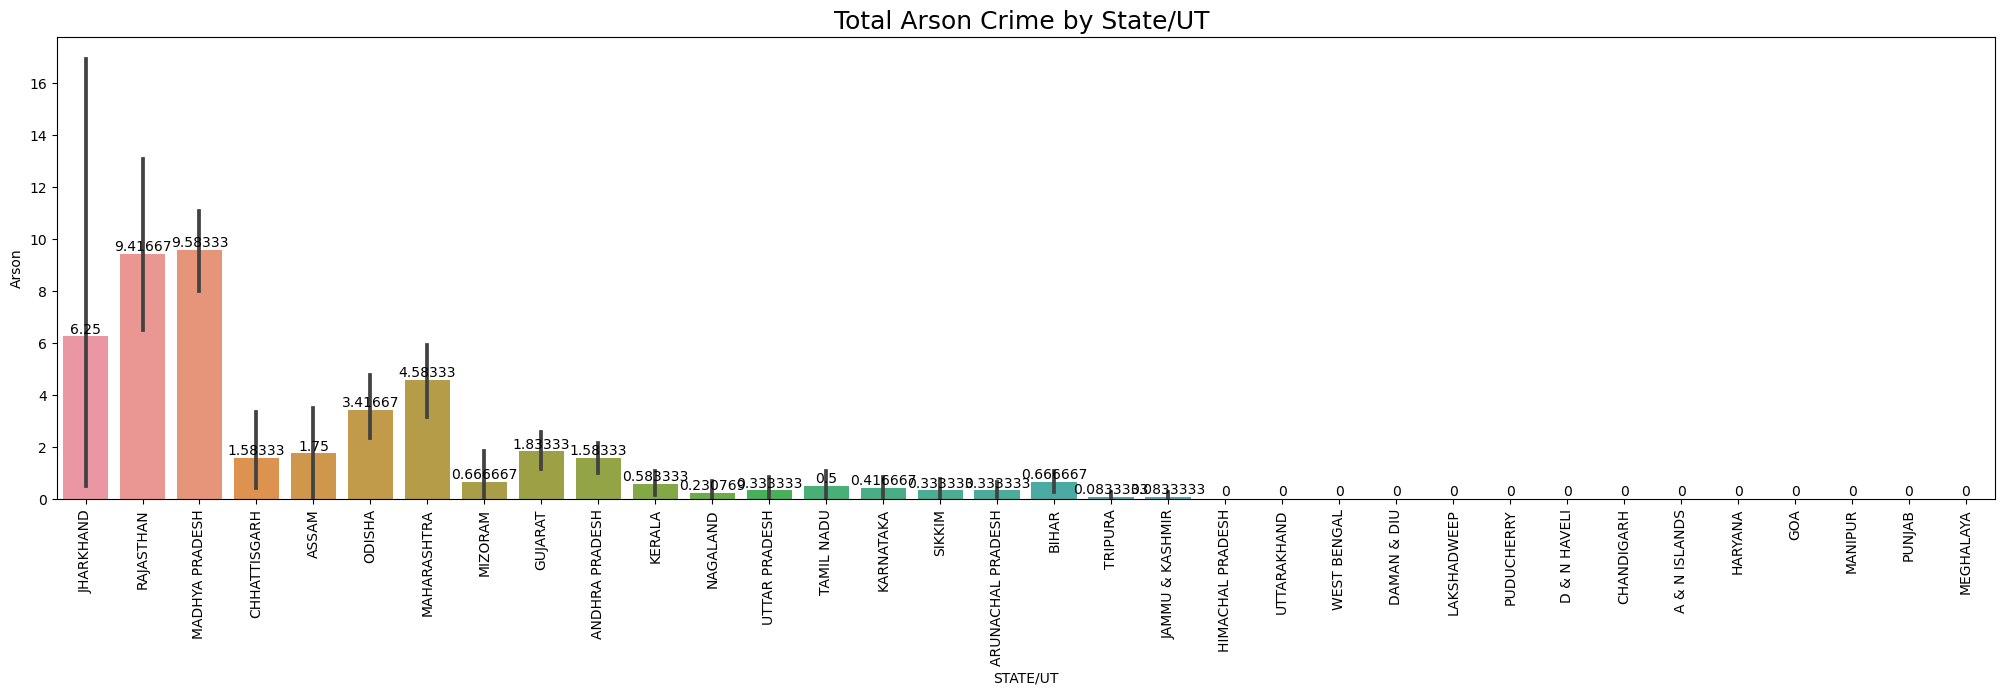

In [25]:
sort_st=df3.sort_values(by='Arson', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Arson')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Arson Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of arson crime as compare to any other state

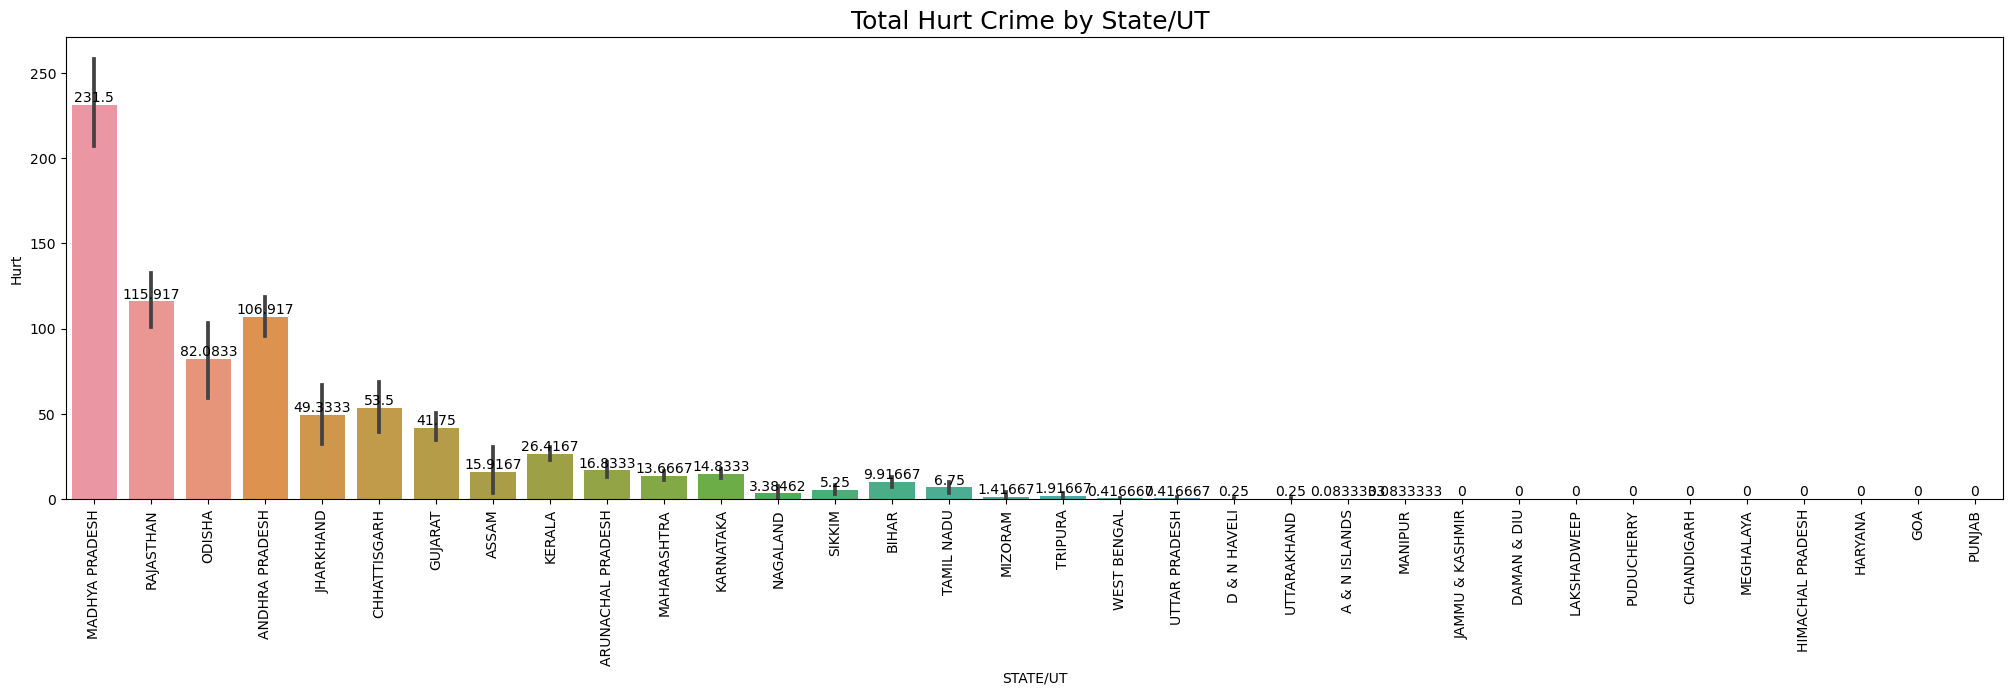

In [26]:
sort_st=df3.sort_values(by='Hurt', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Hurt')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Hurt Crime by State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of hurt crime as compare to any other state

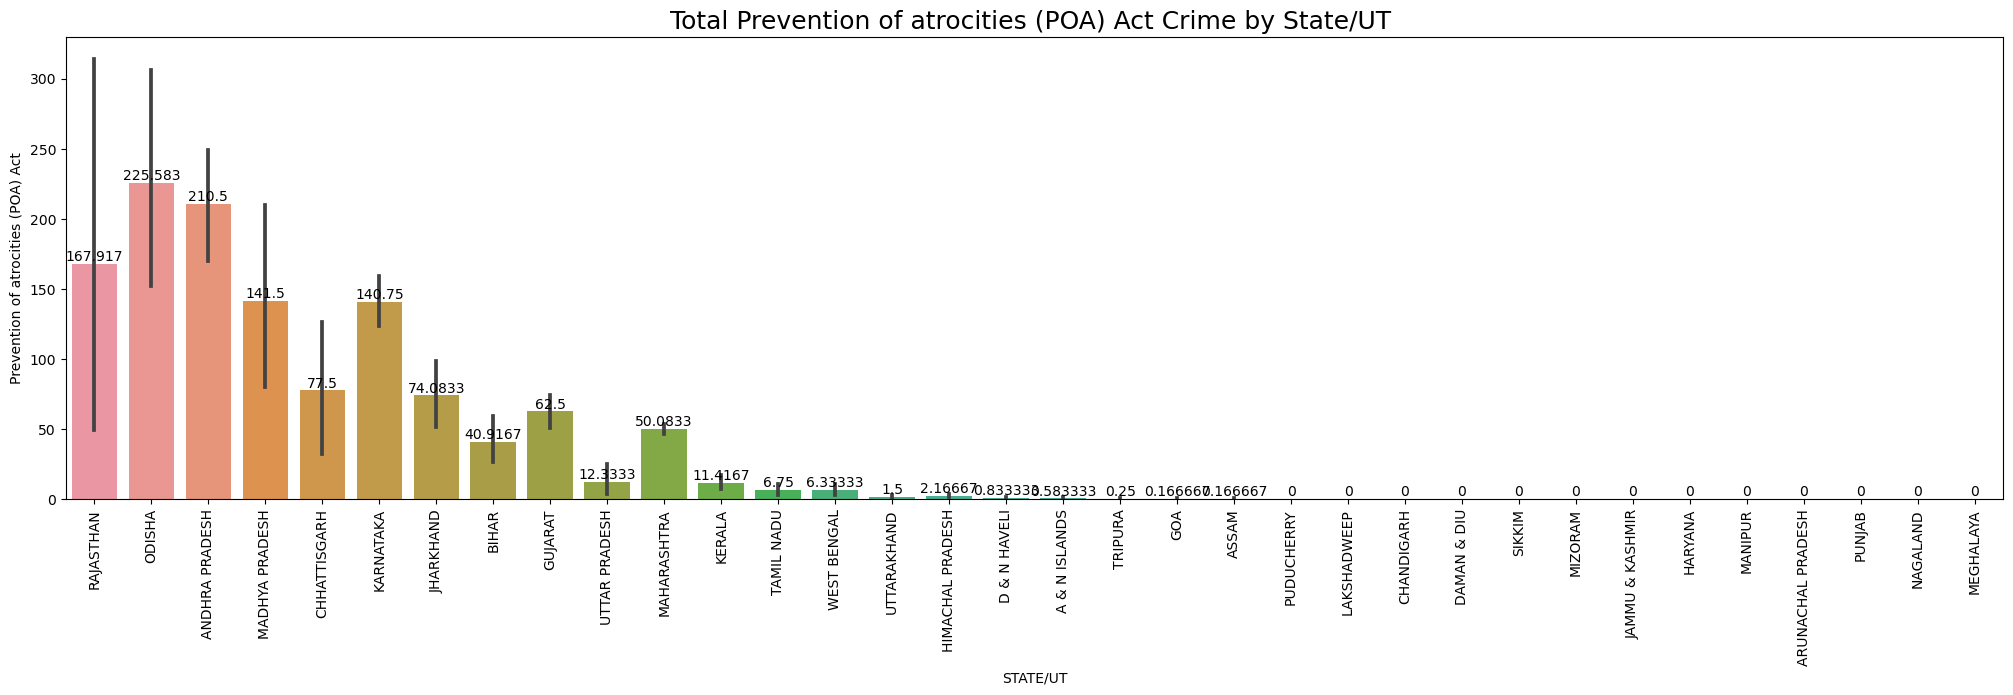

In [27]:
sort_st=df3.sort_values(by='Prevention of atrocities (POA) Act', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_st, x='STATE/UT', y='Prevention of atrocities (POA) Act')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Prevention of atrocities (POA) Act Crime by State/UT ', fontsize=18)
plt.show()

Odisa has highest number of POA crime as compare to any other state

## Summary Report on ST Crime Data Analysis in Indian States

### Overview

This report provides an analysis of Scheduled Tribes (ST) crime data across various Indian states, focusing on Madhya Pradesh, which exhibits the highest crime rates in several categories. The report also examines the relationship between literacy rates and ST crime rates.

### Key Findings

#### Crime Rates in Madhya Pradesh
- **Murder**: Highest in Madhya Pradesh
- **Rape**: Highest in Madhya Pradesh
- **Kidnapping**: Highest in Madhya Pradesh
- **Dacoity**: Highest in Gujarat
- **Robbery**: Highest in Gujarat
- **Arson**: Highest in Madhya Pradesh
- **Hurt**: Highest in Madhya Pradesh

#### Literacy and Crime Rates
- **Madhya Pradesh**: Literacy rate of 69.3%, associated with the highest ST crime rate of 3522.42.
- **Other States with High ST Crime Rates**:
  - Literacy rate of 66.1% with a crime rate of 3089.
  - Literacy rate of 72.9% with a crime rate of 2536.67.
  - Literacy rate of 67.7% with a crime rate of 2689.92.
- **States with Low ST Crime Rates**:
  - Literacy rates around 61.8%, 75.4%, 76.2%, 86.0%, and 94.0%, reporting the lowest ST crime rates (2006.67).

### Analysis
- **Madhya Pradesh**: Dominates in several crime categories including murder, rape, kidnapping, arson, and hurt crimes, highlighting a significant issue that needs to be addressed.
- **Literacy Correlation**: States with lower literacy rates, such as Madhya Pradesh at 69.3%, tend to have higher ST crime rates. Conversely, states with higher literacy rates, such as those around 86.0% to 94.0%, show significantly lower ST crime rates.

### Conclusion
The data reveals a strong correlation between lower literacy rates and higher ST crime rates. Efforts to improve literacy in states like Madhya Pradesh could potentially lead to a reduction in crime rates. Addressing educational deficiencies may be a key strategy in mitigating crime among the Scheduled Tribes population.

### We will analysing children crime data

In [28]:
children_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\03_District_wise_crimes_committed_against_children_2001_2012.csv',encoding='latin1')

In [29]:
children_crime_df.shape

(9015, 15)

In [30]:
for i in children_crime_df.columns:
    print(i,children_crime_df[i].unique(),'\n')

STATE/UT ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY'] 

DISTRICT ['ADILABAD' 'ANANTAPUR' 'CHITTOOR' 'CUDDAPAH' 'EAST GODAVARI'
 'GUNTAKAL RLY.' 'GUNTUR' 'HYDERABAD CITY' 'KARIMNAGAR' 'KHAMMAM'
 'KRISHNA' 'KURNOOL' 'MAHABOOBNAGAR' 'MEDAK' 'NALGONDA' 'NELLORE'
 'NIZAMABAD' 'PRAKASHAM' 'RANGA REDDY' 'SECUNDERABAD RLY.' 'SRIKAKULAM'
 'VIJAYAWADA' 'VIJAYAWADA RLY.' 'VISAKHA RURAL' 'VISAKHAPATNAM'
 'VIZIANAGARAM' 'WARANGAL' 'WEST GODAVARI' 'TOTAL' 'CHANGLANG'
 'DIBANG VALLEY' 'KAMENG EAST' 'KAMENG WEST' 'LOHIT' 'PAPUM PARE'
 'SIANG EAST' 'SIANG UPPER' 'SIANG WEST' 'SUBANSIRI LOWER'
 'SUBANSIRI UPPER

From above we observed that there is 'Total' value present in District columns so We will seletect data only for state/ut wise

In [31]:
children_total= children_crime_df[children_crime_df['DISTRICT']=='TOTAL']
children_total.head()

STATE/UT DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
28      ANDHRA PRADESH    TOTAL  2001    35.0  84.0                      57.0   
42   ARUNACHAL PRADESH    TOTAL  2001     0.0   0.0                       0.0   
70               ASSAM    TOTAL  2001     0.0   0.0                      18.0   
115              BIHAR    TOTAL  2001     2.0  16.0                      26.0   
137                GOA    TOTAL  2001     1.0  10.0                       6.0   

     Foeticide  Abetment of suicide  Exposure and abandonment  \
28         0.0                  7.0                      22.0   
42         0.0                  0.0                       0.0   
70         0.0                  0.0                       0.0   
115        0.0                  0.0                       1.0   
137        0.0                  0.0                       3.0   

     Procuration of minor girls  Buying of girls for prostitution  \
28                         12.0                               0.0   
42                          0.0                               0.0   
70                          0.0                               0.0   
115                        16.0                               1.0   
137                         2.0                               0.0   

     Selling of girls for prostitution  Prohibition of child marriage act  \
28                                 0.0                                6.0   
42                                 0.0                                0.0   
70                                 0.0                                0.0   
115                                1.0                                2.0   
137                                0.0                                0.0   

     Other Crimes  Total  
28           47.0    270  
42            0.0      0  
70            0.0     18  
115          18.0     83  
137          12.0     34

In [32]:
df4=pd.merge(children_total,lite_surv_df,on='STATE/UT',how='inner')

In [33]:
df4.head()

STATE/UT DISTRICT  Year  Murder   Rape  Kidnapping and Abduction  \
0  ANDHRA PRADESH    TOTAL  2001    35.0   84.0                      57.0   
1  ANDHRA PRADESH    TOTAL  2002    43.0  137.0                      86.0   
2  ANDHRA PRADESH    TOTAL  2003   119.0  383.0                     373.0   
3  ANDHRA PRADESH    TOTAL  2004    71.0  363.0                     396.0   
4  ANDHRA PRADESH    TOTAL  2005    57.0  315.0                     332.0   

   Foeticide  Abetment of suicide  Exposure and abandonment  \
0        0.0                  7.0                      22.0   
1        0.0                 13.0                       5.0   
2        0.0                  3.0                      36.0   
3        0.0                  2.0                      26.0   
4        1.0                  4.0                      99.0   

   Procuration of minor girls  Buying of girls for prostitution  \
0                        12.0                               0.0   
1                         9.0                               1.0   
2                        46.0                               0.0   
3                        60.0                               0.0   
4                        48.0                               9.0   

   Selling of girls for prostitution  Prohibition of child marriage act  \
0                                0.0                                6.0   
1                                0.0                                6.0   
2                                1.0                                4.0   
3                                0.0                                4.0   
4                                2.0                                9.0   

   Other Crimes  Total   2001  2011  
0          47.0    270  60.47  67.0  
1          33.0    333  60.47  67.0  
2         498.0   1463  60.47  67.0  
3         406.0   1328  60.47  67.0  
4          74.0    950  60.47  67.0

In [34]:
df4.shape

(407, 17)

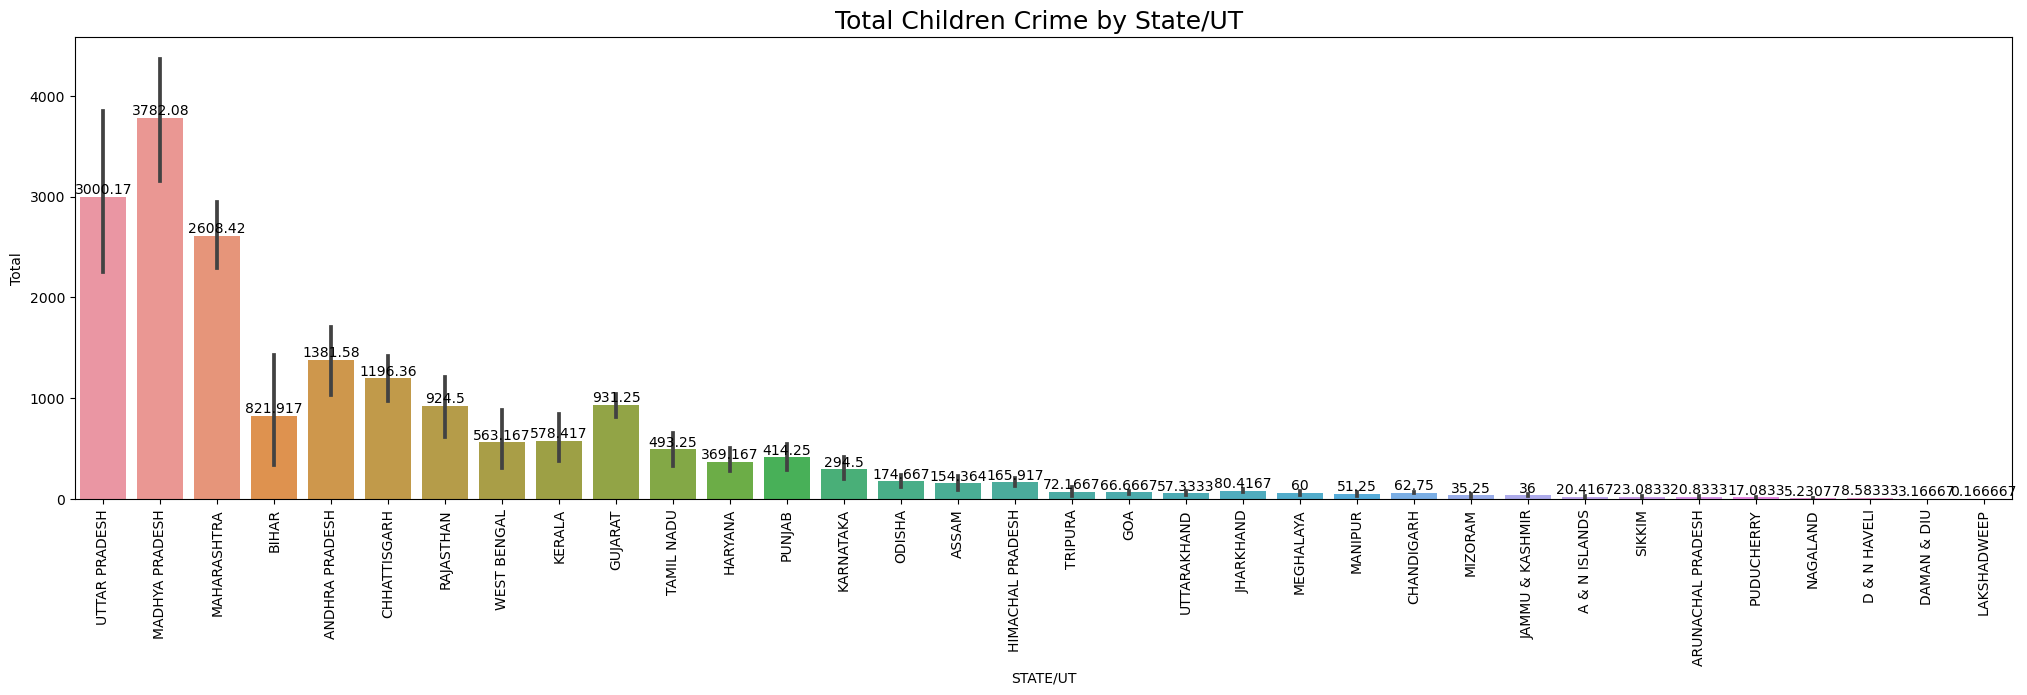

In [35]:
sort_children=df4.sort_values(by='Total', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Total')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Crime by State/UT ', fontsize=18)
plt.show()

- Uttar Pradesh reports the highest total children crime at 4000.17, followed by Madhya Pradesh (3782.08) and Maharashtra (2608.42).
- States like Lakshadweep, Daman & Diu, and Nagaland report the lowest children crime rates, showing values close to zero.
- There is a stark contrast between states with high and low children crime rates, indicating significant regional differences in child crime incidence.

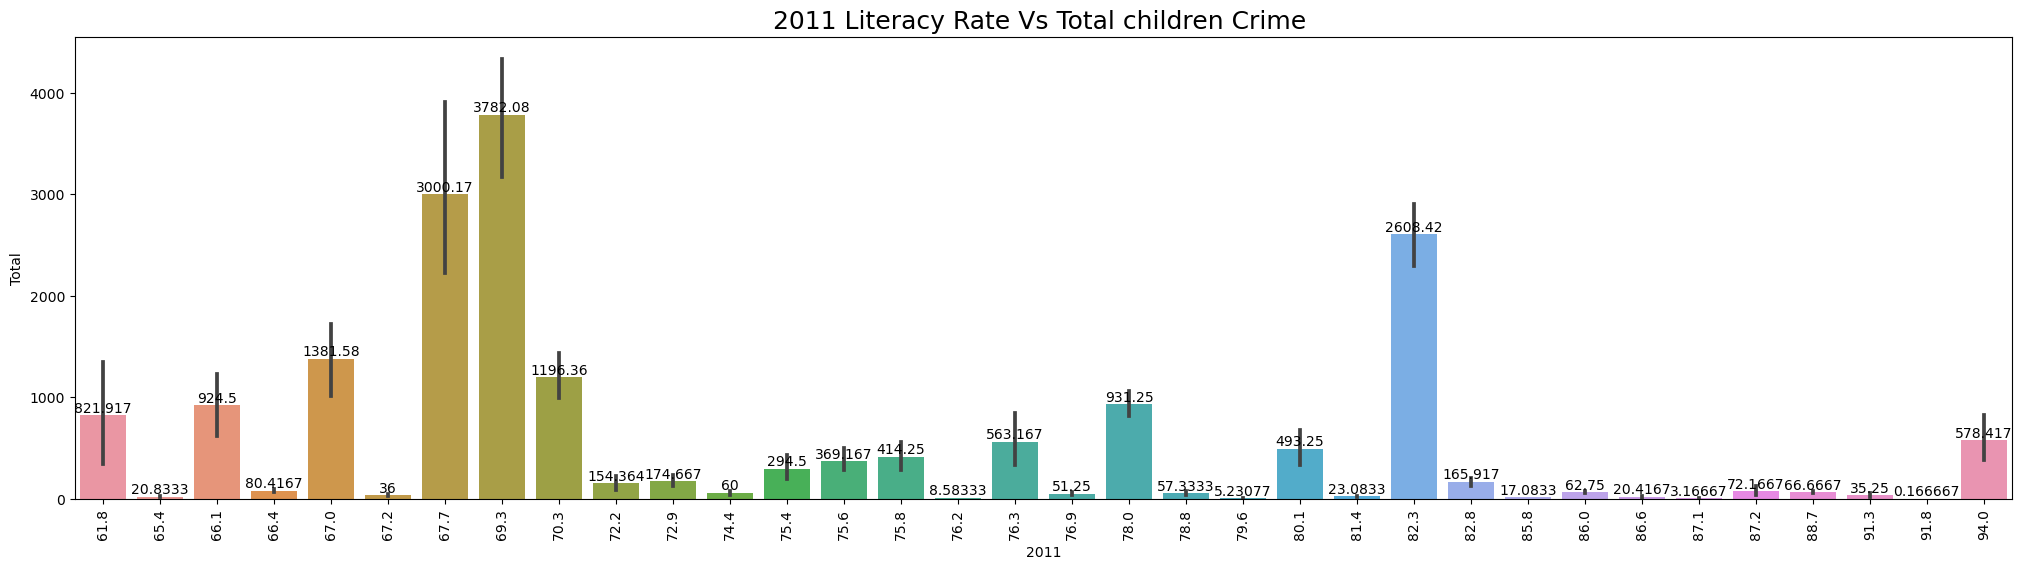

In [36]:
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=df4, x='2011',y='Total')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('2011 Literacy Rate Vs Total children Crime ', fontsize=18)
plt.show()

- States with lower literacy rates (e.g., Uttar Pradesh with 67.2% and Madhya Pradesh with 69.3%) show higher total children crime rates.
- Higher literacy states like Kerala (94%) and Lakshadweep (91.8%) exhibit significantly lower children crime rates.
- There is a negative correlation between literacy rates and children crime rates: as literacy rates increase, children crime rates tend to decrease
- The data illustrates a clear relationship between literacy rates and crime rates among children. States with higher literacy rates tend to have lower children crime rates, while states with lower literacy rates experience higher crime rates among children. This suggests that improving literacy rates could be a crucial factor in reducing crime rates, especially among the younger population. States like Uttar Pradesh and Madhya Pradesh, which have both high crime rates and relatively low literacy rates, could benefit significantly from focused educational interventions to address this issue.

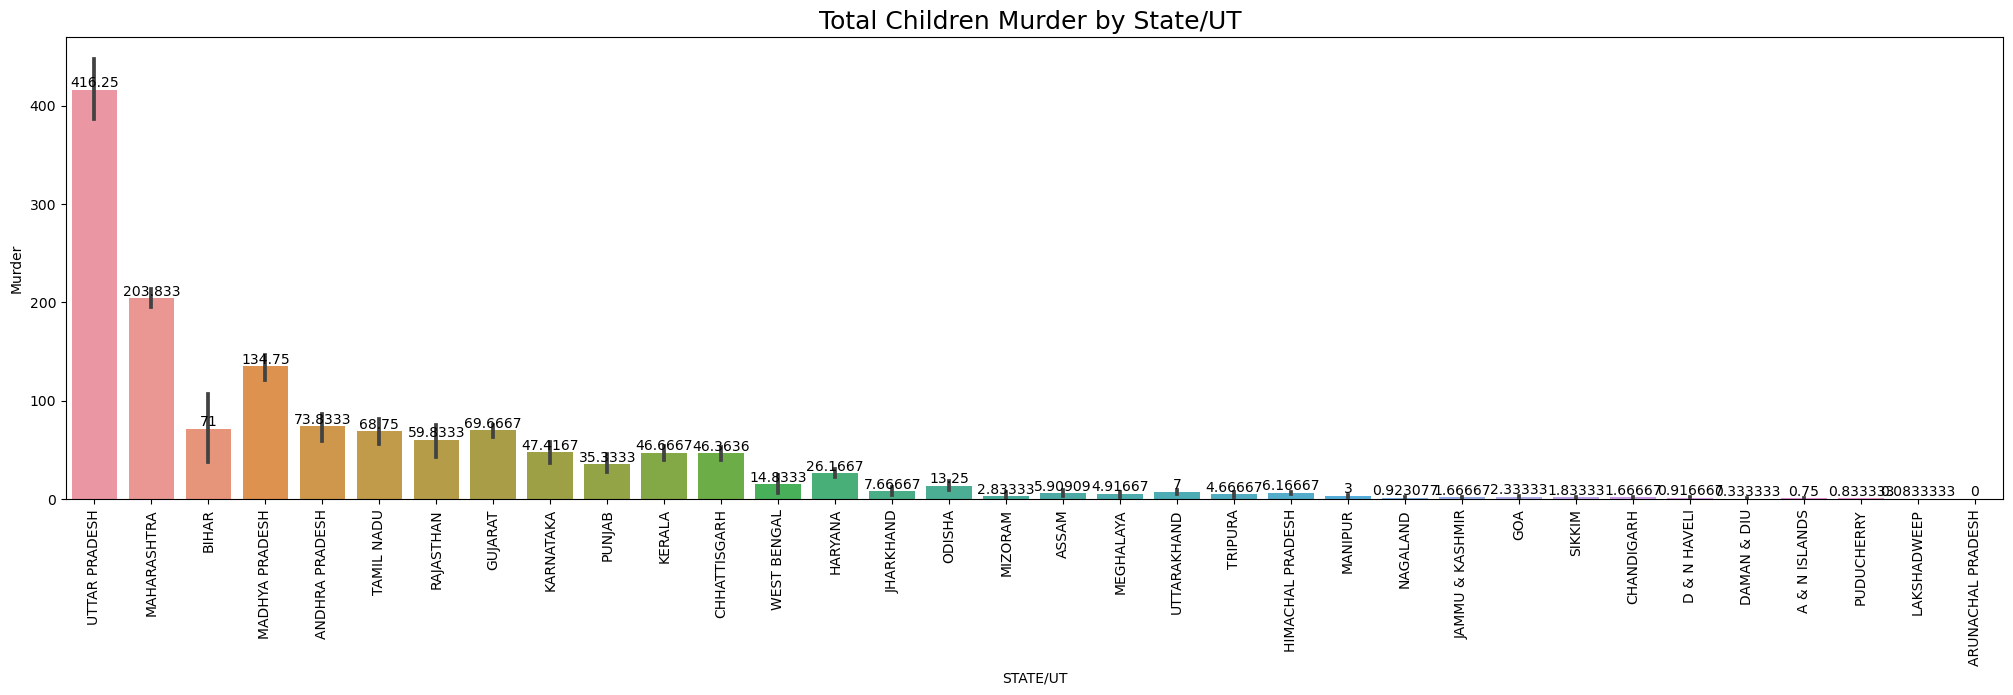

In [38]:
sort_children=df4.sort_values(by='Murder', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Murder')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Murder by State/UT ', fontsize=18)
plt.show()

Uttar Pradesh has highest number of murder crime as compare to any other state

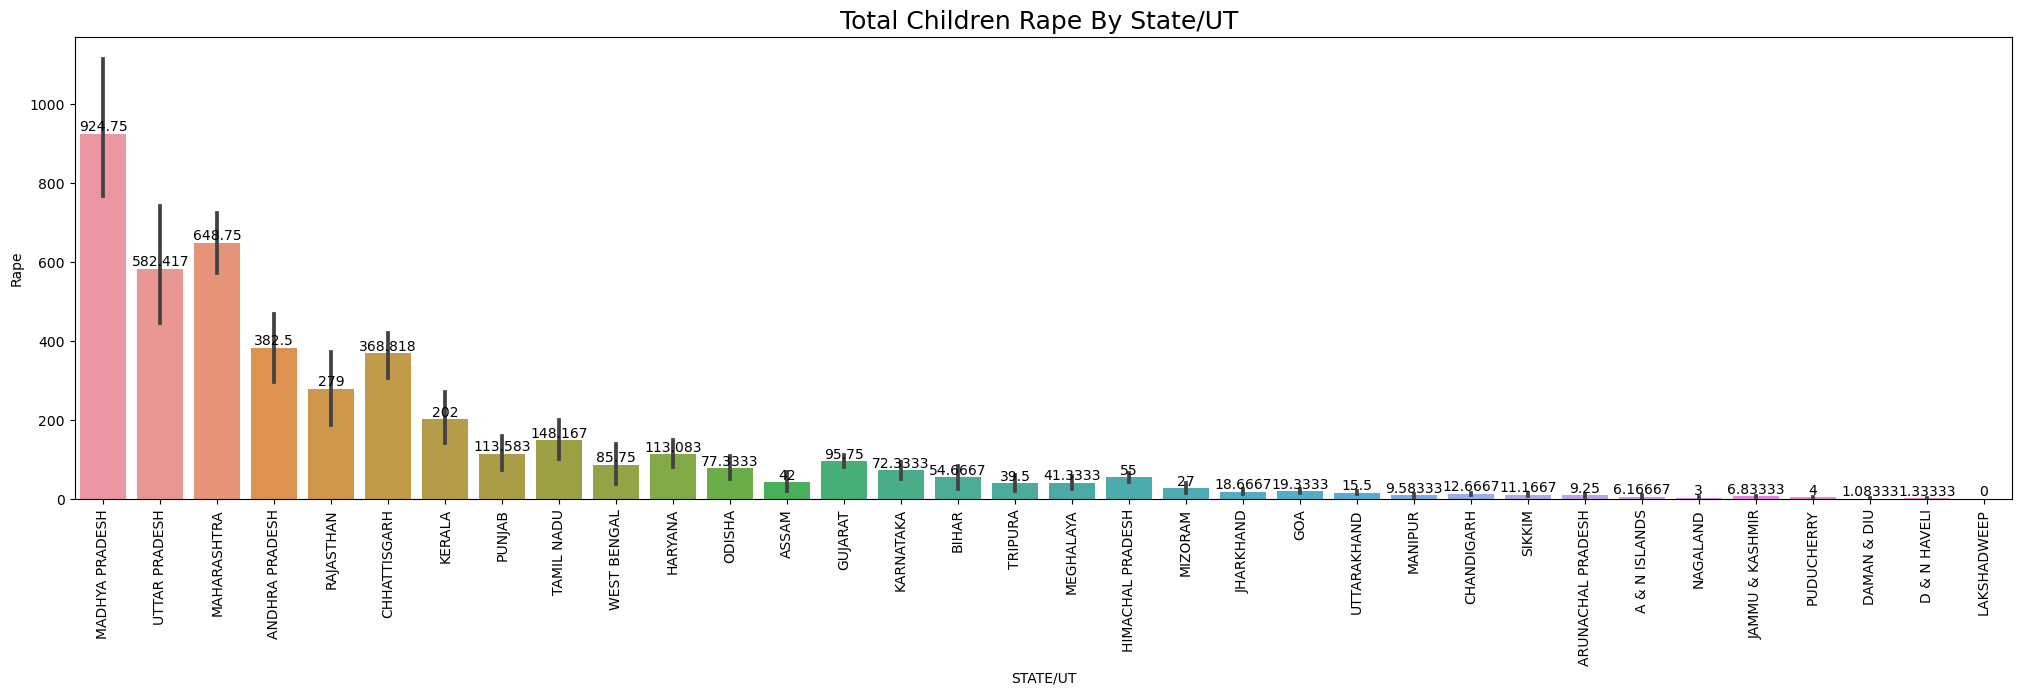

In [39]:
sort_children=df4.sort_values(by='Rape', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Rape')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Rape By State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of rape crime as compare to any other state

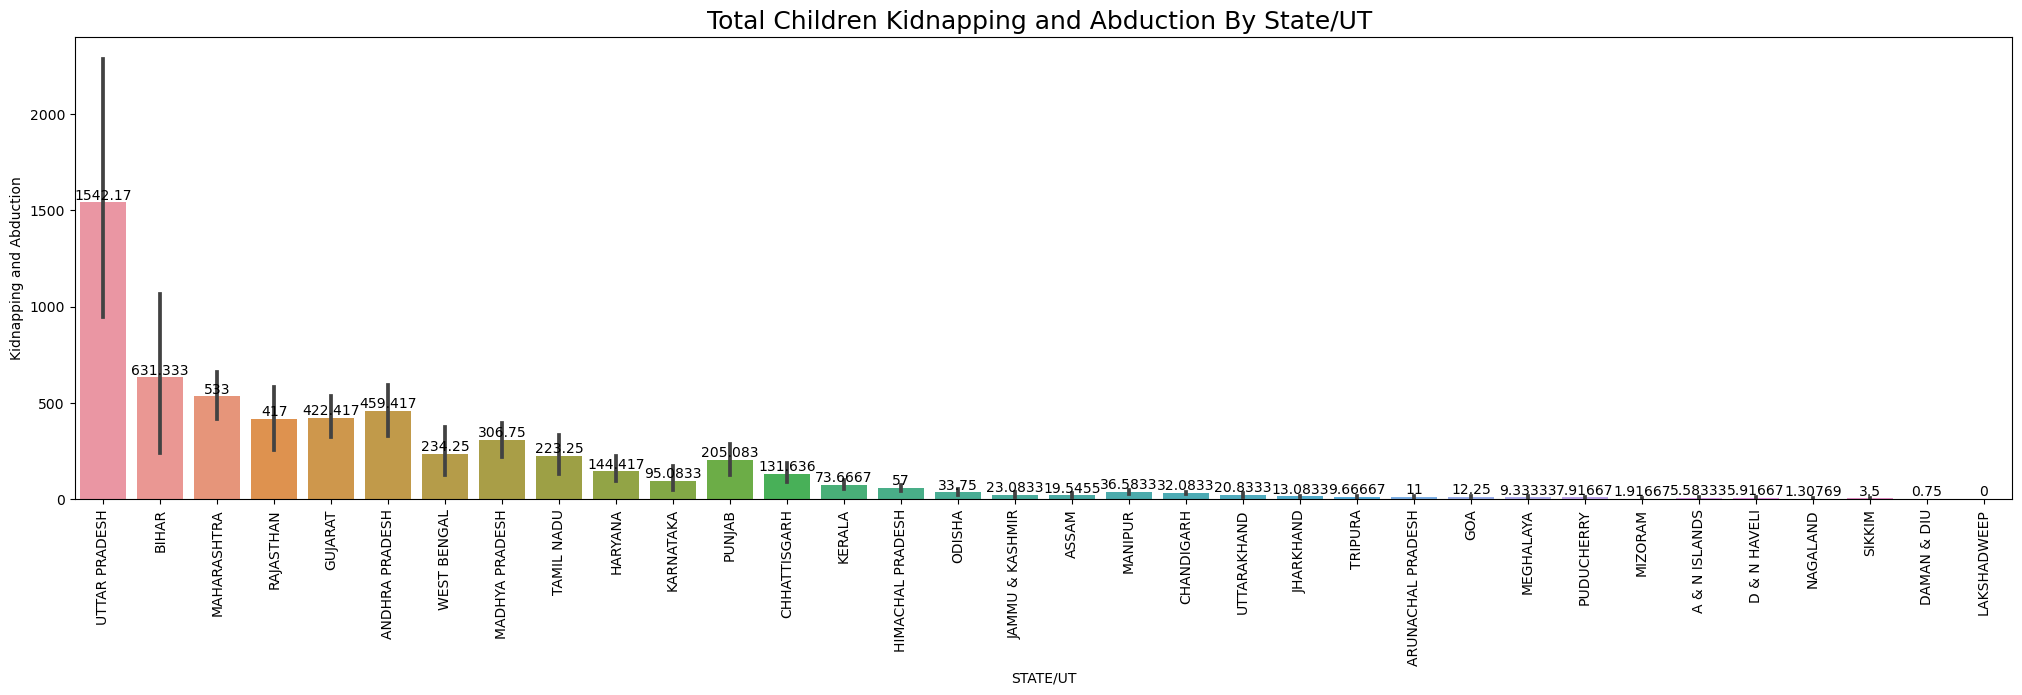

In [40]:
sort_children=df4.sort_values(by='Kidnapping and Abduction', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Kidnapping and Abduction')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Kidnapping and Abduction By State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of Kidnapping and Abduction crime as compare to any other state

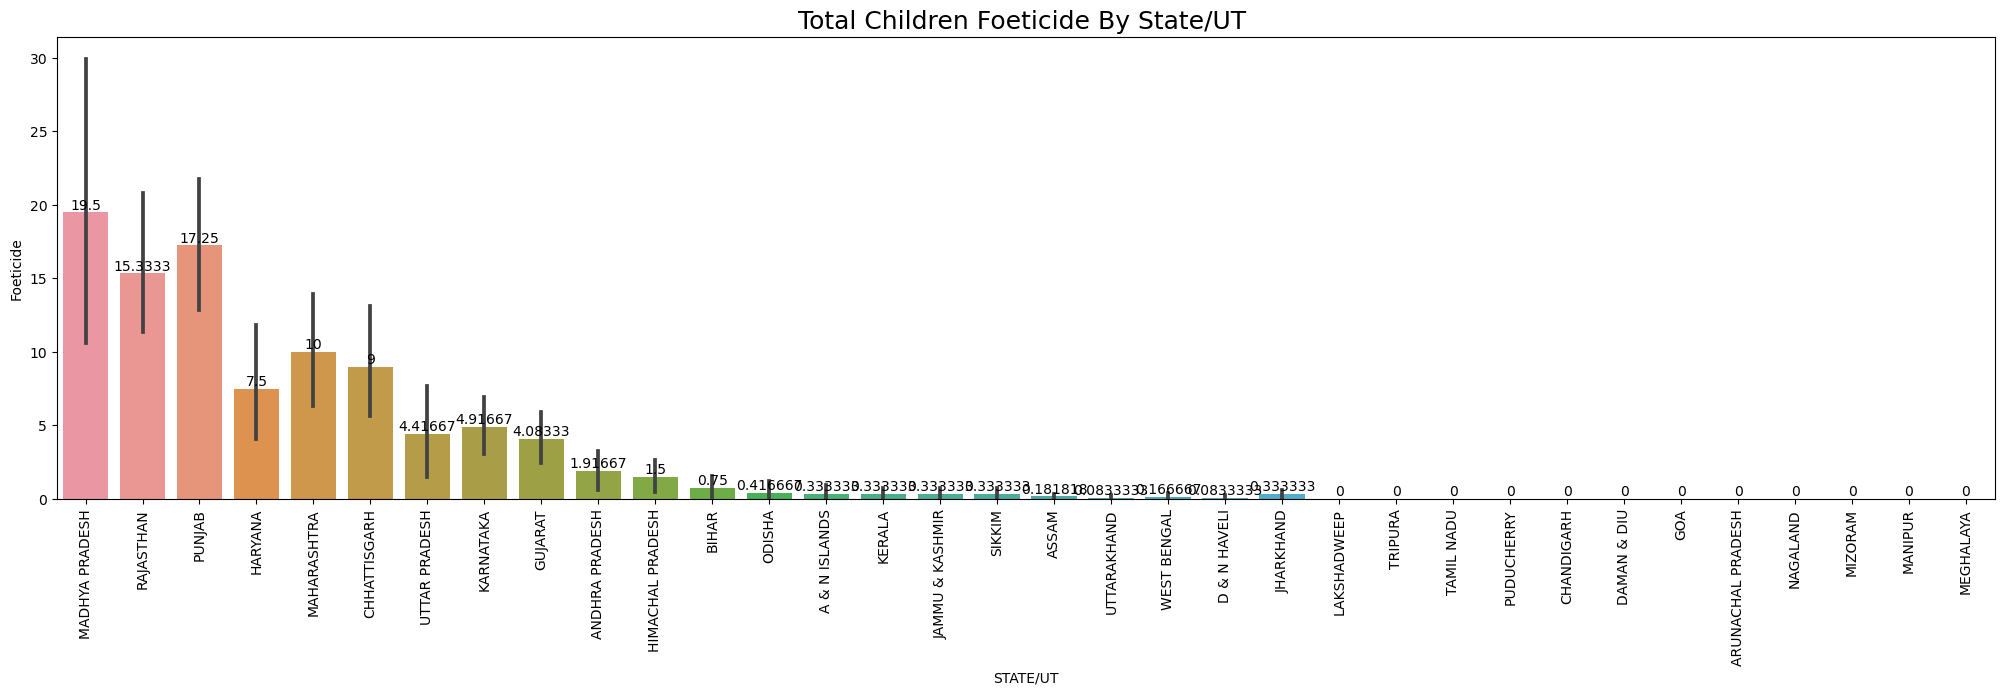

In [41]:
sort_children=df4.sort_values(by='Foeticide', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Foeticide')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Foeticide By State/UT ', fontsize=18)
plt.show()

Madhya Pradesh has highest number of Foeticide crime as compare to any other state

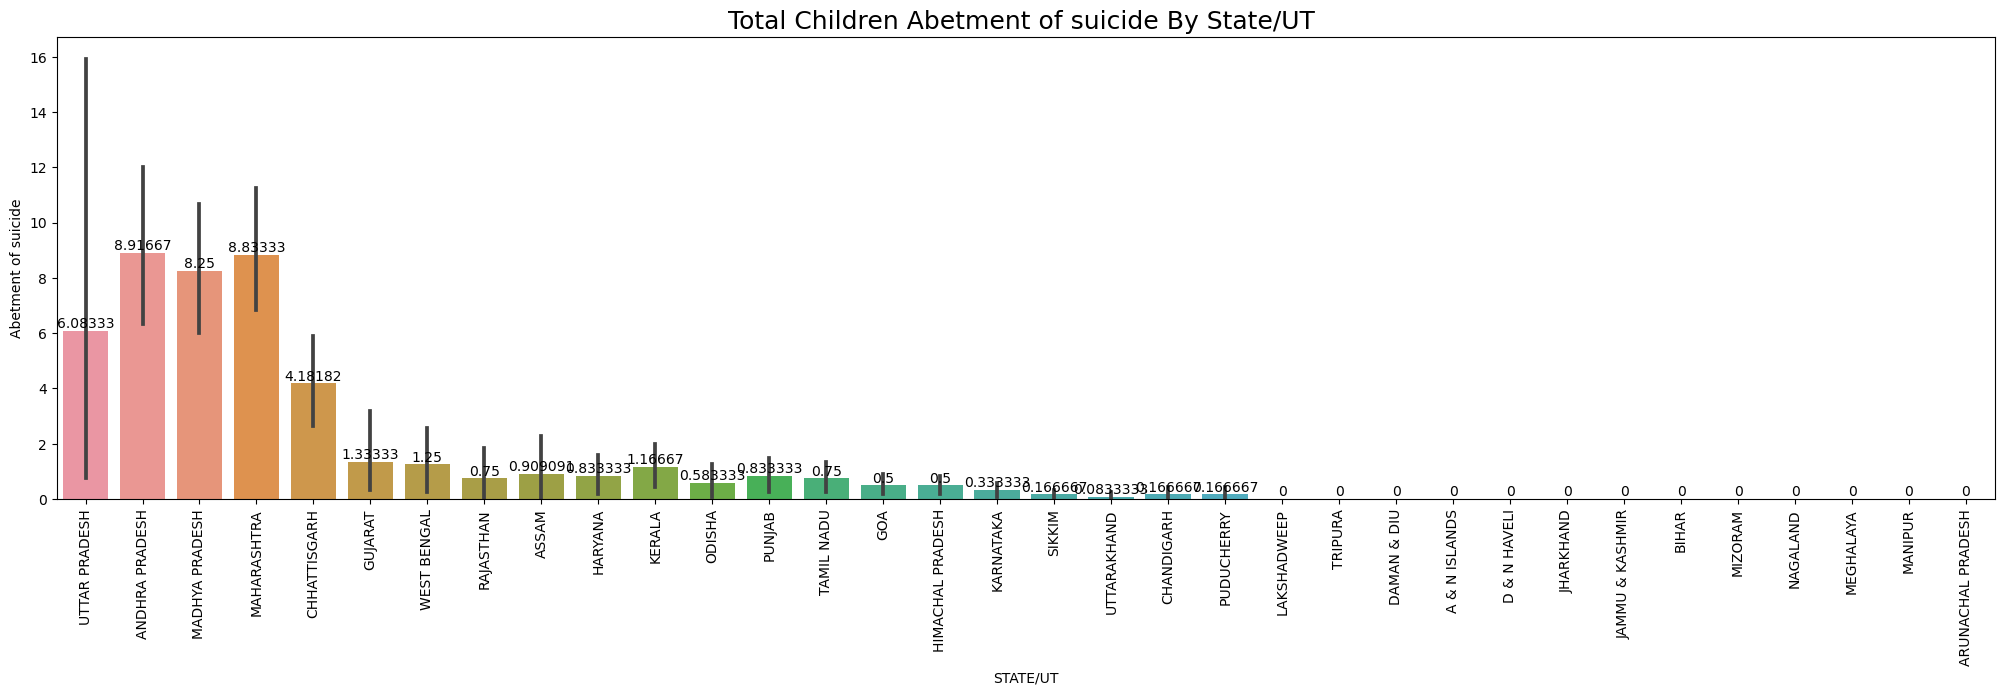

In [42]:
sort_children=df4.sort_values(by='Abetment of suicide', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Abetment of suicide')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Abetment of suicide By State/UT ', fontsize=18)
plt.show()

Andhra Pradesh has highest number of abetment of suicide crime as compare to any other state

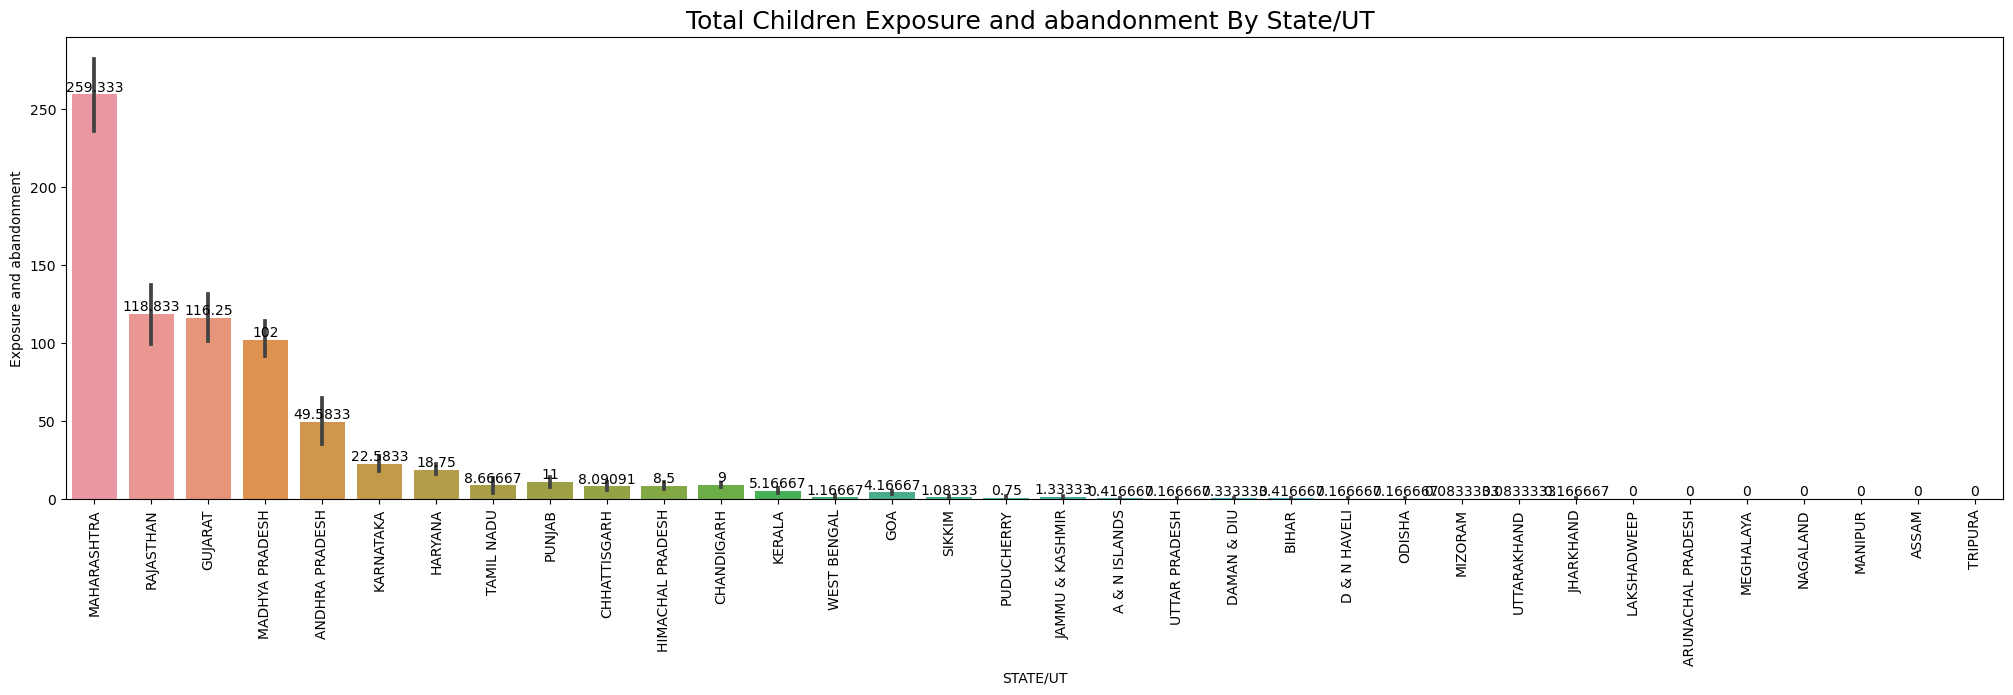

In [43]:
sort_children=df4.sort_values(by='Exposure and abandonment', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Exposure and abandonment')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Exposure and abandonment By State/UT ', fontsize=18)
plt.show()

Maharashtra has highest number of Exposure and abandonment crime as compare to any other state

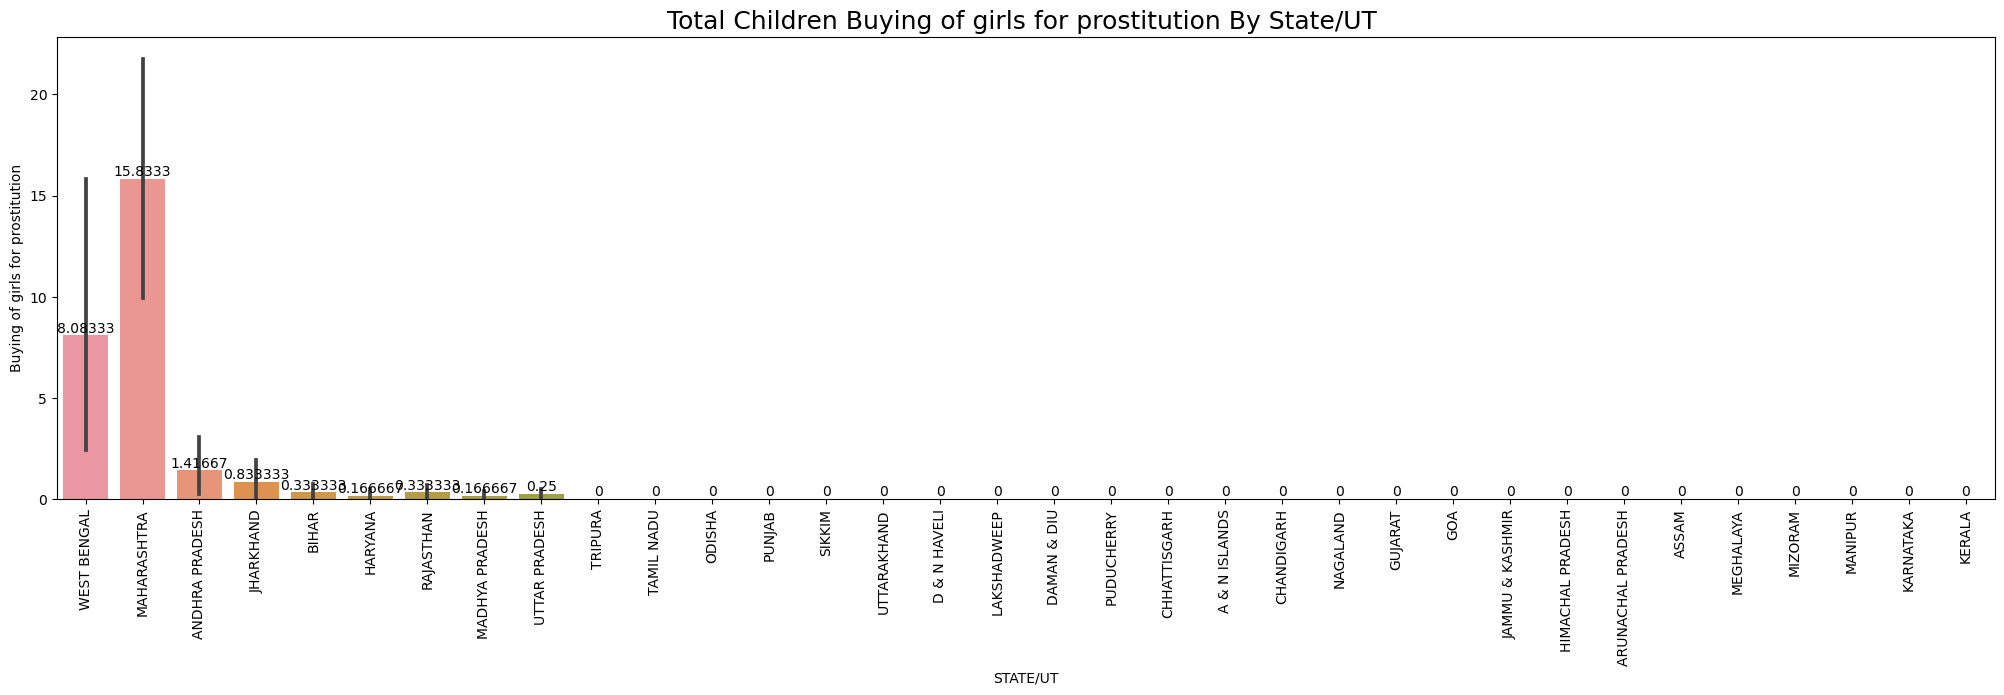

In [44]:
sort_children=df4.sort_values(by='Buying of girls for prostitution', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Buying of girls for prostitution')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Buying of girls for prostitution By State/UT ', fontsize=18)
plt.show()

Maharashtra has highest number of Buying of girls for prostitution crime as compare to any other state

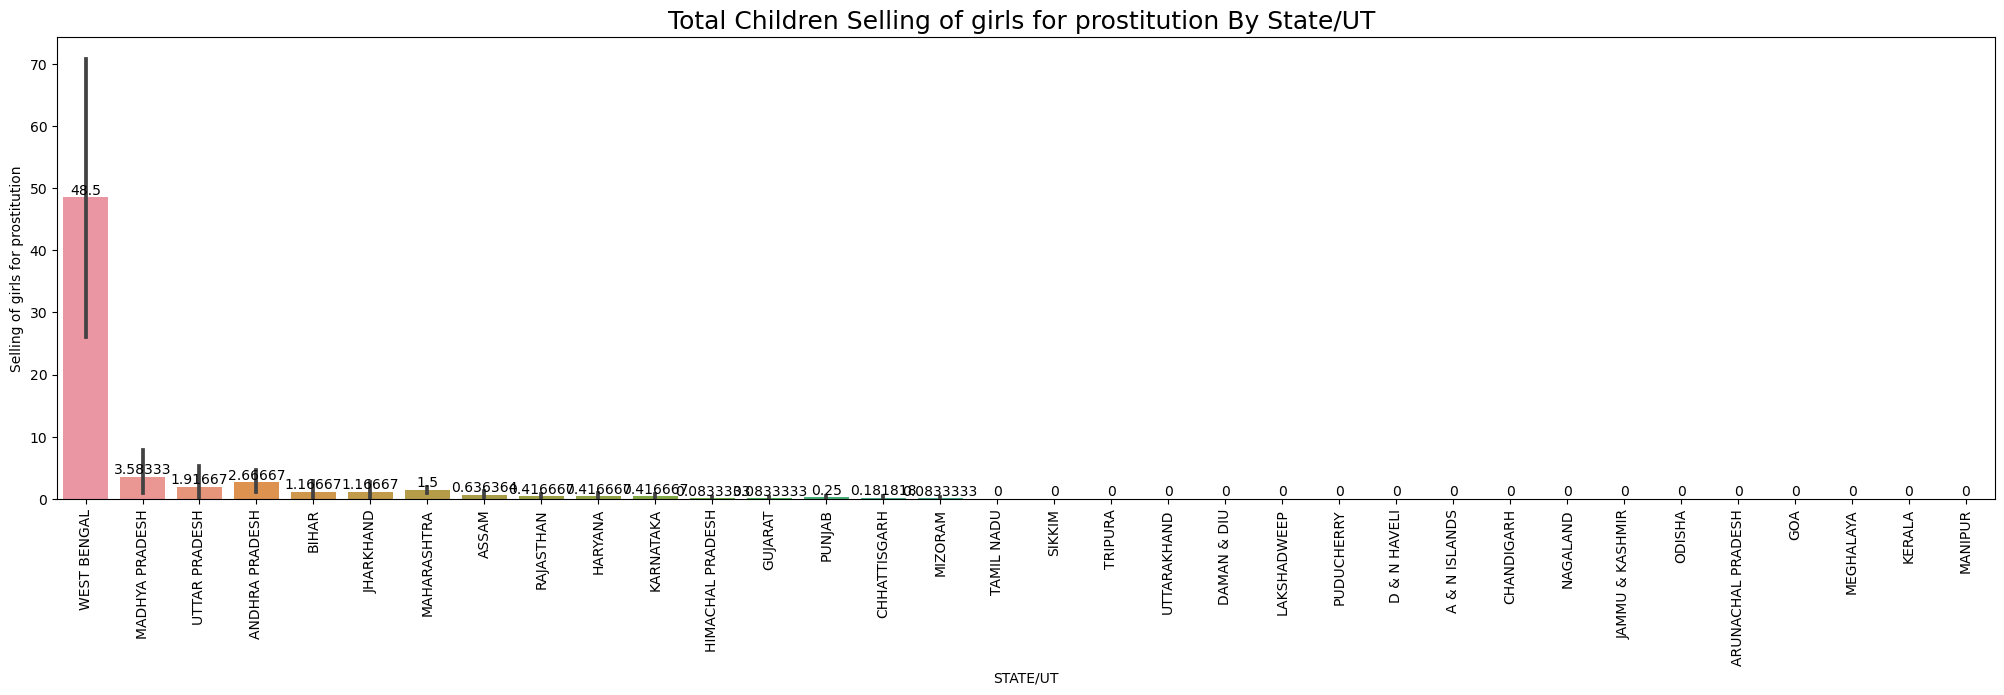

In [45]:
sort_children=df4.sort_values(by='Selling of girls for prostitution', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_children, x='STATE/UT', y='Selling of girls for prostitution')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Children Selling of girls for prostitution By State/UT ', fontsize=18)
plt.show()

West Bengal has highest number of Selling of girls for prostitution crime as compare to any other state

## Summary Report on Children Crime Data (2001-2011)

#### State-wise Highest Crime Categories:
- **Uttar Pradesh**: 
  - Highest number of murder crimes.
  - Highest total SC crimes (8378.25), with a literacy rate of 67.2% in 2011 (up from 56.27% in 2001).
- **Madhya Pradesh**:
  - Highest number of rape crimes.
  - Highest number of kidnapping and abduction crimes.
  - Highest number of foeticide crimes.
  - Total SC crimes: 6153.33, with a literacy rate of 69.3% in 2011 (up from 63.74% in 2001).
- **Andhra Pradesh**:
  - Highest number of abetment of suicide crimes.
- **Maharashtra**:
  - Highest number of exposure and abandonment crimes.
  - Highest number of buying of girls for prostitution crimes.
  - Literacy rate of 82.3% in 2011 (up from 76.88% in 2001).
- **West Bengal**:
  - Highest number of selling of girls for prostitution crimes.

#### General Observations:
- **SC Crime Rates**:
  - Uttar Pradesh, Madhya Pradesh, and Rajasthan report the highest SC crimes.
  - States/UTs with low SC crime rates (~2006.5) show effective management of SC crimes, potentially due to better policies, social dynamics, and law enforcement.
- **Literacy and Crime Rates**:
  - States with literacy rates around 72.9% to 74.4% tend to have very high crime rates.
  - States with higher literacy rates (91.8% to 94.0%) show much lower crime rates.
  - The highest crime rate in Uttar Pradesh (8378.25) correlates with a lower literacy rate of 67.2%.
  - Arunachal Pradesh has the lowest crime rate (2006.67) with a literacy rate of 61.8%.

### Conclusion:
The analysis of children crime data from 2001 to 2011 reveals that certain states, particularly Uttar Pradesh and Madhya Pradesh, have consistently high crime rates in multiple categories. A notable observation is the correlation between literacy rates and crime rates, where states with lower literacy rates, such as Uttar Pradesh and Madhya Pradesh, tend to have higher crime rates. Conversely, states with higher literacy rates, such as those above 90%, report significantly lower crime rates.

Improving literacy rates could be a crucial strategy in reducing crime rates. For states like Uttar Pradesh and Madhya Pradesh, targeted educational interventions and policy reforms may help mitigate the high incidence of crimes. The data underscores the importance of a multifaceted approach to crime reduction, encompassing education, effective law enforcement, and robust social policies.

#### We will analysing Juvenile IPC crime data

In [46]:
juvenile_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\08_01_Juvenile_apprehended_state_IPC_2001_2010.csv',encoding='latin1')

In [47]:
juvenile_crime_df.head()

STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  2001               Custodial Rape                0   

   Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  Boys 16-18 Years  \
0                 0                 7                  0                 5   
1                 0                 0                  0                11   
2                 0                 0                  0                 0   
3                 0                15                  0                 2   
4                 0                 0                  0                 0   

   Girls 16-18 Years  Total for boys all Age Groups  \
0                  0                             15   
1                  0                             13   
2                  0                              0   
3                  1                             19   
4                  0                              0   

   Total for girls all Age Groups  Grand total  
0                               0           15  
1                               0           13  
2                               0            0  
3                               1           20  
4                               0            0

In [48]:
juvenile_crime_df.shape

(10500, 12)

In [50]:
for i in juvenile_crime_df.columns:
    print(i,juvenile_crime_df[i].unique(),'\n')

STATE/UT ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Tripura' 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'A&N Islands'
 'Chandigarh' 'D&N Haveli' 'Daman & Diu' 'Delhi UT' 'Lakshadweep'
 'Puducherry'] 

Year [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010] 

CRIME ['Murder' 'Attempt to Commit Murder' 'C H Not amounting to Murder' 'Rape'
 'Custodial Rape' 'Other Rape' 'Kidnapping & Abduction'
 'K & A of Women and Girls' 'K & A of others' 'Dacoity'
 'Preparation & Assembly for Dacoity' 'Robbery' 'Burglary' 'Theft'
 'Auto Theft' 'Other Theft' 'Riots' 'Criminal Breach of Trust' 'Cheating'
 'Counterfeiting' 'Arson' 'Hurt/Grevious Hurt' 'Dowry Deaths'
 'Assault on Women wih intent to outrage h' 'Insult to Modesty of Women'
 'Cruelty by Husba

In [49]:
lite_surv_df=pd.read_excel("E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\Other\\book1.xlsx")

In [51]:
df5=pd.merge(juvenile_crime_df,lite_surv_df,on='STATE/UT',how='inner')

In [52]:
df5.head()

STATE/UT  Year                        CRIME  Boys 7-12 Years  \
0  Andhra Pradesh  2001                       Murder                3   
1  Andhra Pradesh  2001     Attempt to Commit Murder                2   
2  Andhra Pradesh  2001  C H Not amounting to Murder                0   
3  Andhra Pradesh  2001                         Rape                2   
4  Andhra Pradesh  2001               Custodial Rape                0   

   Girls 7-12 Years  Boys 12-16 Years  Girls 12-16 Years  Boys 16-18 Years  \
0                 0                 7                  0                 5   
1                 0                 0                  0                11   
2                 0                 0                  0                 0   
3                 0                15                  0                 2   
4                 0                 0                  0                 0   

   Girls 16-18 Years  Total for boys all Age Groups  \
0                  0                             15   
1                  0                             13   
2                  0                              0   
3                  1                             19   
4                  0                              0   

   Total for girls all Age Groups  Grand total   2001  2011  
0                               0           15  60.47  67.0  
1                               0           13  60.47  67.0  
2                               0            0  60.47  67.0  
3                               1           20  60.47  67.0  
4                               0            0  60.47  67.0

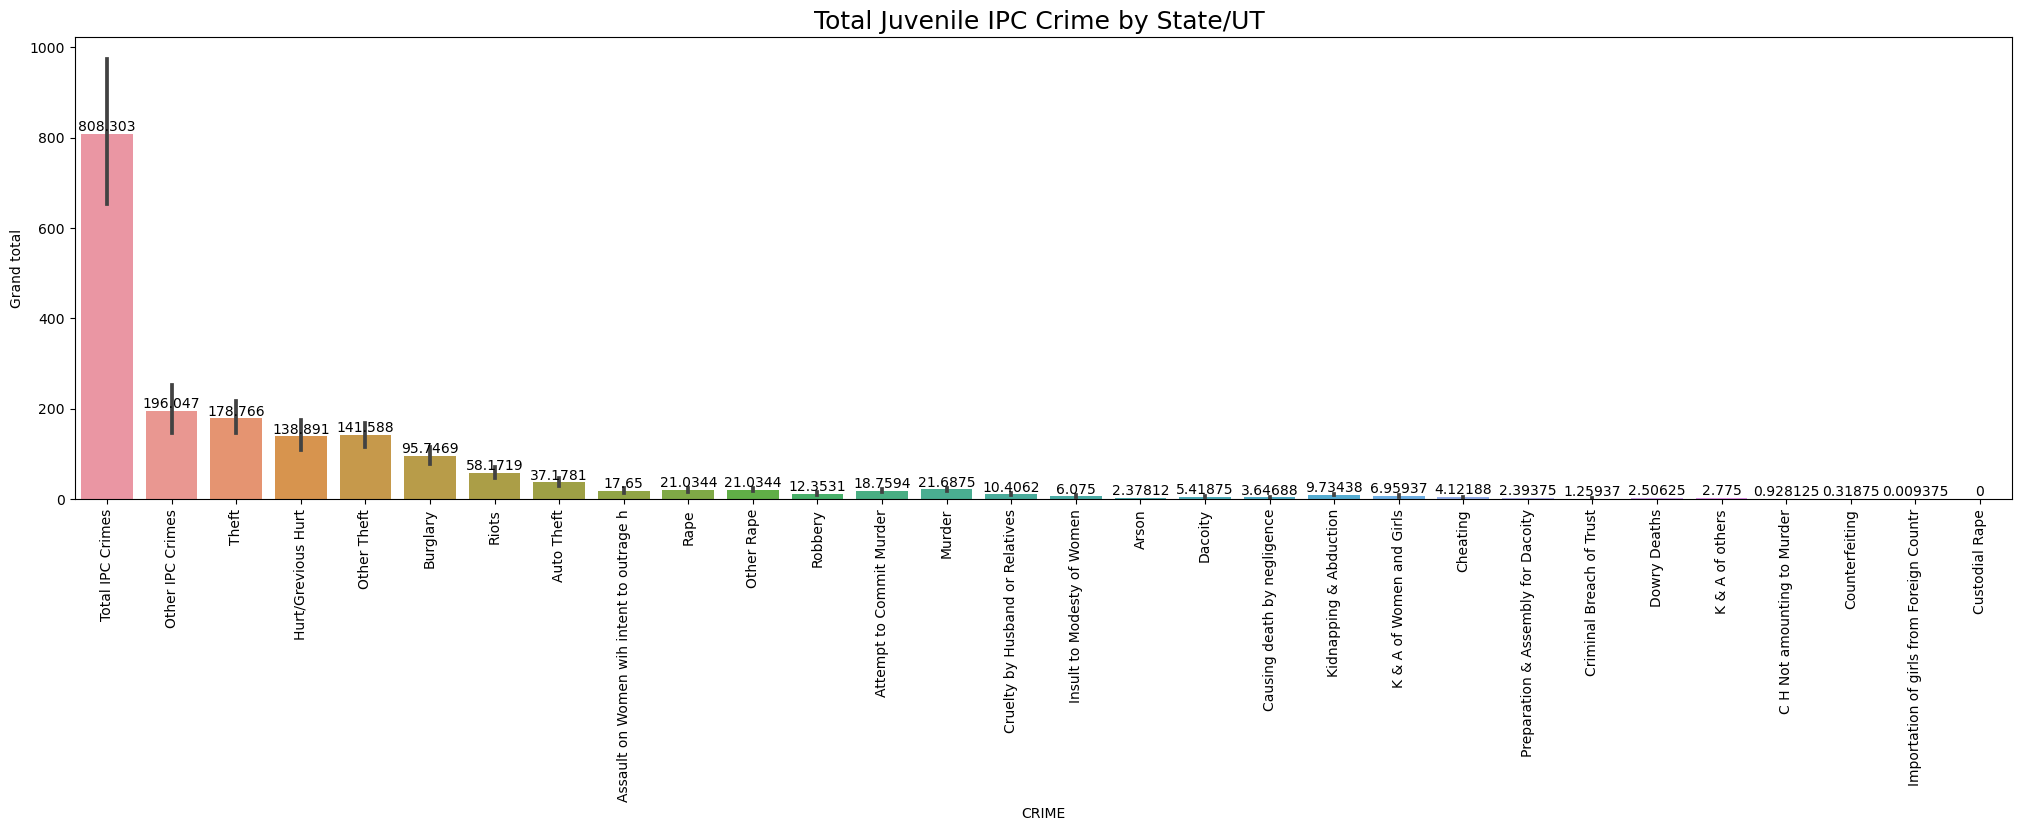

In [55]:
juvenile_ipc=df5.sort_values(by='Grand total', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=juvenile_ipc, x='CRIME', y='Grand total')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Juvenile IPC Crime by State/UT ', fontsize=18)
plt.show()

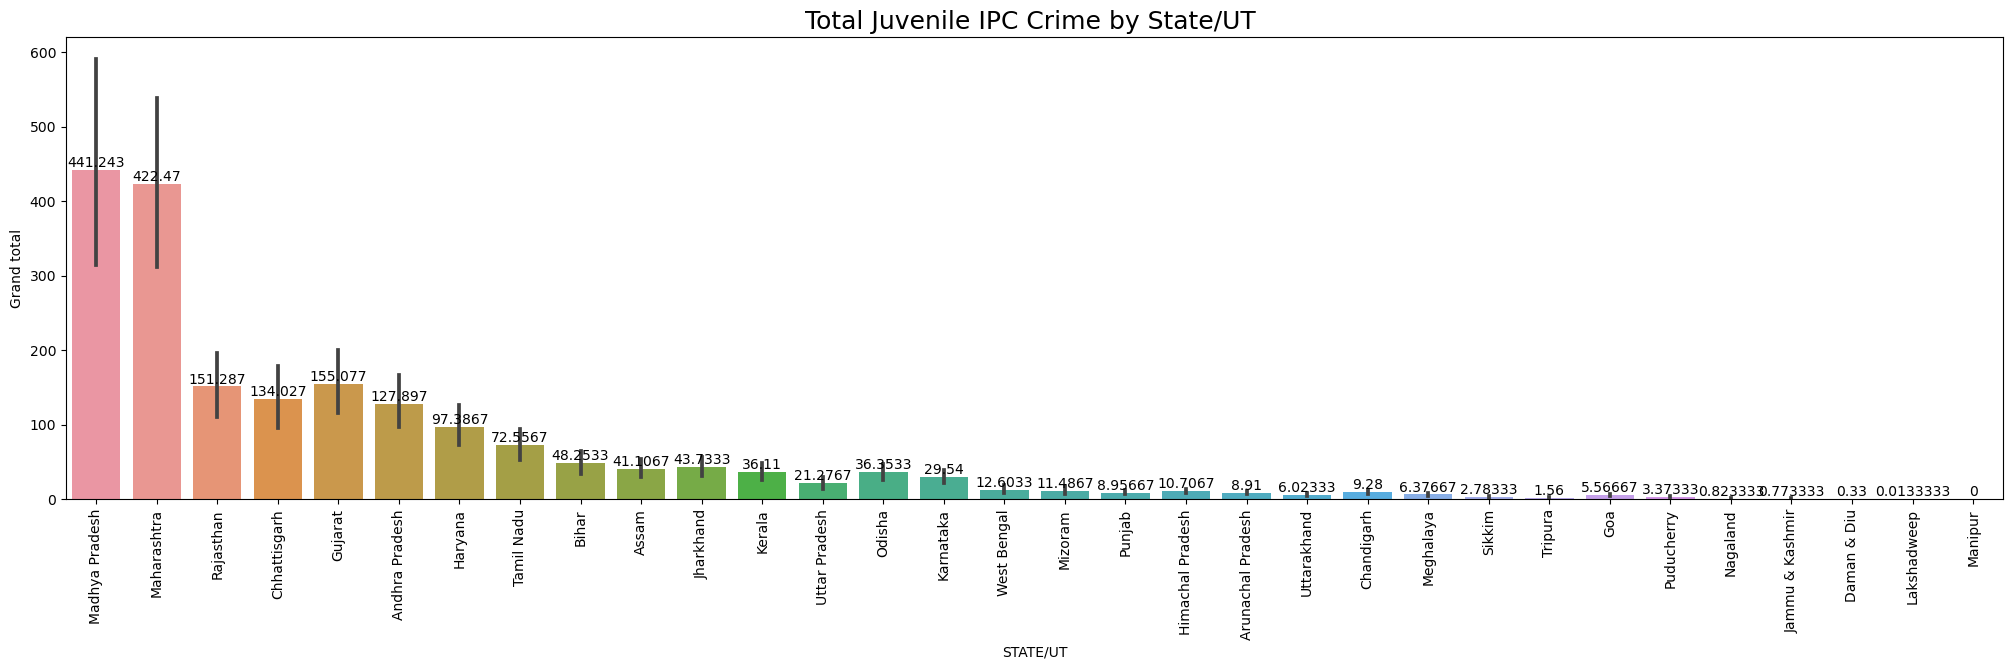

In [56]:
juvenile_ipc=df5.sort_values(by='Grand total', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=juvenile_ipc, x='STATE/UT', y='Grand total')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Juvenile IPC Crime by State/UT ', fontsize=18)
plt.show()

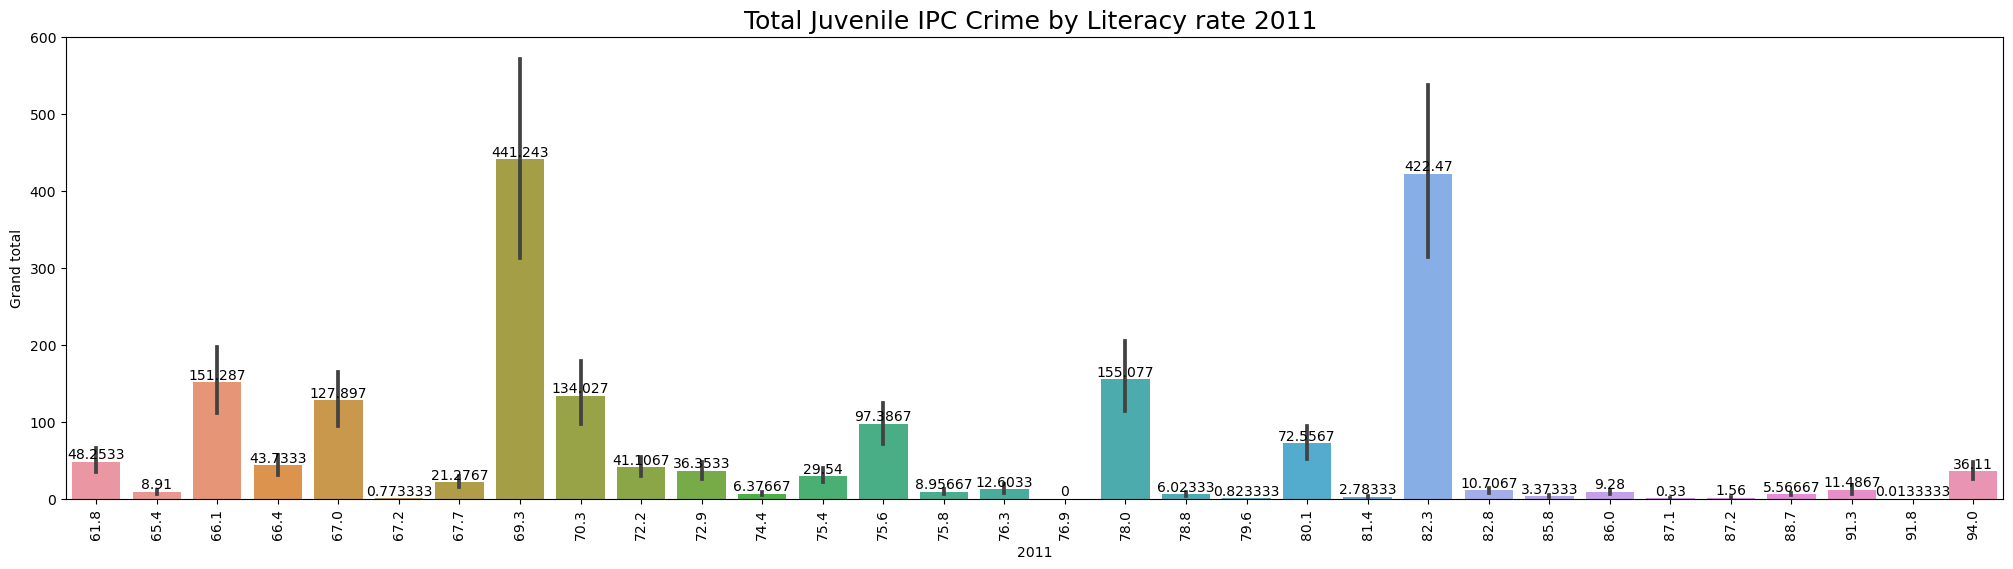

In [57]:
juvenile_ipc=df5.sort_values(by='Grand total', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=juvenile_ipc, x='2011', y='Grand total')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('Total Juvenile IPC Crime by Literacy rate 2011 ', fontsize=18)
plt.show()

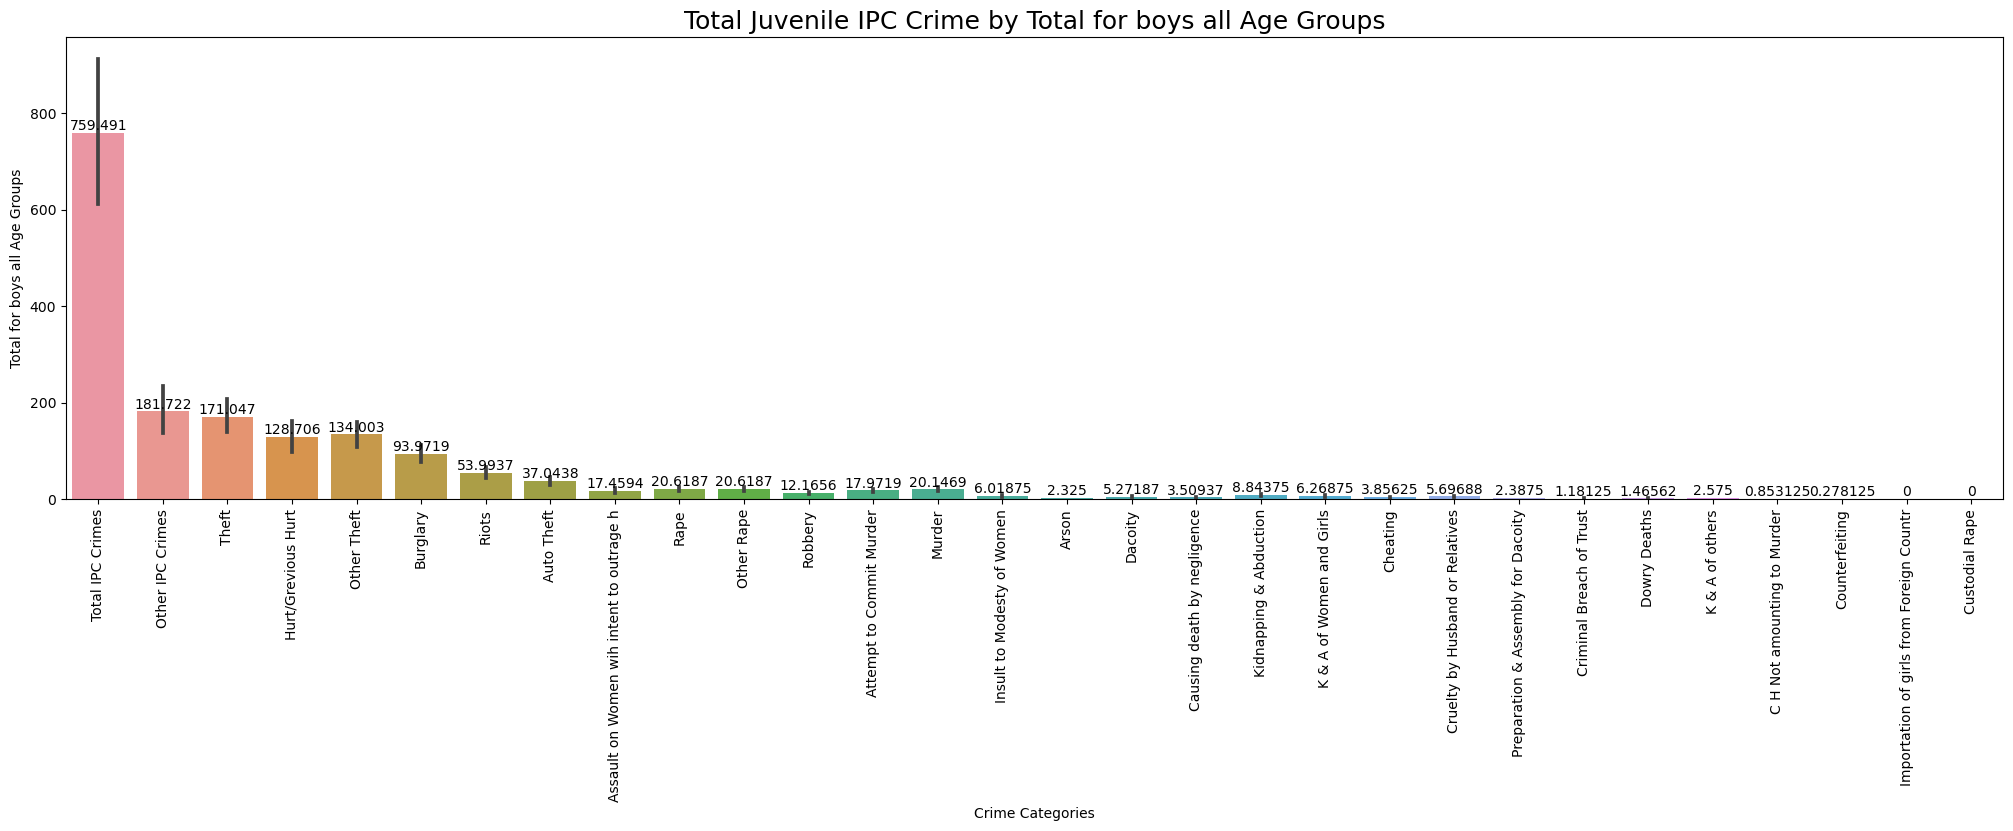

In [60]:
juvenile_ipc = df5.sort_values(by='Total for boys all Age Groups', ascending=False)

plt.figure(figsize=(25, 6))
ax = sns.barplot(data=juvenile_ipc, x='CRIME', y='Total for boys all Age Groups')
ax.bar_label(ax.containers[0])  # Add labels on top of bars

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Juvenile IPC Crime by Total for boys all Age Groups', fontsize=18)
plt.xlabel('Crime Categories')
plt.ylabel('Total for boys all Age Groups')
plt.show()

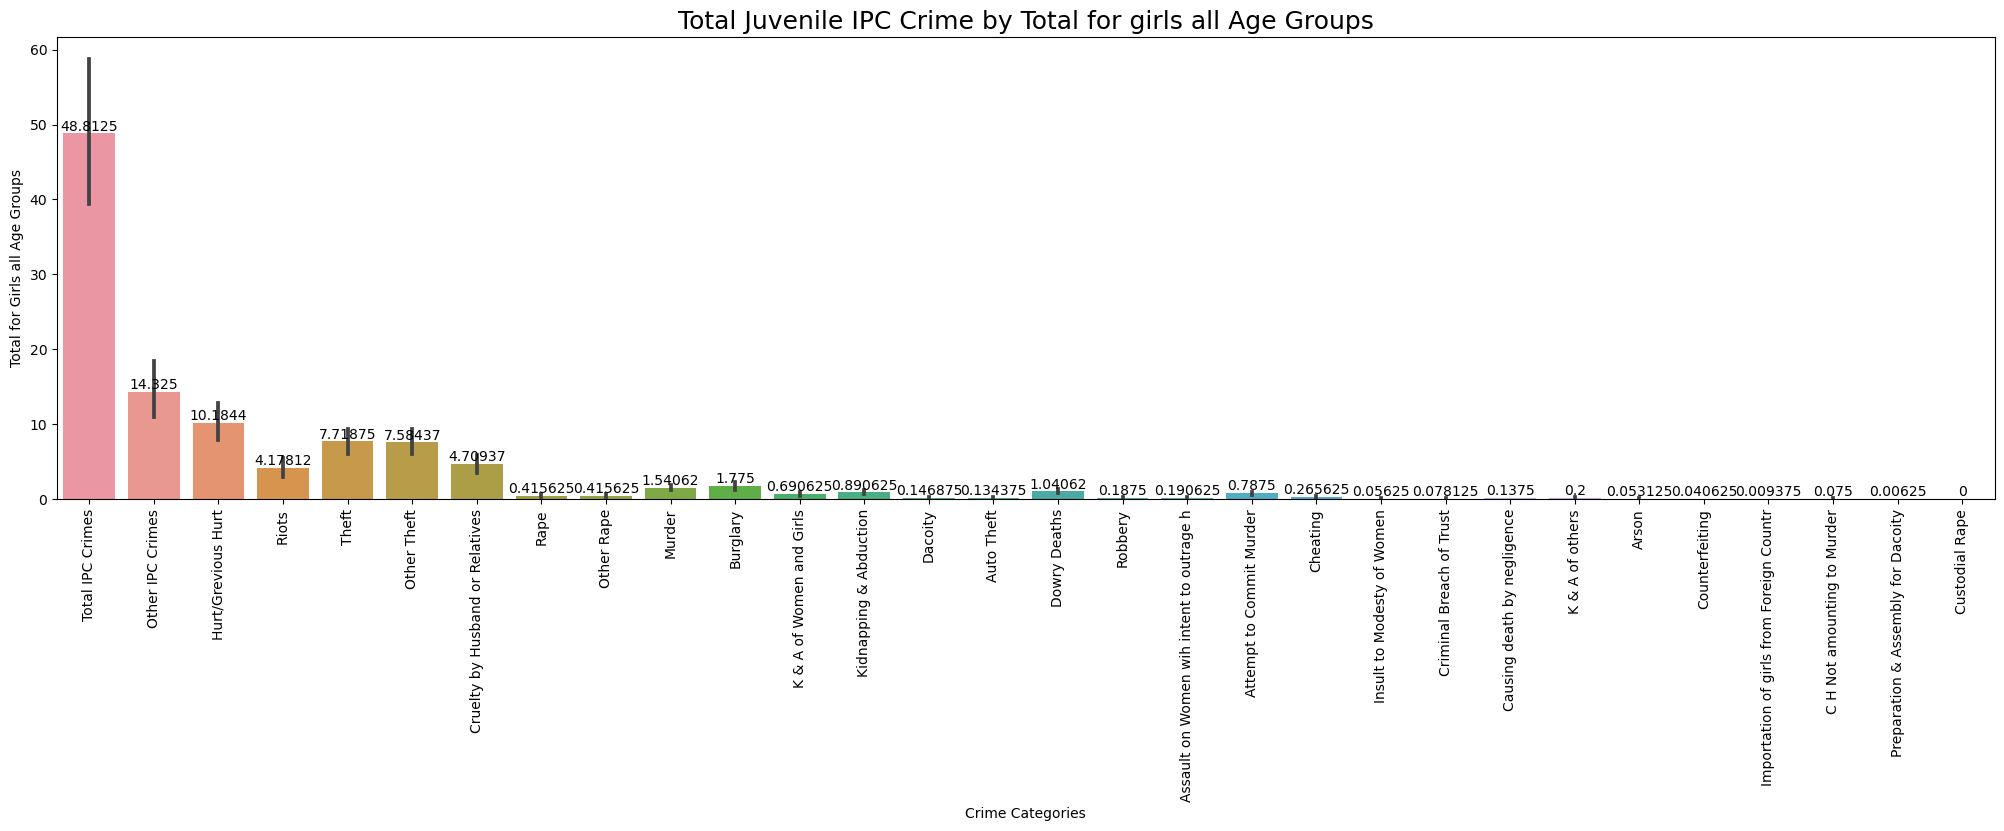

In [61]:
juvenile_ipc = df5.sort_values(by='Total for girls all Age Groups', ascending=False)

plt.figure(figsize=(25, 6))
ax = sns.barplot(data=juvenile_ipc, x='CRIME', y='Total for girls all Age Groups')
ax.bar_label(ax.containers[0])  # Add labels on top of bars

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Juvenile IPC Crime by Total for girls all Age Groups', fontsize=18)
plt.xlabel('Crime Categories')
plt.ylabel('Total for Girls all Age Groups')
plt.show()

#### We will analysing Crime by place of occurrence data 

In [71]:
place_occu_crime_df=pd.read_csv('E:\\Yaminee\\Data Trained\\Yaminee Tiwari\\Project\\Final project work\\Project Data set\\17_Crime_by_place_of_occurrence_2001_2012.csv',encoding='latin1')

In [72]:
place_occu_crime_df.head()

STATE/UT  YEAR  RESIDENTIAL PREMISES - Dacoity  \
0     ANDHRA PRADESH  2001                             100   
1  ARUNACHAL PRADESH  2001                               9   
2              ASSAM  2001                             381   
3              BIHAR  2001                             818   
4       CHHATTISGARH  2001                              54   

   RESIDENTIAL PREMISES - Robbery  RESIDENTIAL PREMISES - Burglary  \
0                             177                             5158   
1                              26                               99   
2                             191                             1695   
3                             326                             2486   
4                              42                             3336   

   RESIDENTIAL PREMISES - Theft  HIGHWAYS - Dacoity  HIGHWAYS - Robbery  \
0                          4257                  57                 172   
1                           131                   0                   0   
2                          2901                  46                 136   
3                          4741                 162                 826   
4                          1417                  10                  38   

   HIGHWAYS - Burglary  HIGHWAYS - Theft  ...  \
0                   31                74  ...   
1                    0                 8  ...   
2                    7                87  ...   
3                    0               257  ...   
4                   12                72  ...   

   COMMERCIAL ESTABLISHMENTS - Burglary  COMMERCIAL ESTABLISHMENTS - Theft  \
0                                  1041                               2502   
1                                    84                                 54   
2                                   442                                967   
3                                   231                                686   
4                                   370                                299   

   OTHER PLACES - Dacoity  OTHER PLACES - Robbery  OTHER PLACES - Burglary  \
0                      37                     232                      862   
1                       8                      40                       65   
2                      77                     261                      271   
3                     210                     880                      505   
4                      15                     239                      420   

   OTHER PLACES - Theft  TOTAL - Dacoity  TOTAL - Robbery  TOTAL - Burglary  \
0                  8849              214              629              7220   
1                   249               22               84               248   
2                  1342              532              687              2423   
3                  2582             1291             2203              3233   
4                  2835               87              338              4144   

   TOTAL - Theft  
0          16751  
1            443  
2           5367  
3           9701  
4           4812  

[5 rows x 34 columns]

In [73]:
place_occu_crime_df.shape

(456, 34)

In [74]:
for i in place_occu_crime_df.columns:
    print(i,place_occu_crime_df[i].unique(),'\n')

STATE/UT ['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'TOTAL (STATES)'
 'A & N ISLANDS' 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI'
 'LAKSHADWEEP' 'PUDUCHERRY' 'TOTAL (UTs)' 'TOTAL (ALL-INDIA)'] 

YEAR [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012] 

RESIDENTIAL PREMISES - Dacoity [ 100    9  381  818   54    3  105   25    0   11  339   70   45   59
  162    1   29    2   90   17   61   23  402   18   75 2911   27   30
 2941  110  312  833   56    4  283   21  285   84   22   53  154   14
   10   94    6   64  259   55 2811   26   31 2842   86   19  302  757
   12  334   41  155    8   74    5  143   16 2361 2372  120  208  775
   97   37   58  172   95   20  164 23

In [75]:
df6=pd.merge(place_occu_crime_df,lite_surv_df,on='STATE/UT',how='inner')

In [76]:
df6.columns

Index(['STATE/UT', 'YEAR', 'RESIDENTIAL PREMISES - Dacoity',
       'RESIDENTIAL PREMISES - Robbery', 'RESIDENTIAL PREMISES - Burglary',
       'RESIDENTIAL PREMISES - Theft', 'HIGHWAYS - Dacoity',
       'HIGHWAYS - Robbery', 'HIGHWAYS - Burglary', 'HIGHWAYS - Theft',
       'RIVER and SEA - Dacoity', 'RIVER and SEA - Robbery',
       'RIVER and SEA - Burglary', 'RIVER and SEA - Theft',
       'RAILWAYS - Dacoity', 'RAILWAYS - Robbery', 'RAILWAYS - Burglary',
       'RAILWAYS - Theft', 'BANKS - Dacoity', 'BANKS - Robbery',
       'BANKS - Burglary', 'BANKS - Theft',
       'COMMERCIAL ESTABLISHMENTS - Dacoity',
       'COMMERCIAL ESTABLISHMENTS - Robbery',
       'COMMERCIAL ESTABLISHMENTS - Burglary',
       'COMMERCIAL ESTABLISHMENTS - Theft', 'OTHER PLACES - Dacoity',
       'OTHER PLACES - Robbery', 'OTHER PLACES - Burglary',
       'OTHER PLACES - Theft', 'TOTAL - Dacoity', 'TOTAL - Robbery',
       'TOTAL - Burglary', 'TOTAL - Theft', '2001', '2011'],
      dtype='object')

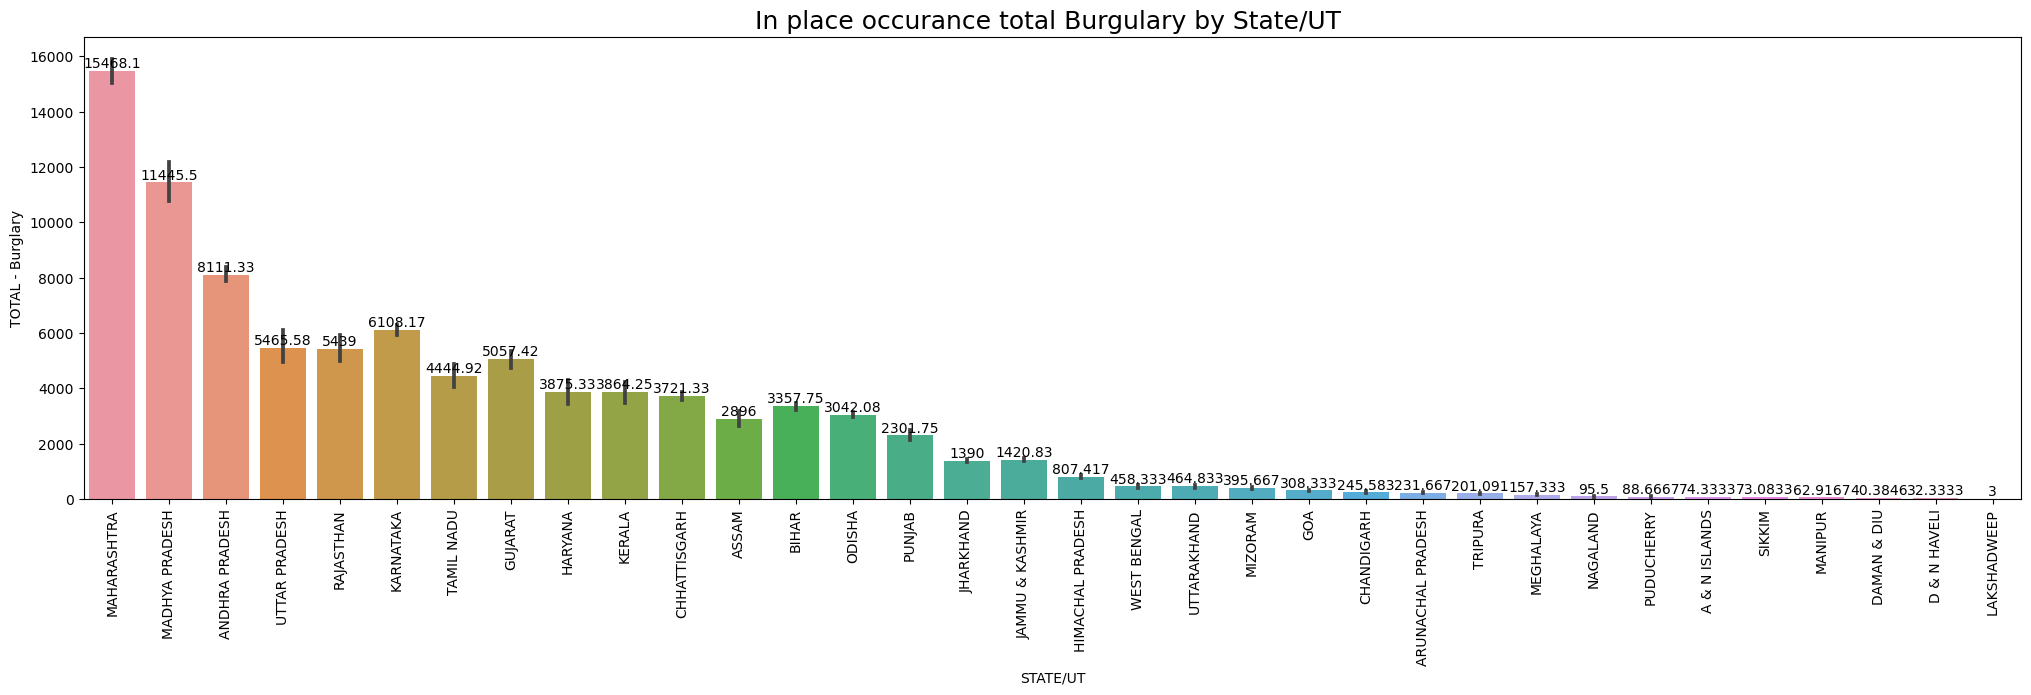

In [80]:
sort_place=df6.sort_values(by='TOTAL - Burglary', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_place, x='STATE/UT', y='TOTAL - Burglary')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('In place occurance total Burgulary by State/UT ', fontsize=18)
plt.show()

Maharashtra has highest number of in place occurance of Burgulary crime as compare to any other state

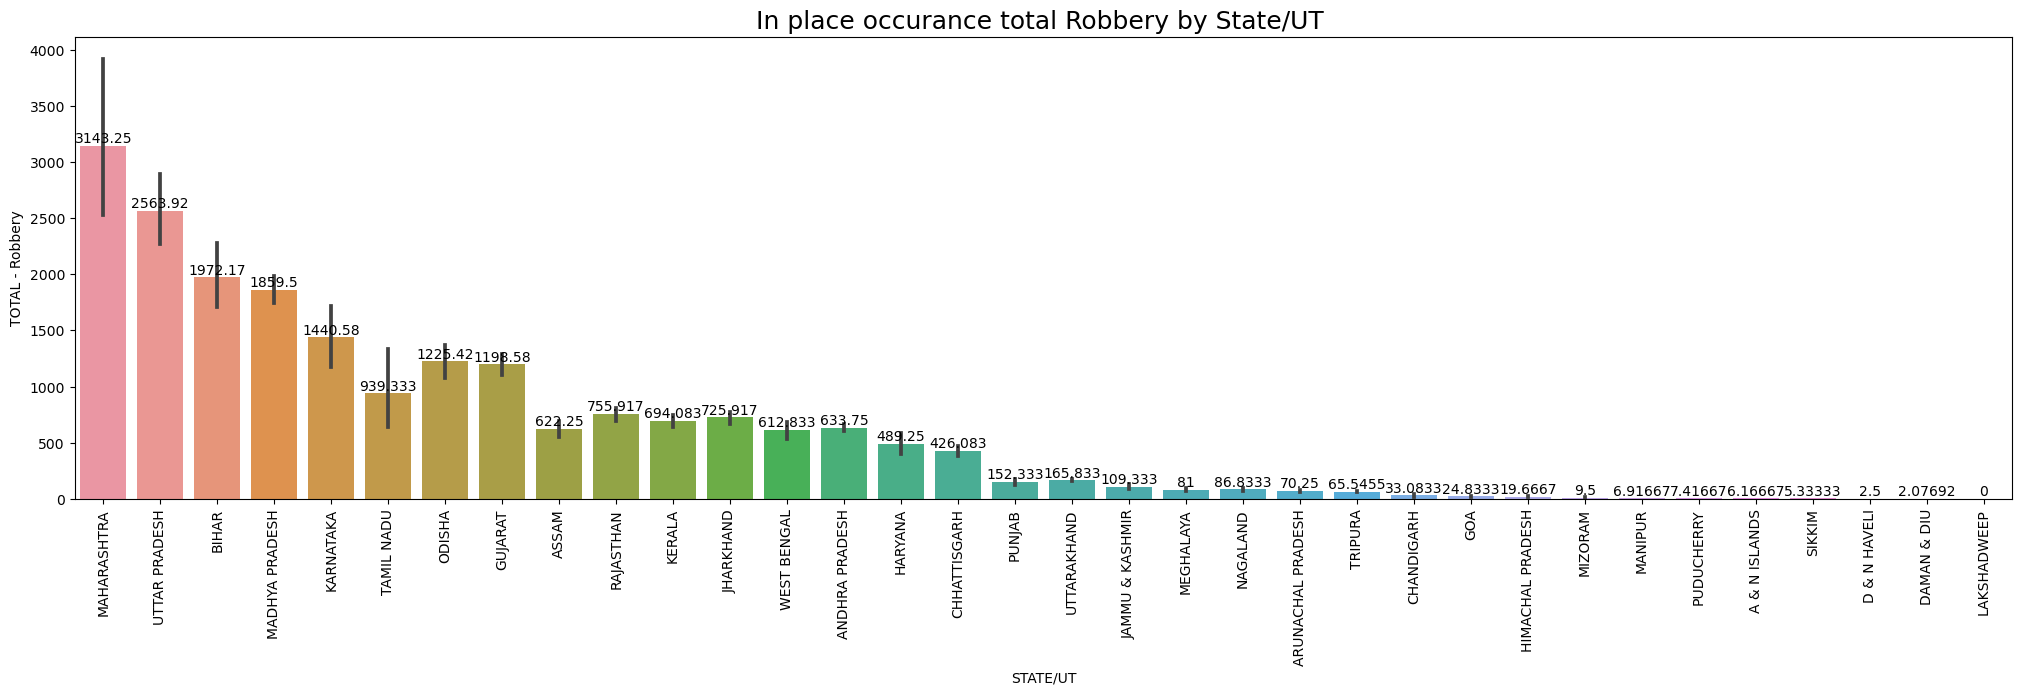

In [79]:
sort_place=df6.sort_values(by='TOTAL - Robbery', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_place, x='STATE/UT', y='TOTAL - Robbery')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('In place occurance total Robbery by State/UT ', fontsize=18)
plt.show()

Maharashtra has highest number of in place occurance of robbery crime as compare to any other state

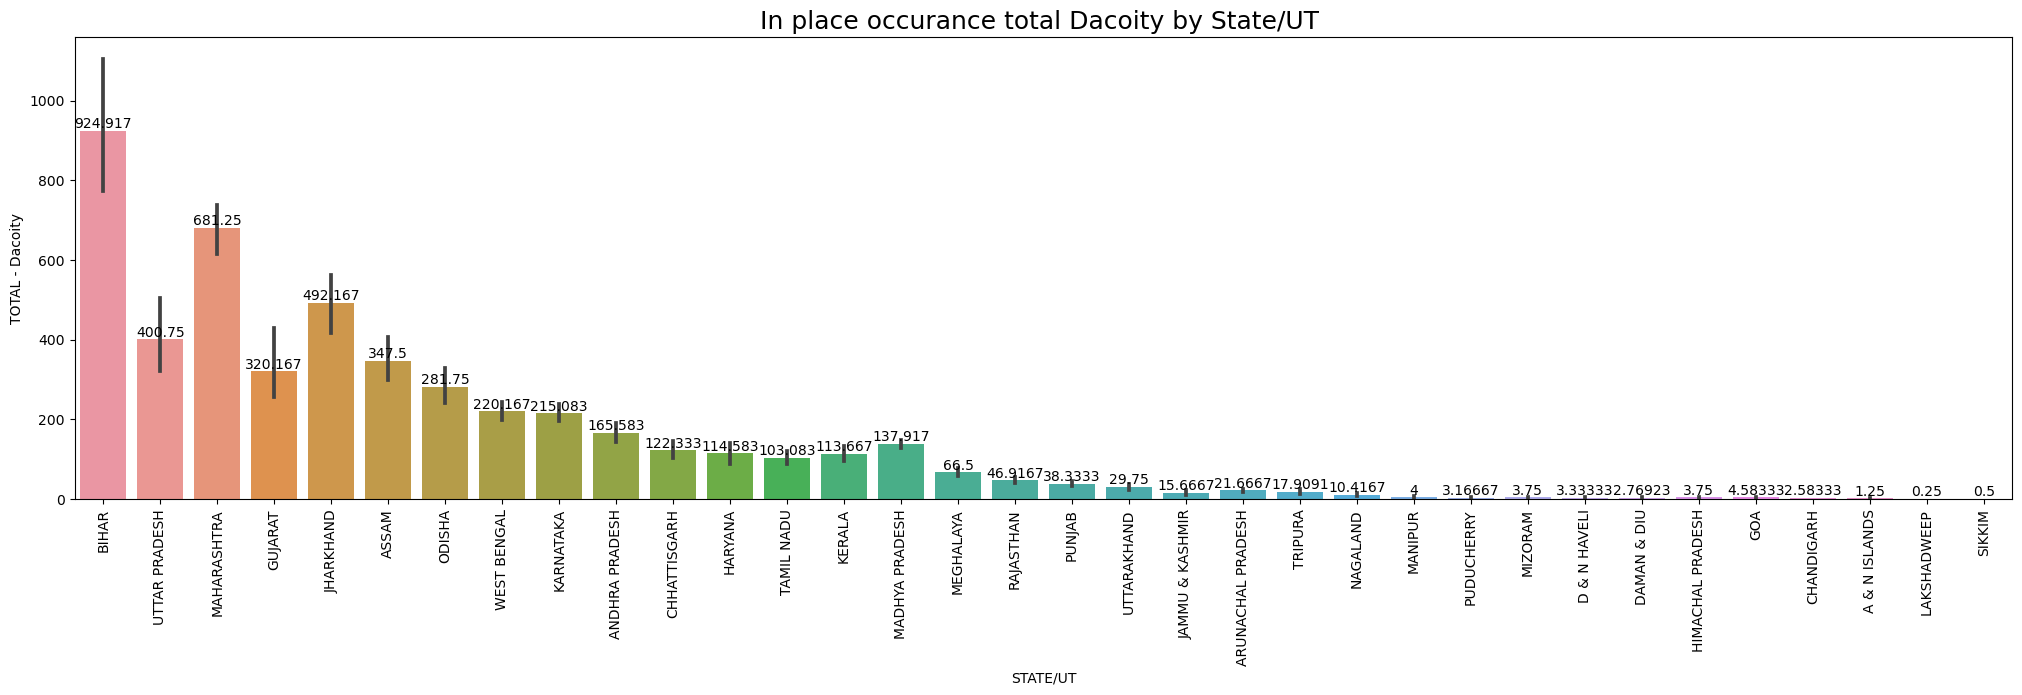

In [78]:
sort_place=df6.sort_values(by='TOTAL - Dacoity', ascending=False)
plt.figure(figsize=(25, 6))
ax = sns.barplot(data=sort_place, x='STATE/UT', y='TOTAL - Dacoity')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.title('In place occurance total Dacoity by State/UT ', fontsize=18)
plt.show()

Bihar has highest number of in place occurance of dacoity crime as compare to any other state

## Summary Report for Crime in India Dataset

#### Bihar:
- **Literacy Rate:** Bihar has the lowest literacy rate among the states, recorded at 61.8%.
- **Crime Focus:** Bihar has the highest number of in-place occurrences of dacoity compared to any other state.

#### Maharashtra:
- **Literacy Rate:** Maharashtra's literacy rate was 82.3% in 2011 and 78.18% in 2001.
- **Crime Focus:**
  - Maharashtra has the highest number of in-place occurrences of robbery compared to any other state.
  - Maharashtra also has the highest number of in-place occurrences of burglary compared to any other state.

### Insights from the Report:
- **Crime Distribution:** Maharashtra emerges as a significant state in terms of in-place occurrences of robbery and burglary, indicating a potential focus area for law enforcement and policy measures.
- **Literacy Impact:** While Bihar's low literacy rate may correlate with socio-economic factors contributing to crime rates, Maharashtra's relatively higher literacy rates suggest a more nuanced approach may be required to address crime trends in urban areas.